# Project: House Prices

#### Goal: Apply  analytics to predict the sales price for each house. For each Id in the test set,  must predict the value of the SalePrice variable. 

## Initial Setup

In [889]:
# Required libraries
%pip install numpy
%pip install pandas
%pip install matplotlib.pyplot
%pip install statsmodels.api

    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api


In [890]:
#Read data from file
data=pd.read_csv('train.csv')
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [891]:
data.shape

(1460, 81)

# Exploratory Data Analysis Check List

#### 1: Understand data collection process

#### 2: Document data set description (meta data)

#### 3: Check for missing values

#### 4: Univariate data analysis

#### 5: Bivariate data analysis

#### 6: Inferential Statistics (optional)

# Data understanding- Phase1 

### 1: Understand data collection process

#### Ref:Anna Montoya, DataCanary. (2016). House Prices - Advanced Regression Techniques. Kaggle. https://kaggle.com/competitions/house-prices-advanced-regression-techniques


### 2: Document Data Set Description (Meta Data)

In [892]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3: Check for Missing Values

In [893]:
#Step 1: Determine the type of MVs
#Know the cause
np.sum(data.isnull())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [894]:
# Step 2: Determine the extent of MVs
# Summary of MVs in each column
mvs_summary = pd.DataFrame({'freq':np.sum(data.isnull())})
mvs_summary['pct'] = round(mvs_summary['freq']/data.shape[0]* 100, 1)
mvs_summary.sort_values(by = 'pct', ascending = False)

freq   pct
PoolQC       1453  99.5
MiscFeature  1406  96.3
Alley        1369  93.8
Fence        1179  80.8
MasVnrType    872  59.7
...           ...   ...
ExterQual       0   0.0
Exterior2nd     0   0.0
Exterior1st     0   0.0
RoofMatl        0   0.0
SalePrice       0   0.0

[81 rows x 2 columns]

In [895]:
# Summary of MVs for each case
data.loc[:,'mvs']=data.apply(lambda row:np.sum(row.isnull()), axis = 1)
data.sort_values(by='mvs', ascending = False)
data.loc[:,'mvs_pct']=round( data.apply(lambda row:np.sum(row.isnull())/(data.shape[1]-3)*100,axis = 1),1)
#(data.shape[1]-3), 3 refers to 3 extra columns (id, mvs, mvs-pct)
data.sort_values(by='mvs',ascending = False)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1218  1219          50       RM         52.0     6240   Pave   NaN      Reg   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
1011  1012          90       RL         75.0     9825   Pave   NaN      Reg   
1179  1180          20       RL         77.0     8335   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1328  1329          50       RM         60.0    10440   Pave  Grvl      Reg   
766    767          60       RL         80.0    10421   Pave   NaN      Reg   
1083  1084          20       RL         80.0     8800   Pave   NaN      Reg   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
1218         Lvl    AllPub  ...    NaN         NaN       0      7   2006   
533          Low    AllPub  ...    NaN         NaN       0      1   2007   
39           Lvl    AllPub  ...    NaN         NaN       0      6   2008   
1011         Lvl    AllPub  ...    NaN         NaN       0      5   2010   
1179         Lvl    AllPub  ...    NaN         NaN       0      4   2006   
...          ...       ...  ...    ...         ...     ...    ...    ...   
810          Lvl    AllPub  ...  GdPrv         NaN       0      1   2006   
1328         Lvl    AllPub  ...  MnPrv        Shed    1150      6   2008   
766          Lvl    AllPub  ...  MnPrv        Shed     500      3   2010   
1083         Lvl    AllPub  ...  MnPrv        Shed     700      3   2006   
1386         Lvl    AllPub  ...  MnPrv        TenC    2000      7   2006   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
1218       WD        Normal      80500   16     20.3  
533        WD        Normal      39300   16     20.3  
39         WD       AdjLand      82000   16     20.3  
1011       WD        Normal     100000   16     20.3  
1179       WD        Normal      93000   15     19.0  
...       ...           ...        ...  ...      ...  
810        WD        Normal     181000    2      2.5  
1328       WD        Normal     256000    2      2.5  
766        WD        Normal     196500    2      2.5  
1083       WD        Normal     160000    2      2.5  
1386       WD        Normal     250000    1      1.3  

[1460 rows x 83 columns]

##### #Decision: Modify elements that are known as null but still contain  information (Descriptive Statistics).

In [896]:
data[['MasVnrArea','MasVnrType']]

MasVnrArea MasVnrType
0          196.0    BrkFace
1            0.0        NaN
2          162.0    BrkFace
3            0.0        NaN
4          350.0    BrkFace
...          ...        ...
1455         0.0        NaN
1456       119.0      Stone
1457         0.0        NaN
1458         0.0        NaN
1459         0.0        NaN

[1460 rows x 2 columns]

In [897]:
 # Modifying'MasVnrType'
data.loc[data['MasVnrArea']==0].shape[0]

861

In [898]:
data.loc[data['MasVnrArea'] == 0,'MasVnrType'] ='none'
np.sum(data['MasVnrType'].isnull())

13

In [899]:
np.sum(data['MasVnrArea'].isnull())

8

In [900]:
data.loc[data['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   

     LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
234          Lvl    AllPub  ...   NaN         NaN       0      5   2010   
529          Lvl    AllPub  ...   NaN         NaN       0      3   2007   
650          Lvl    AllPub  ...   NaN         NaN       0      5   2008   
936          Lvl    AllPub  ...   NaN         NaN       0      8   2009   
973          Lvl    AllPub  ...   NaN         NaN       0     12   2008   
977          Lvl    AllPub  ...   NaN         NaN       0     11   2007   
1243         Lvl    AllPub  ...   NaN         NaN       0      9   2006   
1278         Lvl    AllPub  ...   NaN         NaN       0      3   2008   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
234        WD        Normal     216500    7      8.9  
529        WD        Alloca     200624    7      8.9  
650        WD        Normal     205950    7      8.9  
936        WD        Normal     184900    7      8.9  
973       New       Partial     182000    7      8.9  
977       New       Partial     199900    6      7.6  
1243      New       Partial     465000    6      7.6  
1278       WD        Normal     237000    6      7.6  

[8 rows x 83 columns]

In [901]:
data.loc[data['MasVnrType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234    235          60       RL          NaN     7851   Pave   NaN      Reg   
529    530          20       RL          NaN    32668   Pave   NaN      IR1   
624    625          60       RL         80.0    10400   Pave   NaN      Reg   
650    651          60       FV         65.0     8125   Pave   NaN      Reg   
773    774          20       RL         70.0    10150   Pave   NaN      Reg   
936    937          20       RL         67.0    10083   Pave   NaN      Reg   
973    974          20       FV         95.0    11639   Pave   NaN      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   
1243  1244          20       RL        107.0    13891   Pave   NaN      Reg   
1278  1279          60       RL         75.0     9473   Pave   NaN      Reg   
1300  1301          60       RL          NaN    10762   Pave   NaN      IR1   
1334  1335         160       RM         24.0     2368   Pave   NaN      Reg   

     LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
234          Lvl    AllPub  ...   NaN         NaN       0      5   2010   
529          Lvl    AllPub  ...   NaN         NaN       0      3   2007   
624          Lvl    AllPub  ...   NaN         NaN       0     11   2006   
650          Lvl    AllPub  ...   NaN         NaN       0      5   2008   
773          Lvl    AllPub  ...   NaN         NaN       0      7   2007   
936          Lvl    AllPub  ...   NaN         NaN       0      8   2009   
973          Lvl    AllPub  ...   NaN         NaN       0     12   2008   
977          Lvl    AllPub  ...   NaN         NaN       0     11   2007   
1230         Lvl    AllPub  ...   NaN        Gar2    8300      8   2007   
1243         Lvl    AllPub  ...   NaN         NaN       0      9   2006   
1278         Lvl    AllPub  ...   NaN         NaN       0      3   2008   
1300         Lvl    AllPub  ...   NaN         NaN       0      5   2009   
1334         Lvl    AllPub  ...   NaN         NaN       0      5   2009   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
234        WD        Normal     216500    7      8.9  
529        WD        Alloca     200624    7      8.9  
624        WD        Normal     165150    5      6.3  
650        WD        Normal     205950    7      8.9  
773       COD        Normal     114500    6      7.6  
936        WD        Normal     184900    7      8.9  
973       New       Partial     182000    7      8.9  
977       New       Partial     199900    6      7.6  
1230       WD        Normal     190000    5      6.3  
1243      New       Partial     465000    6      7.6  
1278       WD        Normal     237000    6      7.6  
1300       WD        Normal     225000    6      7.6  
1334       WD        Normal     125000    6      7.6  

[13 rows x 83 columns]

In [902]:
np.sum(data['MasVnrType']=='none')

861

In [903]:
 data[['MasVnrArea','MasVnrType']]

MasVnrArea MasVnrType
0          196.0    BrkFace
1            0.0       none
2          162.0    BrkFace
3            0.0       none
4          350.0    BrkFace
...          ...        ...
1455         0.0       none
1456       119.0      Stone
1457         0.0       none
1458         0.0       none
1459         0.0       none

[1460 rows x 2 columns]

In [904]:
# Modifying'FireplaceQu'
data.loc[data['Fireplaces']==0,'FireplaceQu']='NA'

In [905]:
np.sum(data['Fireplaces']==0)

690

In [906]:
np.sum(data['FireplaceQu']=='NA')

690

In [907]:
np.sum(data['FireplaceQu'].isnull())

0

In [908]:
# Modifying'PoolQC'
data.loc[data['PoolArea']==0,'PoolQC']='NA'

In [909]:
np.sum(data['PoolArea']==0)

1453

In [910]:
np.sum(data['PoolQC']=='NA')

1453

In [911]:
np.sum(data['PoolQC'].isnull())

0

In [912]:
# data[['PoolArea', 'PoolQC']]

In [913]:
np.sum(data['PoolArea']!=0)

7

In [914]:
np.sum(data['PoolQC']!='NA')

7

In [915]:
data.loc[(data['PoolArea']!= 0)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
197          Lvl    AllPub  ...  GdPrv         NaN       0      3   2006   
810          Lvl    AllPub  ...  GdPrv         NaN       0      1   2006   
1170         Lvl    AllPub  ...  GdPrv         NaN       0      7   2008   
1182         Lvl    AllPub  ...  MnPrv         NaN       0      7   2007   
1298         Bnk    AllPub  ...    NaN         NaN       0      1   2008   
1386         Lvl    AllPub  ...  MnPrv        TenC    2000      7   2006   
1423         Lvl    AllPub  ...  GdPrv         NaN       0      8   2006   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
197        WD       Abnorml     235000    3      3.8  
810        WD        Normal     181000    2      2.5  
1170       WD        Normal     171000    3      3.8  
1182       WD       Abnorml     745000    3      3.8  
1298      New       Partial     160000    3      3.8  
1386       WD        Normal     250000    1      1.3  
1423       WD        Alloca     274970    4      5.1  

[7 rows x 83 columns]

In [916]:
data.loc[(data['PoolArea']!= 0)&(data['PoolQC']=='NA'),'PoolQC']=np.nan

In [917]:
data.loc[data['PoolArea' ]!= 0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
197          Lvl    AllPub  ...  GdPrv         NaN       0      3   2006   
810          Lvl    AllPub  ...  GdPrv         NaN       0      1   2006   
1170         Lvl    AllPub  ...  GdPrv         NaN       0      7   2008   
1182         Lvl    AllPub  ...  MnPrv         NaN       0      7   2007   
1298         Bnk    AllPub  ...    NaN         NaN       0      1   2008   
1386         Lvl    AllPub  ...  MnPrv        TenC    2000      7   2006   
1423         Lvl    AllPub  ...  GdPrv         NaN       0      8   2006   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
197        WD       Abnorml     235000    3      3.8  
810        WD        Normal     181000    2      2.5  
1170       WD        Normal     171000    3      3.8  
1182       WD       Abnorml     745000    3      3.8  
1298      New       Partial     160000    3      3.8  
1386       WD        Normal     250000    1      1.3  
1423       WD        Alloca     274970    4      5.1  

[7 rows x 83 columns]

In [918]:
data.loc[1298, 'PoolQC']=np.nan

In [919]:
np.sum(data['PoolQC'].isnull())

1

In [920]:
# data['PoolQC']

In [921]:
data.loc[data['PoolQC'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
1298         Bnk    AllPub  ...   NaN         NaN       0      1   2008   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
1298      New       Partial     160000    3      3.8  

[1 rows x 83 columns]

In [922]:
data.loc[1298,'PoolQC']

nan

In [923]:
# Modifying'Fence'
np.sum(data['Fence'].isnull())

1179

In [924]:
data.loc[data['Fence'].isnull(),'Fence']='NA'

In [925]:
np.sum(data['Fence'].isnull())

0

In [926]:
# data['Fence']

In [927]:
# Modifying 'MiscFeature'
np.sum(data['MiscFeature'].isnull())

1406

In [928]:
data.loc[data['MiscFeature'].isnull(),'MiscFeature']='NA'

In [929]:
np.sum(data['MiscFeature'].isnull())

0

In [930]:
# Modifying 'GarageType','GarageYrBlt','GarageFinish','GarageQual'and 'GarageCond'
np.sum(data['GarageArea']==0)

81

In [931]:
data.loc[data['GarageArea']==0,['GarageType','GarageFinish','GarageQual','GarageCond']]='NA'
data.loc[data['GarageArea']==0,['GarageYrBlt']]=0
data[['GarageArea','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

GarageArea GarageType  GarageYrBlt GarageFinish GarageQual GarageCond
0            548     Attchd       2003.0          RFn         TA         TA
1            460     Attchd       1976.0          RFn         TA         TA
2            608     Attchd       2001.0          RFn         TA         TA
3            642     Detchd       1998.0          Unf         TA         TA
4            836     Attchd       2000.0          RFn         TA         TA
...          ...        ...          ...          ...        ...        ...
1455         460     Attchd       1999.0          RFn         TA         TA
1456         500     Attchd       1978.0          Unf         TA         TA
1457         252     Attchd       1941.0          RFn         TA         TA
1458         240     Attchd       1950.0          Unf         TA         TA
1459         276     Attchd       1965.0          Fin         TA         TA

[1460 rows x 6 columns]

In [932]:
np.sum(data['GarageType'].isnull())

0

In [933]:
np.sum(data['GarageYrBlt'].isnull())

0

In [934]:
np.sum(data['GarageFinish'].isnull())

0

In [935]:
np.sum(data['GarageQual'].isnull())

0

In [936]:
np.sum(data['GarageCond'].isnull())

0

In [937]:
# Modifying'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
np.sum(data['TotalBsmtSF']==0)

37

In [938]:
data.loc[data['TotalBsmtSF']==0,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]='NA'
data[['TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

TotalBsmtSF BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
0             856       Gd       TA           No          GLQ          Unf
1            1262       Gd       TA           Gd          ALQ          Unf
2             920       Gd       TA           Mn          GLQ          Unf
3             756       TA       Gd           No          ALQ          Unf
4            1145       Gd       TA           Av          GLQ          Unf
...           ...      ...      ...          ...          ...          ...
1455          953       Gd       TA           No          Unf          Unf
1456         1542       Gd       TA           No          ALQ          Rec
1457         1152       TA       Gd           No          GLQ          Unf
1458         1078       TA       TA           Mn          GLQ          Rec
1459         1256       TA       TA           No          BLQ          LwQ

[1460 rows x 6 columns]

In [939]:
np.sum(data['BsmtQual'].isnull())

0

In [940]:
np.sum(data['BsmtCond'].isnull())

0

In [941]:
np.sum(data['BsmtExposure'].isnull())

1

In [942]:
data.loc[data['BsmtExposure'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
948  949          60       RL         65.0    14006   Pave   NaN      IR1   

    LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
948         Lvl    AllPub  ...    NA          NA       0      2   2006   

    SaleType SaleCondition  SalePrice  mvs  mvs_pct  
948       WD        Normal     192500    5      6.3  

[1 rows x 83 columns]

In [943]:
np.sum(data['BsmtFinType1'].isnull())

0

In [944]:
np.sum(data['BsmtFinType2'].isnull())

1

In [945]:
data.loc[data['BsmtFinType2'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave   NaN      IR1   

    LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
332         Lvl    AllPub  ...    NA          NA       0     10   2009   

    SaleType SaleCondition  SalePrice  mvs  mvs_pct  
332       WD        Normal     284000    5      6.3  

[1 rows x 83 columns]

In [946]:
# Modifying'LotFrontage'
np.sum(data['LotFrontage'].isnull())

259

In [947]:
# data['LotFrontage']

In [948]:
np.sum(data['LotFrontage']==0)

0

In [949]:
data.loc[data['LotFrontage'].isnull(),'LotFrontage']=0
# data['LotFrontage']

In [950]:
np.sum(data['LotFrontage'].isnull())

0

In [951]:
np.sum(data['LotFrontage']==0)

259

In [952]:
# Modifying 'Alley'
np.sum(data['Alley'].isnull())

1369

In [953]:
data.loc[data['Alley'].isnull(),'Alley']='NA'
# data['Alley']

In [954]:
np.sum(data['Alley'].isnull())

0

In [955]:
np.sum(data['Alley']=='NA')

1369

In [956]:
#Step 2: Determine the extent of MVs after Modifying
#Summary of MVs in each column after Modifying 
mvs_summary=pd.DataFrame({'freq':np.sum(data.isnull())})
mvs_summary['pct']=round(mvs_summary['freq']/data.shape[0]*100,1)
mvs_summary.sort_values(by='pct',ascending = False)

freq  pct
MasVnrType      13  0.9
MasVnrArea       8  0.5
PoolQC           1  0.1
Electrical       1  0.1
BsmtFinType2     1  0.1
...            ...  ...
ExterQual        0  0.0
Exterior2nd      0  0.0
Exterior1st      0  0.0
RoofMatl         0  0.0
mvs_pct          0  0.0

[83 rows x 2 columns]

In [957]:
# Summary of MVs for each case after Modifying 
data.loc[:,'mvs']=data.apply(lambda row: np.sum(row.isnull()),axis = 1)
data.sort_values(by='mvs',ascending = False)
data.loc[:,'mvs_pct'] =round(data.apply(lambda row: np.sum(row.isnull())/(data.shape[1]-3)*100, axis = 1),1)
#(data.shape[1]-3), 3 refers to 3 extra columns (id, mvs, mvs-pct)
data.sort_values(by='mvs',ascending = False)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
529    530          20       RL          0.0    32668   Pave    NA      IR1   
936    937          20       RL         67.0    10083   Pave    NA      Reg   
1243  1244          20       RL        107.0    13891   Pave    NA      Reg   
234    235          60       RL          0.0     7851   Pave    NA      Reg   
977    978         120       FV         35.0     4274   Pave  Pave      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
485    486          20       RL         80.0     9600   Pave    NA      Reg   
484    485          20       RL          0.0     7758   Pave    NA      IR1   
483    484         120       RM         32.0     4500   Pave    NA      Reg   
482    483          70       RM         50.0     2500   Pave  Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave    NA      Reg   

     LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
529          Lvl    AllPub  ...    NA          NA       0      3   2007   
936          Lvl    AllPub  ...    NA          NA       0      8   2009   
1243         Lvl    AllPub  ...    NA          NA       0      9   2006   
234          Lvl    AllPub  ...    NA          NA       0      5   2010   
977          Lvl    AllPub  ...    NA          NA       0     11   2007   
...          ...       ...  ...   ...         ...     ...    ...    ...   
485          Lvl    AllPub  ...    NA          NA       0      7   2009   
484          Lvl    AllPub  ...    NA          NA       0      3   2007   
483          Lvl    AllPub  ...    NA          NA       0      5   2006   
482          Lvl    AllPub  ...    NA          NA       0      6   2009   
1459         Lvl    AllPub  ...    NA          NA       0      6   2008   

     SaleType SaleCondition  SalePrice  mvs  mvs_pct  
529        WD        Alloca     200624    2      2.5  
936        WD        Normal     184900    2      2.5  
1243      New       Partial     465000    2      2.5  
234        WD        Normal     216500    2      2.5  
977       New       Partial     199900    2      2.5  
...       ...           ...        ...  ...      ...  
485        WD        Normal     147000    0      0.0  
484        WD        Normal     132500    0      0.0  
483        WD        Normal     164000    0      0.0  
482        WD        Normal     155000    0      0.0  
1459       WD        Normal     147500    0      0.0  

[1460 rows x 83 columns]

In [958]:
data['mvs_pct'].max()

2.5

In [959]:
# Step 3: Diagnose the randomness of the missing values processes
# Given the low percentage of missing values in columns and records (in a large dataset),
# It is acceptable to proceed with a simple imputation strategy without a detailed evaluation of whether the missing values are MAR. 
# This imputation will not significantly impact the overall results.

In [960]:
np.sum(data['MasVnrArea'].isnull())

8

In [961]:
float_columns=data.select_dtypes(include=['float64'])
float_columns

LotFrontage  MasVnrArea  GarageYrBlt  mvs_pct
0            65.0       196.0       2003.0      0.0
1            80.0         0.0       1976.0      0.0
2            68.0       162.0       2001.0      0.0
3            60.0         0.0       1998.0      0.0
4            84.0       350.0       2000.0      0.0
...           ...         ...          ...      ...
1455         62.0         0.0       1999.0      0.0
1456         85.0       119.0       1978.0      0.0
1457         66.0         0.0       1941.0      0.0
1458         68.0         0.0       1950.0      0.0
1459         75.0         0.0       1965.0      0.0

[1460 rows x 4 columns]

In [962]:
# Step 4: Select the imputation method
# Method: mean substitution
# Substiude missing values in numeric column ('MasVnrArea') with the mean of column.
data.loc[:,'MasVnrArea']=data.loc[:,'MasVnrArea'].fillna(data.loc[:,'MasVnrArea'].mean())
print(data.shape)
np.sum(data['MasVnrArea'].isnull())

(1460, 83)


0

In [963]:
# Method: mode substitution
# Substiude missing values in categorical columns with the mode of each column.
categorical_columns = ['MasVnrType','BsmtExposure','BsmtFinType2','Electrical','PoolQC']

for i in categorical_columns:
    mode_value=data[i].mode()[0]
    data[i]=data[i].fillna(mode_value)

print(data.shape)
np.sum(data[['MasVnrType','BsmtExposure','BsmtFinType2','Electrical','PoolQC']].isnull())


(1460, 83)


MasVnrType      0
BsmtExposure    0
BsmtFinType2    0
Electrical      0
PoolQC          0
dtype: int64

In [964]:
# np.sum(data.isnull())

In [965]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [966]:
# Convert the column from float to int
data['LotFrontage']=data['LotFrontage'].astype('int64')
data['GarageYrBlt']=data['GarageYrBlt'].astype('int64')
data['MasVnrArea']=data['MasVnrArea'].astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [967]:
data.loc[data['YearRemodAdd'] < data['YearBuilt'],['YearRemodAdd','YearBuilt']]

Empty DataFrame
Columns: [YearRemodAdd, YearBuilt]
Index: []

In [968]:
data.loc[data['MasVnrArea'] < 0,'MasVnrArea']

Series([], Name: MasVnrArea, dtype: int64)

### 4: Univariate data analysis

In [969]:
data['Id'].nunique()

1460

In [970]:
np.sum(data.duplicated())

0

In [971]:
var_ind_num1=[3,4,19,20,26,34,36,37,38]+ list(range(43,53))+[54,56,59,61,62]+list(range(66,72))+list(range(75,78))+[80]
var_ind_cat1=[1,2]+ list(range(5,19))+list(range(21,26))+list(range(27,34))+[35]+list(range(39,43))+[53,55,57,58,60,63,64,65,72,73,74,78,79]

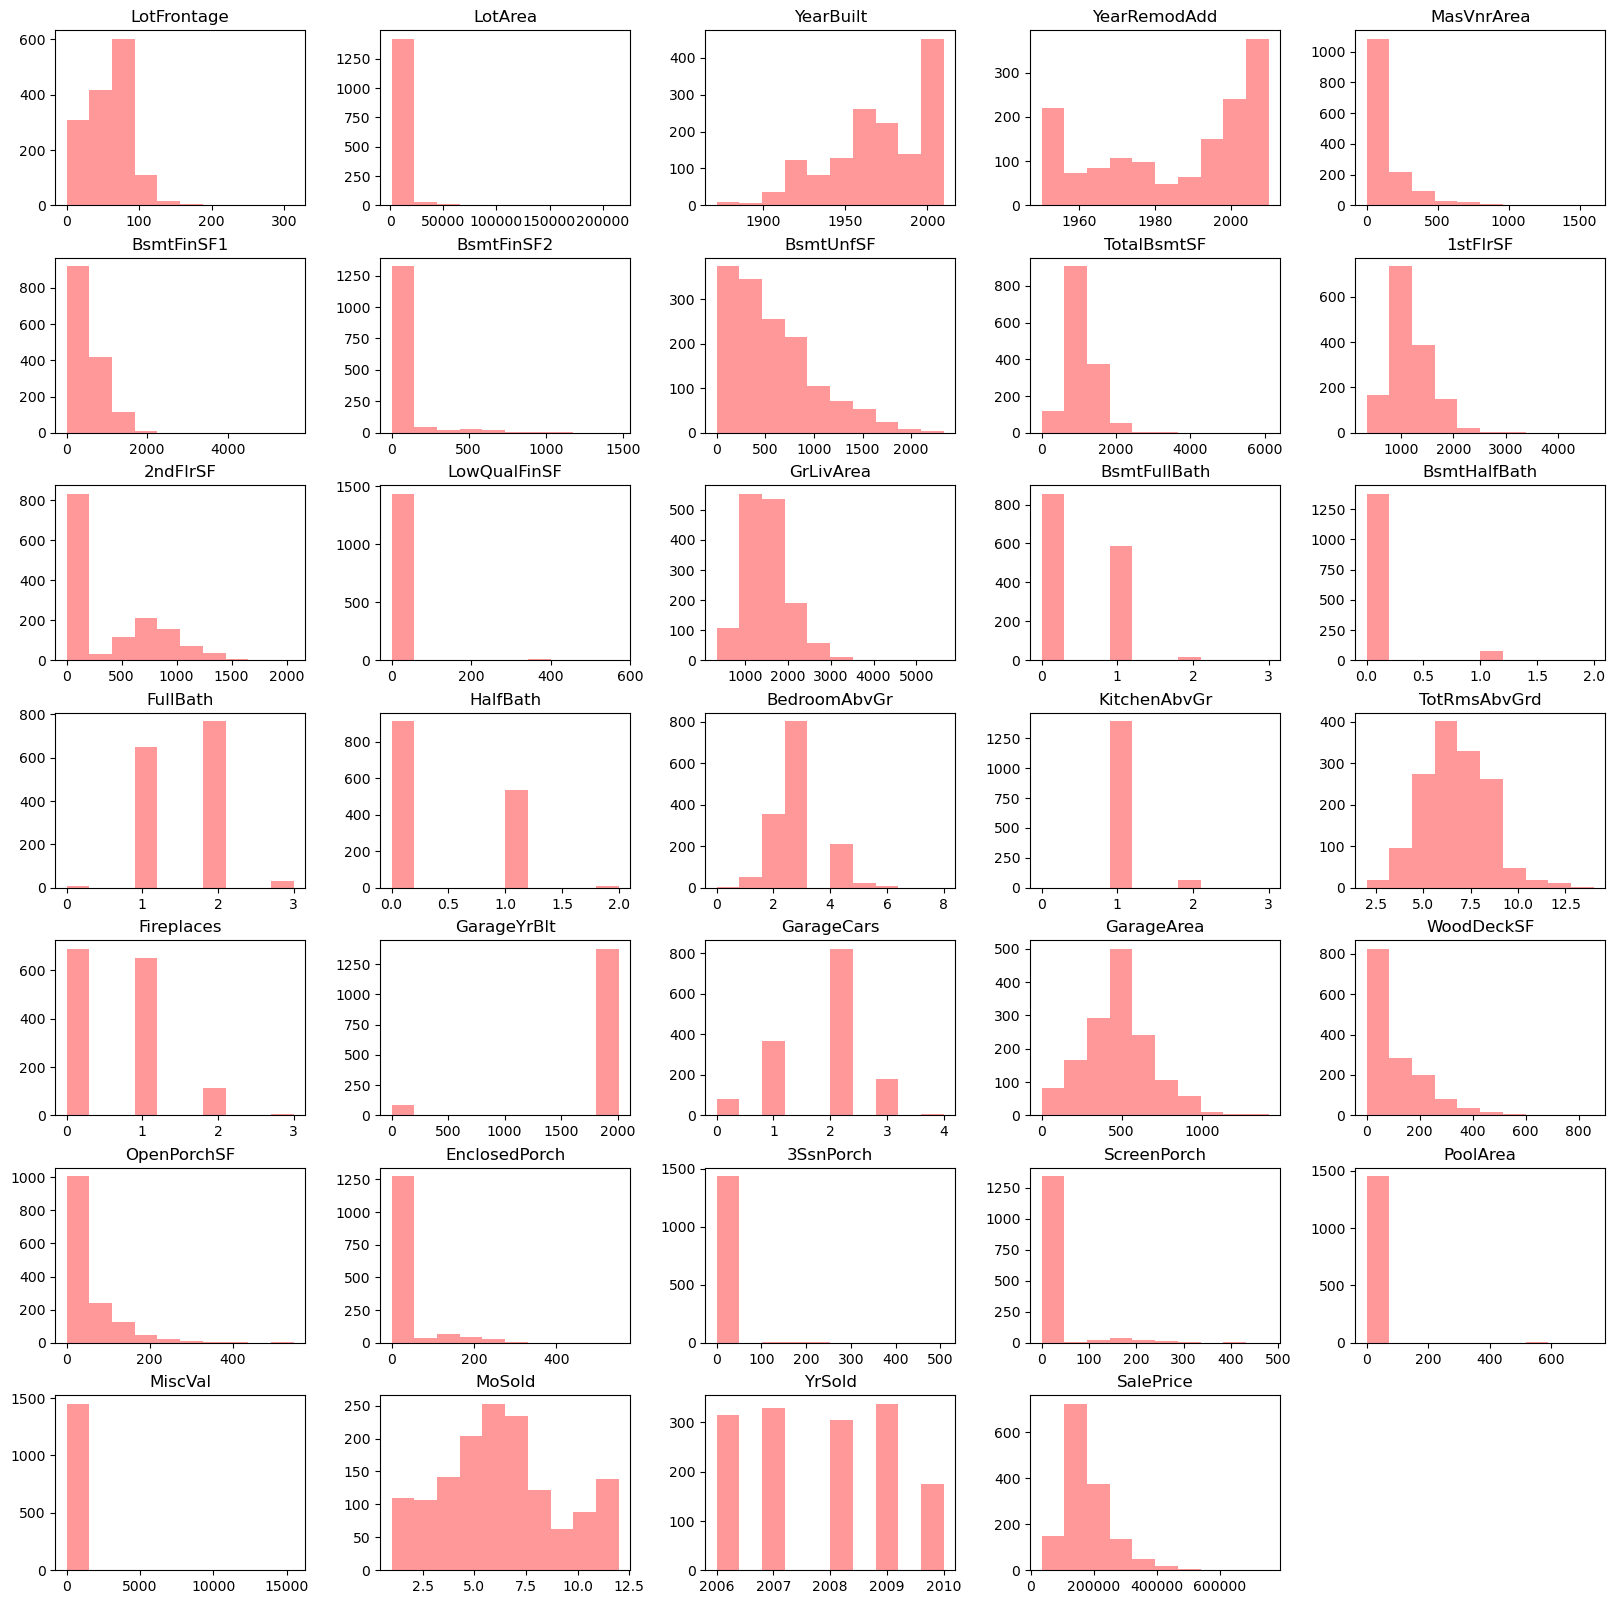

In [972]:
# Histogram of numeric variables
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace =0.3, wspace =0.3)
for i in range(1,35):
    plt.subplot(7,5,i)
    plt.hist(x = data.iloc[: ,var_ind_num1[i- 1]], 
             alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind_num1[i - 1]])
plt.show()

In [973]:
#summary statistics of numeric variables
data.iloc[:,var_ind_num1].describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     57.623288   10516.828082  1971.267808   1984.865753   103.681507   
std      34.664304    9981.264932    30.202904     20.645407   180.569120   
min       0.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      42.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      63.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

In [974]:
# Calculate frequency and percentage
for i in var_ind_cat1: 
    print('--- Frequency Table of '+data.columns[i] +' ---')
    frq_summary=pd.DataFrame({'category':(data.iloc[:, i].value_counts()).index,'freq':data.iloc[:, i].value_counts().values})
    frq_summary['pct']=round(frq_summary['freq']/data.shape[0]* 100, 1)
    frq_summary.sort_values(by ='pct',ascending=False)
    print(frq_summary)

--- Frequency Table of MSSubClass ---
    category  freq   pct
0         20   536  36.7
1         60   299  20.5
2         50   144   9.9
3        120    87   6.0
4         30    69   4.7
5        160    63   4.3
6         70    60   4.1
7         80    58   4.0
8         90    52   3.6
9        190    30   2.1
10        85    20   1.4
11        75    16   1.1
12        45    12   0.8
13       180    10   0.7
14        40     4   0.3
--- Frequency Table of MSZoning ---
  category  freq   pct
0       RL  1151  78.8
1       RM   218  14.9
2       FV    65   4.5
3       RH    16   1.1
4  C (all)    10   0.7
--- Frequency Table of Street ---
  category  freq   pct
0     Pave  1454  99.6
1     Grvl     6   0.4
--- Frequency Table of Alley ---
  category  freq   pct
0       NA  1369  93.8
1     Grvl    50   3.4
2     Pave    41   2.8
--- Frequency Table of LotShape ---
  category  freq   pct
0      Reg   925  63.4
1      IR1   484  33.2
2      IR2    41   2.8
3      IR3    10   0.7
--- Frequ

In [975]:
len(var_ind_cat1)

46

In [976]:
len(var_ind_num1)

34

In [977]:
len(var_ind_cat1)+len(var_ind_num1)

80

In [978]:
data.head(4)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL           65     8450   Pave    NA      Reg   
1   2          20       RL           80     9600   Pave    NA      Reg   
2   3          60       RL           68    11250   Pave    NA      IR1   
3   4          70       RL           60     9550   Pave    NA      IR1   

  LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...    NA          NA       0      2   2008       WD   
1         Lvl    AllPub  ...    NA          NA       0      5   2007       WD   
2         Lvl    AllPub  ...    NA          NA       0      9   2008       WD   
3         Lvl    AllPub  ...    NA          NA       0      2   2006       WD   

  SaleCondition  SalePrice  mvs  mvs_pct  
0        Normal     208500    0      0.0  
1        Normal     181500    0      0.0  
2        Normal     223500    0      0.0  
3       Abnorml     140000    0      0.0  

[4 rows x 83 columns]

# Data Prepration

In [979]:
# Remove added coloumns
data.drop(columns=['mvs','mvs_pct'],inplace=True)    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

### Convert Ordinal Variables in to Numeric (Label Encoding)

In [980]:
# Convert 'LotShape' into numeric variable
data['cnvrt_LotShape']=data['LotShape'].replace(['Reg','IR1','IR2','IR3'],
                                                 list(range(4, 0,-1)),inplace = False)
#Check the results
print(np.sum(data['cnvrt_LotShape'].isnull()))
data['cnvrt_LotShape'].describe()
# data['cnvrt_LotShape']

0


count    1460.000000
mean        3.591781
std         0.582296
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: cnvrt_LotShape, dtype: float64

In [981]:
# Convert 'LandSlope' into numeric variable
data['cnvrt_LandSlope']=data['LandSlope'].replace(['Gtl','Mod','Sev'],
                                                 list(range(3, 0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_LandSlope'].isnull()))
data['cnvrt_LandSlope'].describe()
# data['cnvrt_LandSlope']

0


count    1460.000000
mean        2.937671
std         0.276232
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: cnvrt_LandSlope, dtype: float64

In [982]:
# Convert 'ExterQua' into numeric variable
data['cnvrt_ExterQual']=data['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5, 0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_ExterQual'].isnull()))
data['cnvrt_ExterQual'].describe() 
# data['cnvrt_ExterQual']

0


count    1460.00000
mean        3.39589
std         0.57428
min         2.00000
25%         3.00000
50%         3.00000
75%         4.00000
max         5.00000
Name: cnvrt_ExterQual, dtype: float64

In [983]:
# Convert 'ExterCond' into numeric variable
data['cnvrt_ExterCond']=data['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5, 0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_ExterCond'].isnull()))
data['cnvrt_ExterCond'].describe() 
# data['cnvrt_ExterCond']

0


count    1460.000000
mean        3.083562
std         0.351054
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: cnvrt_ExterCond, dtype: float64

In [984]:
# Convert 'BsmtQual' into numeric variable
data['cnvrt_BsmtQual']=data['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6, 0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_BsmtQual'].isnull()))
data['cnvrt_BsmtQual'].describe() 
# data['cnvrt_BsmtQual']

0


count    1460.000000
mean        4.489041
std         0.876478
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: cnvrt_BsmtQual, dtype: float64

In [985]:
# Convert 'BsmtCond' into numeric variable
data['cnvrt_BsmtCond']=data['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_BsmtCond'].isnull()))
data['cnvrt_BsmtCond'].describe() 
# data['cnvrt_BsmtCond']

0


count    1460.000000
mean        3.934932
std         0.552159
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: cnvrt_BsmtCond, dtype: float64

In [986]:
# Convert 'BsmtExposure' into numeric variable
data['cnvrt_BsmtExposure']=data['BsmtExposure'].replace(['Gd','Av','Mn','No','NA'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_BsmtExposure'].isnull()))
data['cnvrt_BsmtExposure'].describe() 
# data['cnvrt_BsmtExposure']

0


count    1460.000000
mean        2.630822
std         1.066665
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: cnvrt_BsmtExposure, dtype: float64

In [987]:
# Convert 'BsmtFinType1' into numeric variable
data['cnvrt_BsmtFinType1']=data['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
                                                 list(range(7,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_BsmtFinType1'].isnull()))
data['cnvrt_BsmtFinType1'].describe() 
# data['cnvrt_BsmtFinType1']

0


count    1460.000000
mean        4.545890
std         2.107776
min         1.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         7.000000
Name: cnvrt_BsmtFinType1, dtype: float64

In [988]:
# Convert 'BsmtFinType2' into numeric variable
data['cnvrt_BsmtFinType2']=data['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
                                                 list(range(7,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_BsmtFinType2'].isnull()))
data['cnvrt_BsmtFinType2'].describe() 
# data['cnvrt_BsmtFinType2']

0


count    1460.000000
mean        2.247945
std         0.891758
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: cnvrt_BsmtFinType2, dtype: float64

In [989]:
# Convert 'HeatingQC' into numeric variable
data['cnvrt_HeatingQC']=data['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_HeatingQC'].isnull()))
data['cnvrt_HeatingQC'].describe() 
# data['cnvrt_HeatingQC']

0


count    1460.000000
mean        4.145205
std         0.959501
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: cnvrt_HeatingQC, dtype: float64

In [990]:
# Convert 'KitchenQual' into numeric variable
data['cnvrt_KitchenQual']=data['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(data['cnvrt_KitchenQual'].isnull()))
data['cnvrt_KitchenQual'].describe() 
# data['cnvrt_KitchenQual']

0


count    1460.000000
mean        3.511644
std         0.663760
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: cnvrt_KitchenQual, dtype: float64

In [991]:
# Convert 'Functional' into numeric variable
data['cnvrt_Functional']=data['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
                                                 list(range(8,0,-1)), inplace = False)
                
#Check the results
print(np.sum(data['cnvrt_Functional'].isnull()))
data['cnvrt_Functional'].describe() 
# data['cnvrt_Functional']

0


count    1460.000000
mean        7.841781
std         0.667698
min         2.000000
25%         8.000000
50%         8.000000
75%         8.000000
max         8.000000
Name: cnvrt_Functional, dtype: float64

In [992]:
# Convert 'FireplaceQu' into numeric variable
data['cnvrt_FireplaceQu']=data['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_FireplaceQu'].isnull()))
data['cnvrt_FireplaceQu'].describe() 
# data['cnvrt_FireplaceQu']

0


count    1460.000000
mean        2.825342
std         1.810877
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: cnvrt_FireplaceQu, dtype: float64

In [993]:
# Convert 'GarageFinish' into numeric variable
data['cnvrt_GarageFinish']=data['GarageFinish'].replace(['Fin','RFn','Unf','NA'],
                                                 list(range(4,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_GarageFinish'].isnull()))
data['cnvrt_GarageFinish'].describe() 
# data['cnvrt_GarageFinish']

0


count    1460.000000
mean        2.715753
std         0.892831
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: cnvrt_GarageFinish, dtype: float64

In [994]:
# Convert 'GararageQual' into numeric variable
data['cnvrt_GarageQual']=data['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_GarageQual'].isnull()))
data['cnvrt_GarageQual'].describe() 
# data['cnvrt_GarageQual']

0


count    1460.000000
mean        3.810274
std         0.722898
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: cnvrt_GarageQual, dtype: float64

In [995]:
# Convert 'GararageCond' into numeric variable
data['cnvrt_GarageCond']=data['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_GarageCond'].isnull()))
data['cnvrt_GarageCond'].describe() 
# data['cnvrt_GarageCond']

0


count    1460.000000
mean        3.808904
std         0.719685
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: cnvrt_GarageCond, dtype: float64

In [996]:
# Convert 'PavedDrive' into numeric variable
data['cnvrt_PavedDrive']=data['PavedDrive'].replace(['Y','P','N'],
                                                 list(range(3,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_PavedDrive'].isnull()))
data['cnvrt_PavedDrive'].describe() 
# data['cnvrt_PavedDrive']

0


count    1460.000000
mean        2.856164
std         0.496592
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: cnvrt_PavedDrive, dtype: float64

In [997]:
# Convert 'PoolQC' into numeric variable
data['cnvrt_PoolQC']=data['PoolQC'].replace(['Ex','Gd','TA','Fa','NA'],
                                                 list(range(5,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_PoolQC'].isnull()))
data['cnvrt_PoolQC'].describe() 
# data['cnvrt_PoolQC']

0


count    1460.000000
mean        1.010959
std         0.188469
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: cnvrt_PoolQC, dtype: float64

In [998]:
# Convert 'Fence' into numeric variable
data['cnvrt_Fence']=data['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw','NA'],
                                                 list(range(5,0,-1)), inplace = False)

#Check the results
print(np.sum(data['cnvrt_Fence'].isnull()))
data['cnvrt_Fence'].describe() 
# data['cnvrt_Fence']

0


count    1460.000000
mean        1.565753
std         1.204483
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: cnvrt_Fence, dtype: float64

In [999]:
np.sum(data.isnull())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                   ..
cnvrt_GarageQual    0
cnvrt_GarageCond    0
cnvrt_PavedDrive    0
cnvrt_PoolQC        0
cnvrt_Fence         0
Length: 100, dtype: int64

### Outliers

In [1000]:
# data.info()

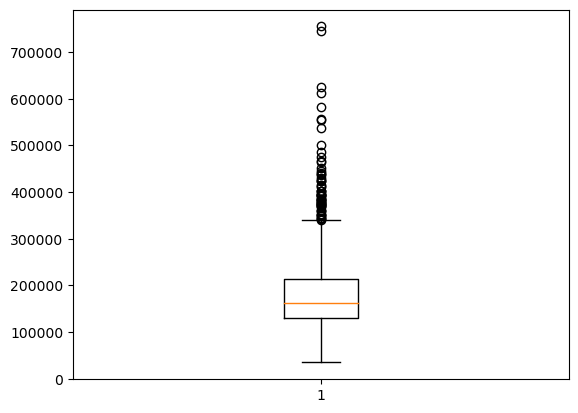

In [1001]:
# Check for outliers
plt.boxplot(data['SalePrice'])
plt.show()

In [1002]:
from scipy.stats import iqr
df=data
# Indices of variables to check for outliers
var_ind_num1=[3, 4, 19, 20, 26, 34, 36, 37, 38]+list(range(43, 53))+[54, 56, 59, 61, 62]+list(range(66, 72))+list(range(75, 78))+[80]

# Function to detect outliers
def outlier_detector(df,var_ind_num1):
    outlier_flags=pd.DataFrame(0,index=df.index,columns=[df.columns[i] for i in var_ind_num1])
    for i in var_ind_num1:
        if i<len(df.columns) and np.issubdtype(df.iloc[:, i].dtype,np.number):
            col = df.iloc[:, i]
            lower_bound=np.quantile(col, 0.25) - 1.5 * iqr(col)
            upper_bound=np.quantile(col, 0.75) + 1.5 * iqr(col)
            outliers=(col<lower_bound) | (col>upper_bound)
            outlier_flags.loc[outliers, df.columns[i]] = 1
    return outlier_flags

# Detect outliers
outlier_flags=outlier_detector(df,var_ind_num1)

# Calculate the number of outliers per column (feature)
outlier_counts_per_feature=outlier_flags.sum(axis=0)

# Calculate the percentage of outliers per column (feature)
total_data_points=len(df)
percentage_outliers_per_feature=(outlier_counts_per_feature/total_data_points)*100

# Combine the counts and percentages into a single DataFrame
outlier_summary=pd.DataFrame({
    'Number of Outliers':outlier_counts_per_feature,
    'Percentage of Outliers':percentage_outliers_per_feature
})

# Find the feature with the most outliers
most_outliers_feature=outlier_counts_per_feature.idxmax()
most_outliers_count=outlier_counts_per_feature.max()
percentage_outliers_most_feature=percentage_outliers_per_feature[most_outliers_feature]

# Sort and display the outlier summary DataFrame
sorted_outlier_summary=outlier_summary.sort_values(by='Number of Outliers', ascending=False)
print("\nSorted outlier summary:")
print(sorted_outlier_summary)


Sorted outlier summary:
               Number of Outliers  Percentage of Outliers
EnclosedPorch                 208               14.246575
BsmtFinSF2                    167               11.438356
ScreenPorch                   116                7.945205
MasVnrArea                     98                6.712329
BsmtHalfBath                   82                5.616438
GarageYrBlt                    81                5.547945
OpenPorchSF                    77                5.273973
LotArea                        69                4.726027
KitchenAbvGr                   68                4.657534
SalePrice                      61                4.178082
TotalBsmtSF                    61                4.178082
MiscVal                        52                3.561644
BedroomAbvGr                   35                2.397260
WoodDeckSF                     32                2.191781
GrLivArea                      31                2.123288
TotRmsAbvGrd                   30              

In [1003]:
# data.drop(['EnclosedPorch','BsmtFinSF2'],axis=1,inplace=True)
print(data.shape)

(1460, 100)


In [1004]:
# Indices of variables to check for outliers
var_ind_num1 =[3,4,19,20,26,34,36,37,38]+list(range(43,53))+[54,56,59,61,62]+list(range(66,72))+list(range(75,78))+[80]

# Function to detect outliers
def outlier_detector(df,var_ind_num1):
    outlier_flags = pd.DataFrame(0,index=df.index,columns=[df.columns[i] for i in var_ind_num1])
    for i in var_ind_num1:
        if i < len(df.columns)and np.issubdtype(df.iloc[:,i].dtype, np.number):
            col=df.iloc[:, i]
            lower_bound=np.quantile(col,0.25)-1.5*iqr(col)
            upper_bound=np.quantile(col,0.75)+1.5*iqr(col)
            outliers=(col<lower_bound)| (col>upper_bound)
            outlier_flags.loc[outliers,df.columns[i]] = 1
    return outlier_flags

# Detect outliers
outlier_flags=outlier_detector(df,var_ind_num1)

# Calculate the number of outliers per row
outlier_counts=outlier_flags.sum(axis=1)

# Sort the outlier counts
sorted_outlier_counts=outlier_counts.sort_values(ascending=False)
print(sorted_outlier_counts)

1298    12
1182     8
523      8
197      8
691      8
        ..
715      0
719      0
721      0
722      0
730      0
Length: 1460, dtype: int64


In [1005]:
# data.iloc[[1298,1182,523], :]

In [1006]:
data.shape

(1460, 100)

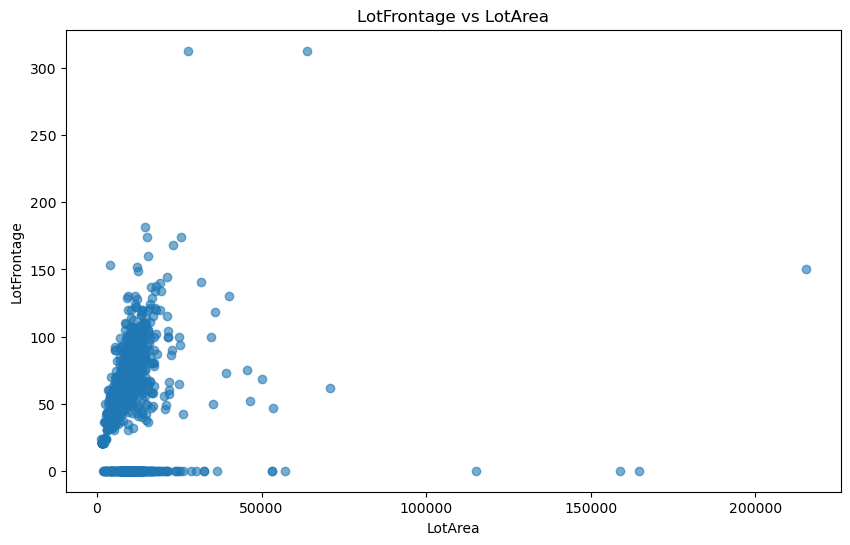

In [1007]:
# Scatter plot of LotFrontage vs LotArea 
plt.figure(figsize=(10, 6))

# Enhanced scatter plot with color and marker size
plt.scatter(data['LotArea'],data['LotFrontage'],alpha=0.6)

plt.title('LotFrontage vs LotArea')
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')
plt.show()

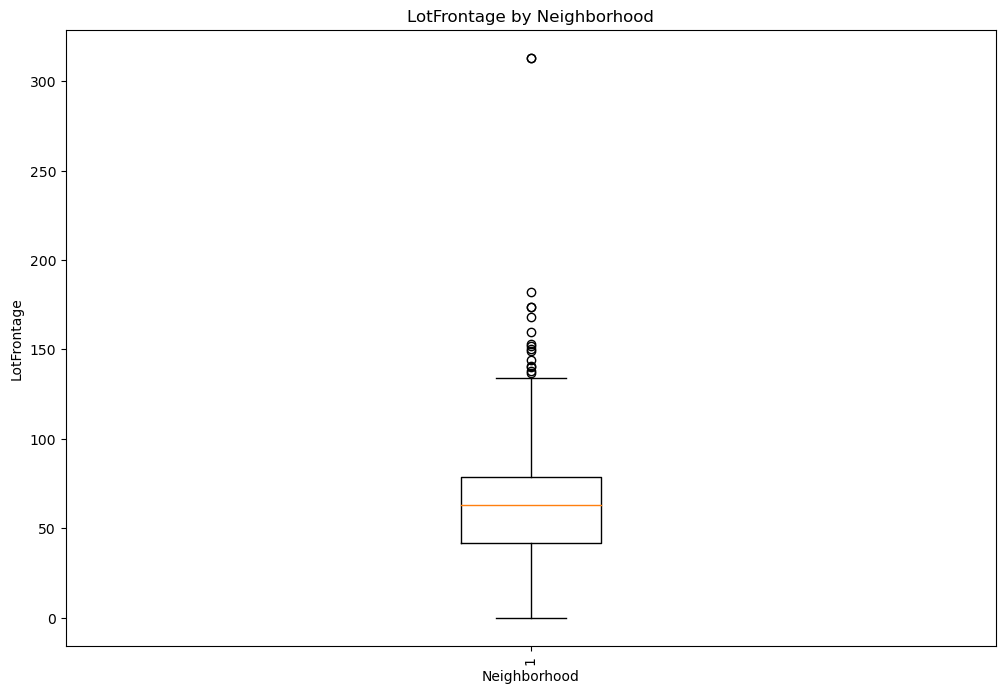

In [1008]:
# Box plot of LotFrontage by Neighborhood
plt.figure(figsize=(12, 8))
plt.boxplot(data['LotFrontage'])
# plt.box(data['LotArea'], data['LotFrontage'])
plt.title('LotFrontage by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('LotFrontage')
plt.xticks(rotation=90)
plt.show()

In [1009]:
summary_stats=data.groupby('Neighborhood')['LotFrontage'].describe()
print(summary_stats)

              count       mean        std   min    25%   50%     75%    max
Neighborhood                                                               
Blmngtn        17.0  38.823529  19.063169   0.0  43.00  43.0   53.00   53.0
Blueste         2.0  24.000000   0.000000  24.0  24.00  24.0   24.00   24.0
BrDale         16.0  21.562500   1.209339  21.0  21.00  21.0   21.00   24.0
BrkSide        58.0  50.568966  23.846815   0.0  50.00  51.0   60.00  144.0
ClearCr        28.0  38.750000  44.216324   0.0   0.00   0.0   80.00  138.0
CollgCr       150.0  60.213333  30.327427   0.0  57.75  68.0   75.00  122.0
Crawfor        51.0  57.725490  33.633363   0.0  47.00  61.0   80.00  130.0
Edwards       100.0  62.760000  36.232448   0.0  51.50  61.0   73.25  313.0
Gilbert        79.0  49.544304  46.712651   0.0   0.00  59.0   71.50  182.0
IDOTRR         37.0  57.432432  24.607520   0.0  50.00  60.0   60.00  120.0
MeadowV        17.0  24.529412  13.215132   0.0  21.00  21.0   36.00   44.0
Mitchel     

In [1010]:
#summary statistics of numeric variables
data.iloc[:,var_ind_num1].describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     57.623288   10516.828082  1971.267808   1984.865753   103.681507   
std      34.664304    9981.264932    30.202904     20.645407   180.569120   
min       0.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      42.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      63.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

# Data understanding- Phase2

In [1011]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1460 non-null   int64 
 1   MSSubClass          1460 non-null   int64 
 2   MSZoning            1460 non-null   object
 3   LotFrontage         1460 non-null   int64 
 4   LotArea             1460 non-null   int64 
 5   Street              1460 non-null   object
 6   Alley               1460 non-null   object
 7   LotShape            1460 non-null   object
 8   LandContour         1460 non-null   object
 9   Utilities           1460 non-null   object
 10  LotConfig           1460 non-null   object
 11  LandSlope           1460 non-null   object
 12  Neighborhood        1460 non-null   object
 13  Condition1          1460 non-null   object
 14  Condition2          1460 non-null   object
 15  BldgType            1460 non-null   object
 16  HouseStyle          146

In [1012]:
# List of all numeric variables after converting ordinal variables to numeric
var_ind_num2=[3,4,19,20,26,34,36,37,38]+list(range(43,53))+[54,56,59,61,62]+list(range(66,72))+list(range(75,78))+[80]+list(range(81,100))
# var_ind_num2
len(var_ind_num2)

53

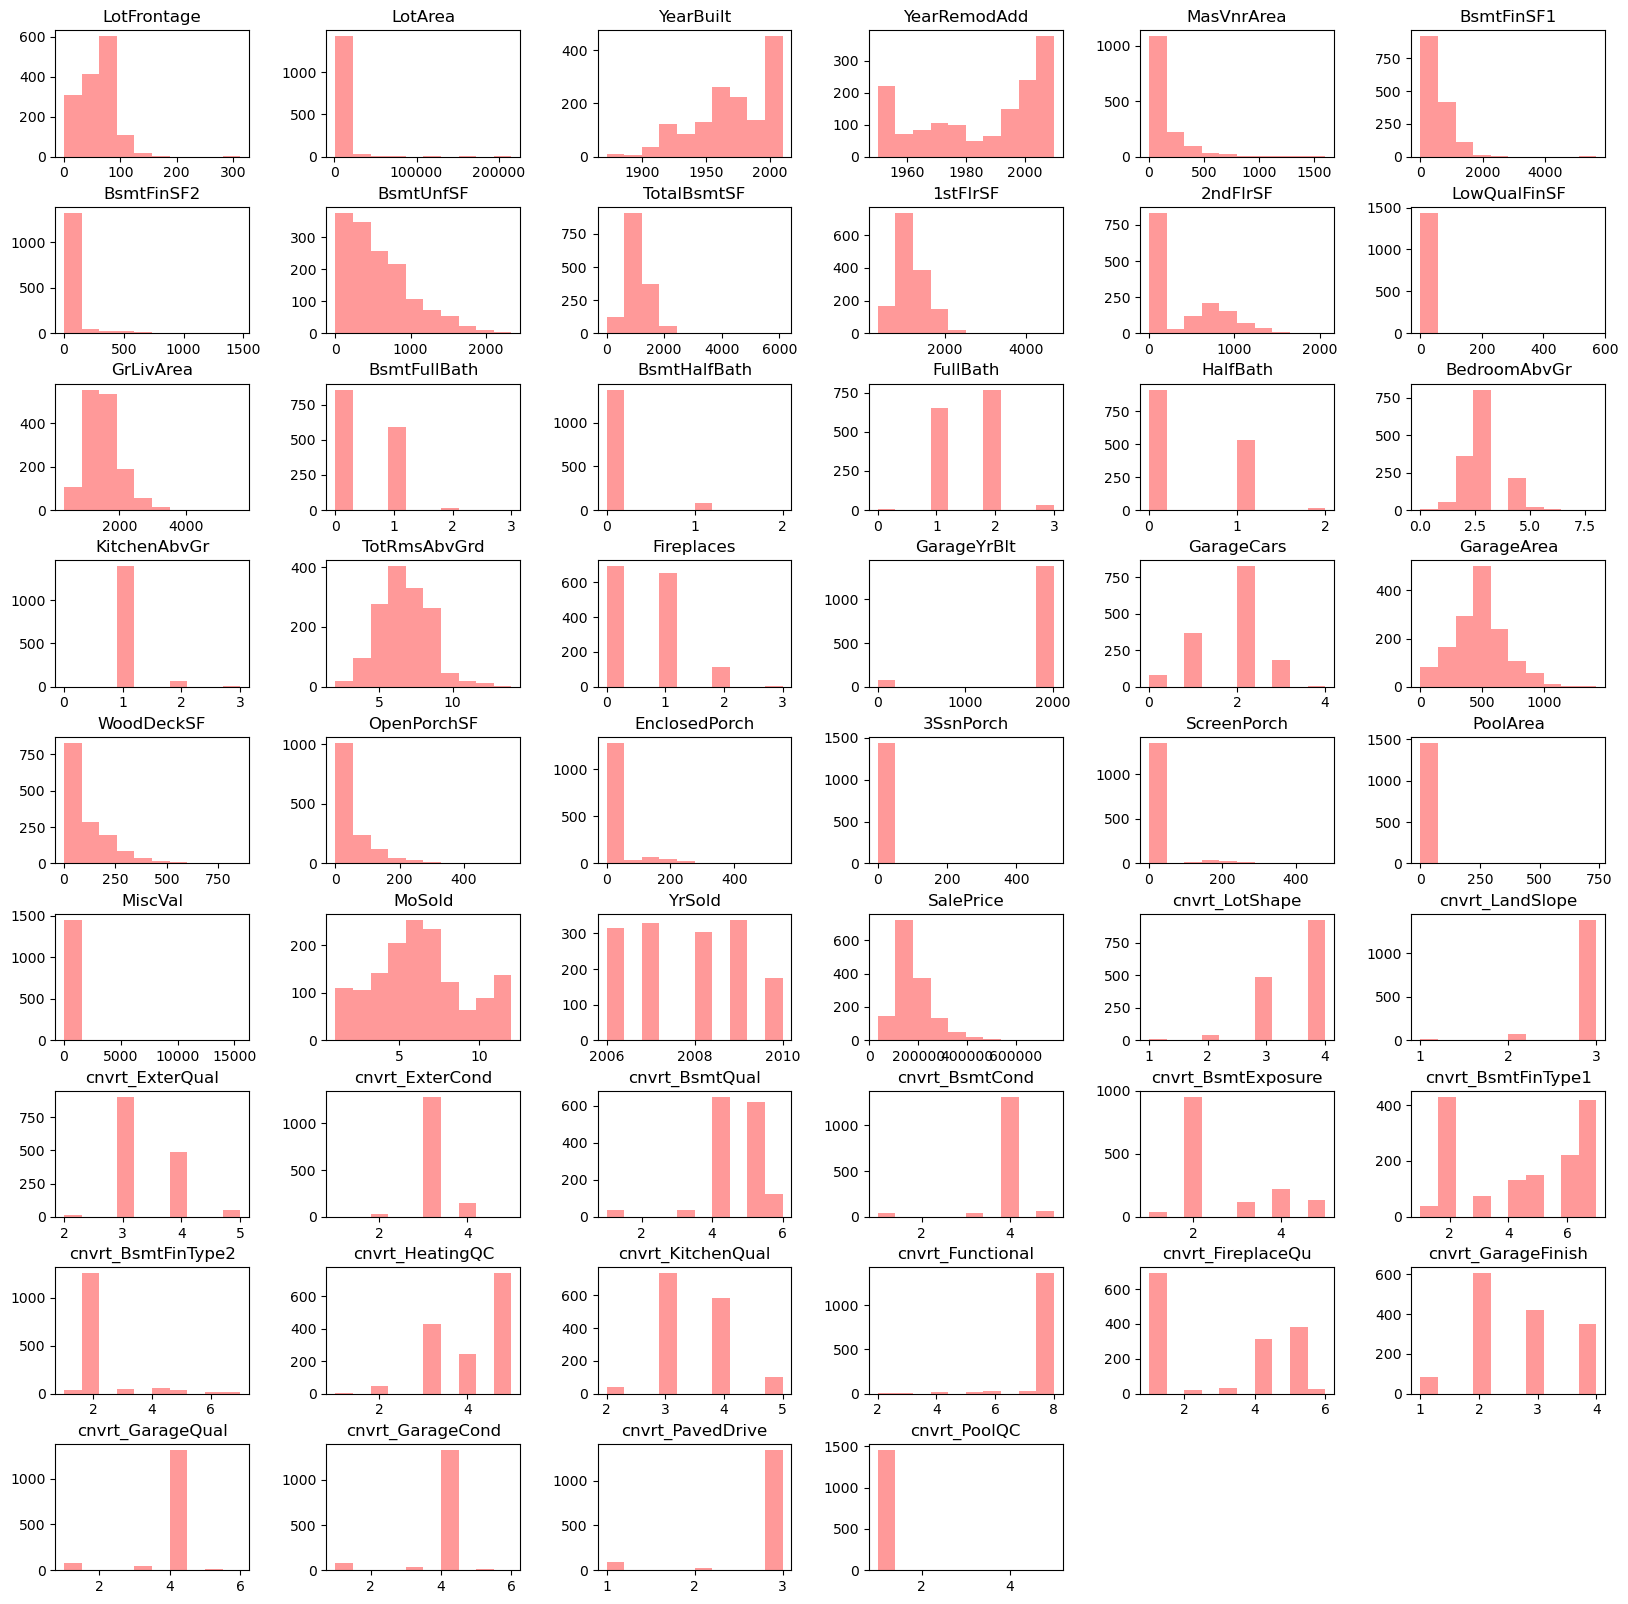

In [1013]:
# Histogram of numeric variables
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,53):
    plt.subplot(9,6,i)
    plt.hist(x=data.iloc[: ,var_ind_num2[i- 1]], 
             alpha=0.4,color = 'red')
    plt.title(data.columns[var_ind_num2[i - 1]])
plt.show()

5: Bivariate data analysis

In [1014]:
#Correlation analysis after converting ordinal variables to numeric
corr_table=round(data.iloc[:,var_ind_num2].corr(method='pearson'),2)
corr_table

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage                1.00     0.10       0.04          0.08        0.10   
LotArea                    0.10     1.00       0.01          0.01        0.10   
YearBuilt                  0.04     0.01       1.00          0.59        0.31   
YearRemodAdd               0.08     0.01       0.59          1.00        0.18   
MasVnrArea                 0.10     0.10       0.31          0.18        1.00   
BsmtFinSF1                 0.08     0.21       0.25          0.13        0.26   
BsmtFinSF2                -0.01     0.11      -0.05         -0.07       -0.07   
BsmtUnfSF                  0.16    -0.00       0.15          0.18        0.11   
TotalBsmtSF                0.24     0.26       0.39          0.29        0.36   
1stFlrSF                   0.25     0.30       0.28          0.24        0.34   
2ndFlrSF                   0.04     0.05       0.01          0.14        0.17   
LowQualFinSF               0.05     0.00      -0.18         -0.06       -0.07   
GrLivArea                  0.22     0.26       0.20          0.29        0.39   
BsmtFullBath               0.01     0.16       0.19          0.12        0.09   
BsmtHalfBath              -0.03     0.05      -0.04         -0.01        0.03   
FullBath                   0.12     0.13       0.47          0.44        0.28   
HalfBath                  -0.01     0.01       0.24          0.18        0.20   
BedroomAbvGr               0.14     0.12      -0.07         -0.04        0.10   
KitchenAbvGr               0.03    -0.02      -0.17         -0.15       -0.04   
TotRmsAbvGrd               0.22     0.19       0.10          0.19        0.28   
Fireplaces                 0.04     0.27       0.15          0.11        0.25   
GarageYrBlt                0.02     0.07       0.27          0.15        0.13   
GarageCars                 0.17     0.15       0.54          0.42        0.36   
GarageArea                 0.20     0.18       0.48          0.37        0.37   
WoodDeckSF                -0.02     0.17       0.22          0.21        0.16   
OpenPorchSF                0.07     0.08       0.19          0.23        0.12   
EnclosedPorch              0.03    -0.02      -0.39         -0.19       -0.11   
3SsnPorch                  0.02     0.02       0.03          0.05        0.02   
ScreenPorch                0.02     0.04      -0.05         -0.04        0.06   
PoolArea                   0.11     0.08       0.00          0.01        0.01   
MiscVal                   -0.06     0.04      -0.03         -0.01       -0.03   
MoSold                     0.02     0.00       0.01          0.02       -0.01   
YrSold                    -0.01    -0.01      -0.01          0.04       -0.01   
SalePrice                  0.21     0.26       0.52          0.51        0.48   
cnvrt_LotShape             0.11    -0.32      -0.23         -0.18       -0.09   
cnvrt_LandSlope            0.04    -0.44       0.07          0.06        0.02   
cnvrt_ExterQual            0.13     0.06       0.60          0.59        0.35   
cnvrt_ExterCond           -0.05     0.01      -0.10          0.07       -0.02   
cnvrt_BsmtQual             0.09     0.07       0.60          0.52        0.28   
cnvrt_BsmtCond             0.02     0.03       0.18          0.19        0.07   
cnvrt_BsmtExposure         0.07     0.23       0.29          0.22        0.17   
cnvrt_BsmtFinType1        -0.02     0.06       0.35          0.22        0.19   
cnvrt_BsmtFinType2        -0.02     0.09      -0.04         -0.04       -0.05   
cnvrt_HeatingQC            0.10     0.00       0.45          0.55        0.16   
cnvrt_KitchenQual          0.13     0.07       0.53          0.63        0.29   
cnvrt_Functional           0.00    -0.03       0.15          0.07        0.08   
cnvrt_FireplaceQu          0.08     0.19       0.22          0.20        0.28   
cnvrt_GarageFinish         0.09     0.12       0.60          0.44        0.28   
cnvrt_GarageQual           0.01     0.08       0.29

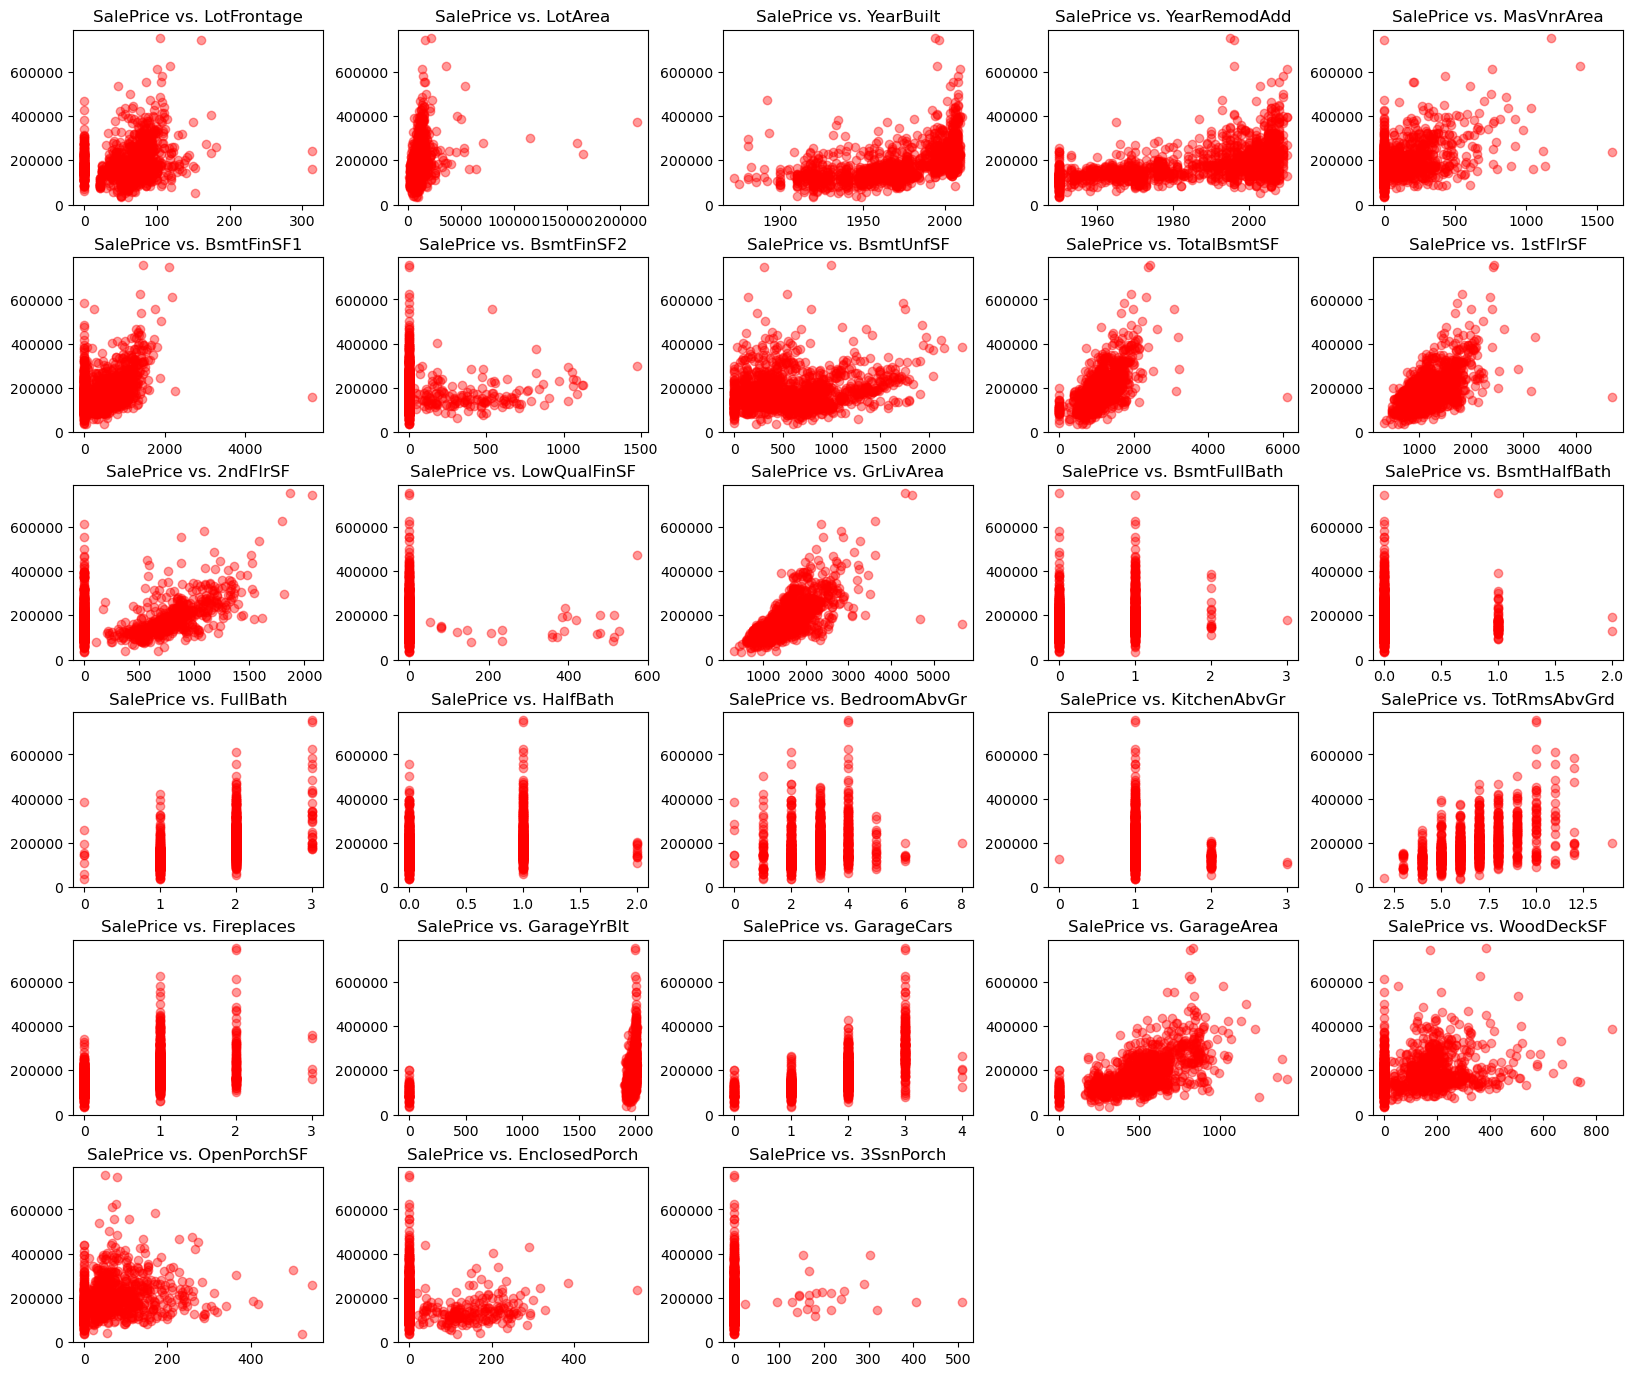

In [1015]:
#Scatter plot for numeric variables after converting ordinal variables to numeric
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3,wspace=0.3)
for i in range(1,29):
    plt.subplot(7,5,i)
    plt.scatter(x=data.iloc[: ,var_ind_num2[i - 1]],y=data['SalePrice'],alpha=0.4,color='red')
    plt.title('SalePrice vs. '+data.columns[var_ind_num2[i - 1]])
plt.show()

In [1016]:
var_ind_cat2=[1,2,5,6,8,9,10]+list(range(12,17))+list(range(21,26))+[29,39,41,42,58,74,78,79] 

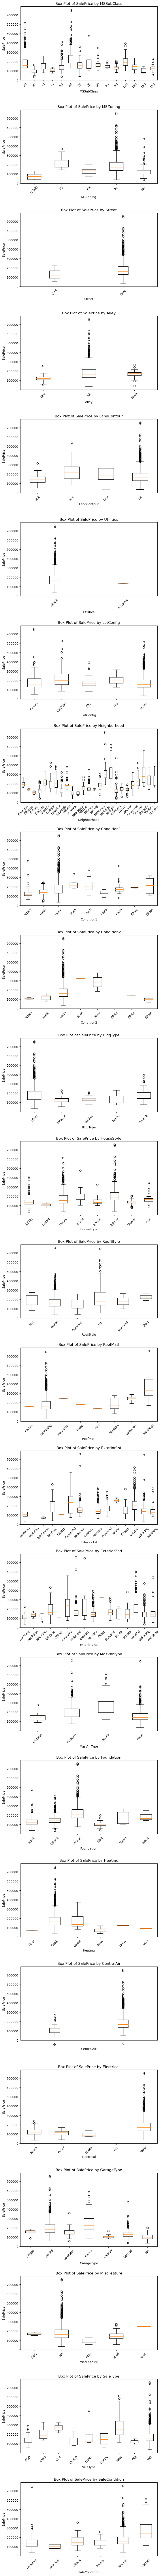

In [1017]:
# list of categorical column
col_cat2=[data.columns[i] for i in var_ind_cat2]

# subplots
fig,axes=plt.subplots(len(col_cat2),1,figsize=(8,6*len(col_cat2)))

# If there's only one plot
if len(col_cat2)==1:
    axes=[axes]

# Loop over each categorical column and plot the boxplot
for ax,col in zip(axes,col_cat2):
    # Ensure categories are sorted to maintain consistent order
    categories=sorted(data[col].dropna().unique())
    
    # ensuring non-empty categories
    data_to_plot=[data[data[col]==category]['SalePrice'] for category in categories]
    
    # Plot the boxplot
    ax.boxplot(data_to_plot,labels=categories)
    ax.set_title(f'Box Plot of SalePrice by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.tick_params(axis='x',rotation=45)
plt.subplots_adjust(hspace=0.4)
plt.show()

# Model I: Biuld Classic Linear Regression Model

In [1018]:
# Train data
train=data
train.info()
# print(train.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1460 non-null   int64 
 1   MSSubClass          1460 non-null   int64 
 2   MSZoning            1460 non-null   object
 3   LotFrontage         1460 non-null   int64 
 4   LotArea             1460 non-null   int64 
 5   Street              1460 non-null   object
 6   Alley               1460 non-null   object
 7   LotShape            1460 non-null   object
 8   LandContour         1460 non-null   object
 9   Utilities           1460 non-null   object
 10  LotConfig           1460 non-null   object
 11  LandSlope           1460 non-null   object
 12  Neighborhood        1460 non-null   object
 13  Condition1          1460 non-null   object
 14  Condition2          1460 non-null   object
 15  BldgType            1460 non-null   object
 16  HouseStyle          146

In [1019]:
# Convert 'MSSubClass' to string type
train['MSSubClass']=train['MSSubClass'].astype(str)

In [1020]:
#Split Train data into test and train for validation (named trainv & testv)
from sklearn.model_selection import train_test_split
trainv, testv = train_test_split(data, test_size = 0.3, random_state = 1234)
print(trainv.shape)
print(testv.shape)


(1022, 100)
(438, 100)


In [1021]:
#Create dummy variables for categorical variables
dummy_vars_trv=pd.get_dummies(trainv[['MSSubClass','MSZoning','Street','Alley','LandContour',
                                   'Utilities','LotConfig','Neighborhood','Condition1', 'Condition2',
                                   'BldgType','HouseStyle','RoofStyle','Heating','RoofMatl',
                                   'Exterior1st','Exterior2nd','MasVnrType','Foundation','CentralAir',
                                   'Electrical','GarageType','MiscFeature','SaleType','SaleCondition']])
                                   
# dummy_vars containing only 0 and 1                                 
dummy_vars_trv=dummy_vars_trv.astype(int)

print(dummy_vars_trv.head(2))
dummy_vars_trv.info()

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1017               1               0               0               0   
405                0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
1017              0              0              0              0   
405               1              0              0              0   

      MSSubClass_50  MSSubClass_60  ...  SaleType_ConLw  SaleType_New  \
1017              0              0  ...               0             0   
405               0              0  ...               0             0   

      SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
1017             0            0                      1                      0   
405              0            1                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1017                     0              

In [1022]:
dummy_vars_trv.shape

(1022, 182)

In [1023]:
# Define base level for each categorical variable According to frequency percentage of each level
dummy_vars_trv.drop(columns = ['MSSubClass_20','MSZoning_RL','Street_Pave','Alley_NA','LandContour_Lvl','Utilities_AllPub',
                           'LotConfig_Inside', 'Neighborhood_NAmes', 'Condition1_Norm','Condition2_Norm','BldgType_1Fam',
                           'HouseStyle_1Story','RoofStyle_Gable','RoofMatl_CompShg','Exterior1st_VinylSd','Exterior2nd_VinylSd',
                           'MasVnrType_none','Foundation_PConc','CentralAir_Y','Heating_GasA','Electrical_SBrkr',
                           'GarageType_Attchd','SaleType_WD','SaleCondition_Normal','MiscFeature_NA'], inplace = True)
dummy_vars_trv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1017 to 815
Columns: 157 entries, MSSubClass_120 to SaleCondition_Partial
dtypes: int32(157)
memory usage: 634.8 KB


In [1024]:
print(dummy_vars_trv.shape)
print(trainv.shape)

(1022, 157)
(1022, 100)


In [1025]:
dummy_vars_trv

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1017               1               0               0               0   
405                0               0               0               0   
6                  0               0               0               0   
388                0               0               0               0   
501                0               0               0               0   
...              ...             ...             ...             ...   
1228               1               0               0               0   
1077               0               0               0               0   
1318               0               0               0               0   
723                0               0               0               0   
815                0               0               0               0   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
1017              0              0              0              0   
405               0              0              0              0   
6                 0              0              0              0   
388               0              0              0              0   
501               0              0              0              0   
...             ...            ...            ...            ...   
1228              0              0              0              0   
1077              0              0              0              0   
1318              0              0              0              0   
723               0              0              0              1   
815               0              0              0              0   

      MSSubClass_60  MSSubClass_70  ...  SaleType_ConLD  SaleType_ConLI  \
1017              0              0  ...               0               0   
405               0              0  ...               0               0   
6                 0              0  ...               0               0   
388               0              0  ...               0               0   
501               1              0  ...               0               0   
...             ...            ...  ...             ...             ...   
1228              0              0  ...               0               0   
1077              0              0  ...               0               0   
1318              0              0  ...               0               0   
723               0              0  ...               0               0   
815               0              0  ...               0               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleCondition_Abnorml  \
1017               0             0             0                      1   
405                0             0             0                      0   
6                  0             0             0                      0   
388                0             0             0                      0   
501                0             0             0                      0   
...              ...           ...           ...                    ...   
1228               0             1             0                      0   
1077               0             0             0                      1   
1318               0             0             0                      0   
723                0             0             0                      0   
815                0             0             0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1017                      0                     0                     0   
405                       0                     0                     0   
6                         0                     0                     0   
388                       0                     0                     0   
501                       0                     0                     0   
...                     ...                   ...                   ... 

In [1026]:
#Define feature matrix
# Train All columns except 'SalePrice'
X_X=trainv.iloc[:,list(range(0,80))+list(range(81,100))]
print(X_X.columns)
X_trainv=pd.concat([X_X,dummy_vars_trv], axis = 1)
# X_trainv.info()
# #add constant
X_trainv=sm.add_constant(X_trainv)
X_trainv.head(2)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

const    Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1017    1.0  1018        120       RL            0     5814   Pave    NA   
405     1.0   406         20       RL            0     9991   Pave    NA   

     LotShape LandContour  ... SaleType_ConLD SaleType_ConLI SaleType_ConLw  \
1017      IR1         Lvl  ...              0              0              0   
405       IR1         Lvl  ...              0              0              0   

     SaleType_New SaleType_Oth SaleCondition_Abnorml SaleCondition_AdjLand  \
1017            0            0                     1                     0   
405             0            0                     0                     0   

     SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Partial  
1017                    0                     0                      0  
405                     0                     0                      0  

[2 rows x 257 columns]

In [1027]:
X_trainv.shape

(1022, 257)

In [1028]:
# Remove coloumn'Id'
X_trainv.drop(columns=['Id'],inplace=True)
print(X_trainv.shape)
X_trainv.head()

(1022, 256)


const MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1017    1.0        120       RL            0     5814   Pave    NA      IR1   
405     1.0         20       RL            0     9991   Pave    NA      IR1   
6       1.0         20       RL           75    10084   Pave    NA      Reg   
388     1.0         20       RL           93     9382   Pave    NA      IR1   
501     1.0         60       FV           75     9803   Pave    NA      Reg   

     LandContour Utilities  ... SaleType_ConLD SaleType_ConLI SaleType_ConLw  \
1017         Lvl    AllPub  ...              0              0              0   
405          Lvl    AllPub  ...              0              0              0   
6            Lvl    AllPub  ...              0              0              0   
388          Lvl    AllPub  ...              0              0              0   
501          Lvl    AllPub  ...              0              0              0   

     SaleType_New SaleType_Oth SaleCondition_Abnorml SaleCondition_AdjLand  \
1017            0            0                     1                     0   
405             0            0                     0                     0   
6               0            0                     0                     0   
388             0            0                     0                     0   
501             0            0                     0                     0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Partial  
1017                     0                     0                      0  
405                      0                     0                      0  
6                        0                     0                      0  
388                      0                     0                      0  
501                      0                     0                      0  

[5 rows x 256 columns]

In [1029]:
X_trainv.shape

(1022, 256)

In [1030]:
# Define response matrix
y_trainv=trainv['SalePrice']
print(len(y_trainv))
y_trainv

1022


1017    187500
405     150000
6       307000
388     191000
501     226700
         ...  
1228    367294
1077    138800
1318    275000
723     135000
815     224900
Name: SalePrice, Length: 1022, dtype: int64

In [1031]:
X_trainv=X_trainv.drop(columns=X_trainv.select_dtypes(include=['object']).columns)
# Check the data types of the cleaned DataFrame
print(X_trainv.dtypes)
X_trainv.info()

const                    float64
LotFrontage                int64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_Abnorml      int32
SaleCondition_AdjLand      int32
SaleCondition_Alloca       int32
SaleCondition_Family       int32
SaleCondition_Partial      int32
Length: 212, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1017 to 815
Columns: 212 entries, const to SaleCondition_Partial
dtypes: float64(1), int32(157), int64(54)
memory usage: 1.0 MB


In [1032]:
# Convert float64 and int32 columns to int64
X_trainv=X_trainv.astype({col:'int64' for col in X_trainv.select_dtypes(include=['float64','int32']).columns})

# Check the data types of the columns to verify the conversion
print(X_trainv.dtypes)

const                    int64
LotFrontage              int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
                         ...  
SaleCondition_Abnorml    int64
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Partial    int64
Length: 212, dtype: object


In [1033]:
X_trainv.shape

(1022, 212)

In [1034]:
#Linear regression- model 1
model_1=sm.OLS(y_trainv,X_trainv).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     47.83
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:33:15   Log-Likelihood:                -11710.
No. Observations:                1022   AIC:                         2.383e+04
Df Residuals:                     815   BIC:                         2.485e+04
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.244e+05   1.45e+06     -0.292      0.770   -3.28e+06    2.43e+06
LotFrontage              30.9974     31.021      0.999      0.318     -29.893      91.888
LotArea                   0.4095      0.144      2.848      0.005       0.127       0.692
OverallQual            8137.3197   1414.696      5.752      0.000    5360.442    1.09e+04
OverallCond            5217.8559   1177.711      4.431      0.000    2906.151    7529.561
YearBuilt               231.4660    116.936      1.979      0.048       1.935     460.998
YearRemodAdd              6.1239     78.115      0.078      0.938    -147.207     159.455
MasVnrArea               29.2115      7.700      3.793      0.000      14.097      44.326
BsmtFinSF1               16.4604      3.590      4.585      0.000       9.413      23.508
BsmtFinSF2                9.0956      6.716      1.354      0.176      -4.087      22.278
BsmtUnfSF                -4.1291      3.204     -1.289      0.198     -10.419       2.160
TotalBsmtSF              21.4268      4.667      4.591      0.000      12.266      30.588
1stFlrSF                 17.3976      8.434      2.063      0.039       0.844      33.952
2ndFlrSF                 38.3211      7.824      4.898      0.000      22.963      53.679
LowQualFinSF            -32.9508     19.362     -1.702      0.089     -70.956       5.054
GrLivArea                22.7679      7.974      2.855      0.004       7.116      38.420
BsmtFullBath            248.5334   2787.416      0.089      0.929   -5222.828    5719.894
BsmtHalfBath          -2624.7522   4274.509     -0.614      0.539    -1.1e+04    5765.593
FullBath               2011.9828   3049.787      0.660      0.510   -3974.380    7998.345
HalfBath                898.0215   2926.238      0.307      0.759   -4845.829    6641.872
BedroomAbvGr          -5757.9152   1897.734     -3.034      0.002   -9482.937   -2032.893
KitchenAbvGr           -1.42e+04   9338.639     -1.520      0.129   -3.25e+04    4135.342
TotRmsAbvGrd           4408.5240   1295.386      3.403      0.001    1865.837    6951.211
Fireplaces             8041.6138   3126.828      2.572      0.010    1904.029    1.42e+04
GarageYrBlt              43.6328     82.728      0.527      0.598    -118.753     206.019
GarageCars             2203.6150   3124.466      0.705      0.481   -3929.333    8336.563
GarageArea               25.1661     10.557      2.384      0.017       4.443      45.889
WoodDeckSF                9.5207      7.821      1.217      0.224      -5.832      24.873
OpenPorchSF              11.6915     15.505      0.754      0.451     -18.742      42.125
EnclosedPorch           -18.1047     16.709     -1.084      0.279     -50.902      14.692
3SsnPorch                41.9458     30.440      1.378      0.169     -17.803     101.695
ScreenPorch            

In [1035]:
# Function to plot histogram of residuals
def hist_residuals(model,bins = 50):
    #Calculate density
    from scipy import stats
    density=stats.gaussian_kde(model.resid)
    xp=np.linspace(model.resid.min(),model.resid.max(), 100)
    yp=density.pdf(xp)

    #Histogram
    plt.hist(model.resid,bins=bins, 
             color='red',alpha = 0.7,density = True)
    plt.axvline(model.resid.mean(), color='black', 
                linewidth=2, linestyle='--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp,yp,color='black',linewidth = 2)
    plt.legend()
    
    return plt.show()  

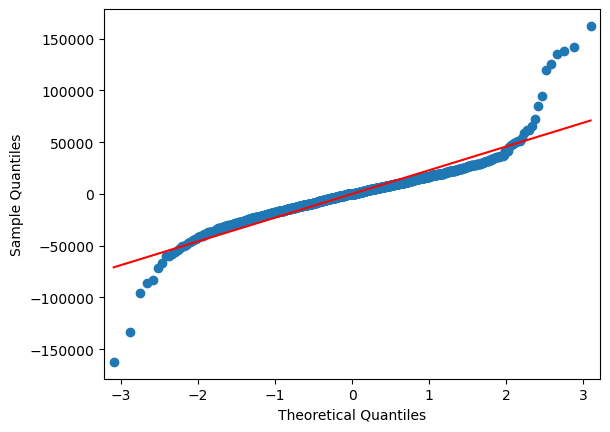

In [1036]:
#QQ-plot- model 1
sm.qqplot(model_1.resid,line = 's')
plt.show()

In [1037]:
# Function to plot residuals vs. fitted values
def residuals_fittedvalues_plot(model):
    # Implement Lowess algorithm
    lowess_res=sm.nonparametric.lowess(model.resid, model.fittedvalues)

    # Scatter plot: residuals vs. fitted values
    plt.scatter(x=model.fittedvalues,y = model.resid, 
                color='red',alpha = 0.7,label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values',fontsize = 12)
    plt.ylabel('Residuals',fontsize = 12)
    plt.grid()

    # Add LOWESS line
    plt.plot(lowess_res[:, 0],lowess_res[:, 1],'black', 
             alpha = 0.8,linewidth = 2,label='LOWESS')
    plt.legend()

    # Top 3 observations with greates absolute value of the residual
    top3=abs(model.resid).sort_values(ascending=False)[:3]
    for i in top3.index:
        plt.annotate(i,xy=(model.fittedvalues[i],model.resid[i]),color='blue')
    
    return plt.show()

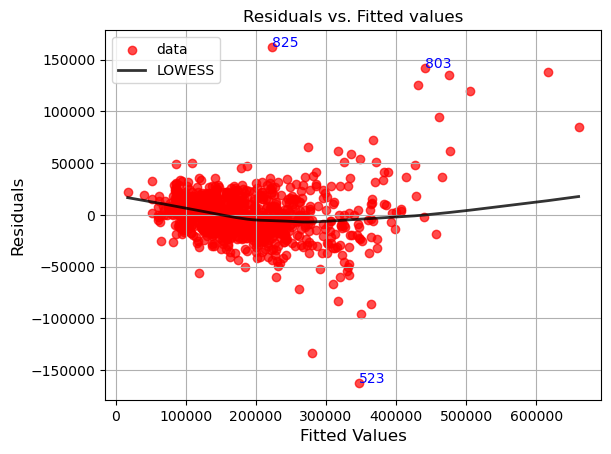

In [1038]:
# Scatter plot of residuals vs. fitted values- model 1
residuals_fittedvalues_plot(model_1)

In [1039]:
# trainv.loc[[825,523,691],:]

In [1040]:
#Function to check Cook's distance
def influencer_detector(model,thershold = 1):
    
    #create instance of influence
    influence=model.get_influence()

    #Obtain Cook's distance for each observation
    cooks=influence.cooks_distance

    #Check observations w/ Cook's distance greater than thershold
    return np.where(cooks[0] > 1)

In [1041]:
# #Check Cook's ditance- model 1
# influencer_detector(model_1)

In [1042]:
# trainv.loc[[65,   83,   91,  761,  819,  897, 1059, 1118], :]

In [1043]:
# #List of all numeric variables after converting ordinal variables to numeric (not including 'Saleprice')
# var_ind_num3=[3,4,19,20,26,34,36,37,38]+ list(range(43,53))+[54,56,59,61,62]+list(range(66,72))+list(range(75,78))+list(range(81,100))
# # var_ind_num2
# len(var_ind_num3)

In [1044]:
#Function to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [1045]:
#Check multicollinearity for numeric variables
calc_vif(X_trainv)
#Note: If VIF > 10 then multicollinearity is high

C:\Users\Taban\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables           VIF
0                    const  3.280421e+06
1              LotFrontage  1.865926e+00
2                  LotArea  2.997268e+00
3              OverallQual  6.122441e+00
4              OverallCond  2.768753e+00
..                     ...           ...
207  SaleCondition_Abnorml  1.691455e+00
208  SaleCondition_AdjLand  2.299044e+00
209   SaleCondition_Alloca  1.740580e+00
210   SaleCondition_Family  1.188173e+00
211  SaleCondition_Partial  8.205152e+01

[212 rows x 2 columns]

In [1046]:
# Regularization: Techniques like Ridge or Lasso regression can help address multicollinearity by adding a penalty to the size of coefficients
# ], which can mitigate the impact of collinear variables.
# very large: Extreme collinearity, meaning the variable is nearly a perfect linear combination of other variables.Bad model!

In [1047]:
# Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox=PowerTransformer(method='box-cox')
boxcox.fit(y_trainv.values.reshape(-1, 1))
boxcox.lambdas_

array([-0.17292736])

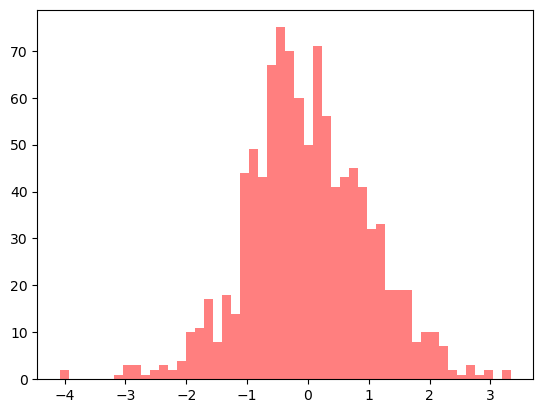

In [1048]:
#Linear regression-model 1 with Box-Cox transformation
trans_y_trainv=boxcox.fit_transform(y_trainv.values.reshape(-1, 1))
plt.hist(trans_y_trainv,color='red',alpha = 0.5,bins = 50)
plt.show()

In [1049]:
model_1=sm.OLS(trans_y_trainv,X_trainv).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     69.07
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:33:23   Log-Likelihood:                 39.667
No. Observations:                1022   AIC:                             334.7
Df Residuals:                     815   BIC:                             1355.
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0321     14.767     -0.002      0.998     -29.018      28.954
LotFrontage               0.0002      0.000      0.660      0.509      -0.000       0.001
LotArea                4.766e-06   1.46e-06      3.261      0.001     1.9e-06    7.64e-06
OverallQual               0.1081      0.014      7.514      0.000       0.080       0.136
OverallCond               0.0892      0.012      7.447      0.000       0.066       0.113
YearBuilt                 0.0031      0.001      2.601      0.009       0.001       0.005
YearRemodAdd              0.0021      0.001      2.587      0.010       0.000       0.004
MasVnrArea             5.976e-05   7.83e-05      0.763      0.446   -9.39e-05       0.000
BsmtFinSF1                0.0001   3.65e-05      2.844      0.005    3.22e-05       0.000
BsmtFinSF2                0.0001   6.83e-05      1.772      0.077    -1.3e-05       0.000
BsmtUnfSF             -3.518e-05   3.26e-05     -1.080      0.281   -9.91e-05    2.88e-05
TotalBsmtSF               0.0002   4.75e-05      3.997      0.000    9.65e-05       0.000
1stFlrSF                  0.0001   8.58e-05      1.544      0.123   -3.59e-05       0.000
2ndFlrSF               9.517e-05   7.96e-05      1.196      0.232    -6.1e-05       0.000
LowQualFinSF              0.0001      0.000      0.534      0.593      -0.000       0.000
GrLivArea                 0.0003   8.11e-05      4.104      0.000       0.000       0.000
BsmtFullBath              0.0590      0.028      2.083      0.038       0.003       0.115
BsmtHalfBath             -0.0160      0.043     -0.367      0.713      -0.101       0.069
FullBath                  0.0364      0.031      1.173      0.241      -0.024       0.097
HalfBath                  0.0680      0.030      2.284      0.023       0.010       0.126
BedroomAbvGr              0.0146      0.019      0.758      0.449      -0.023       0.053
KitchenAbvGr             -0.0888      0.095     -0.936      0.350      -0.275       0.098
TotRmsAbvGrd              0.0336      0.013      2.550      0.011       0.008       0.059
Fireplaces                0.0359      0.032      1.128      0.260      -0.027       0.098
GarageYrBlt           -1.009e-05      0.001     -0.012      0.990      -0.002       0.002
GarageCars                0.0217      0.032      0.684      0.494      -0.041       0.084
GarageArea                0.0004      0.000      4.185      0.000       0.000       0.001
WoodDeckSF                0.0002   7.95e-05      2.815      0.005    6.78e-05       0.000
OpenPorchSF               0.0003      0.000      1.755      0.080   -3.28e-05       0.001
EnclosedPorch             0.0002      0.000      0.887      0.375      -0.000       0.000
3SsnPorch                 0.0004      0.000      1.387      0.166      -0.000       0.001
ScreenPorch            

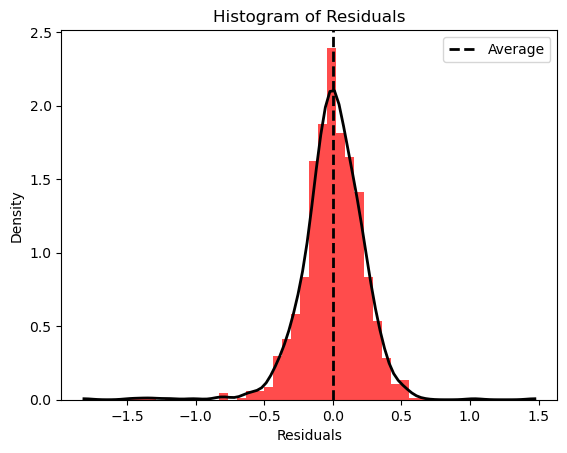

In [1050]:
# Histogram of residuals- model 1 with Box-Cox transformation
hist_residuals(model_1)

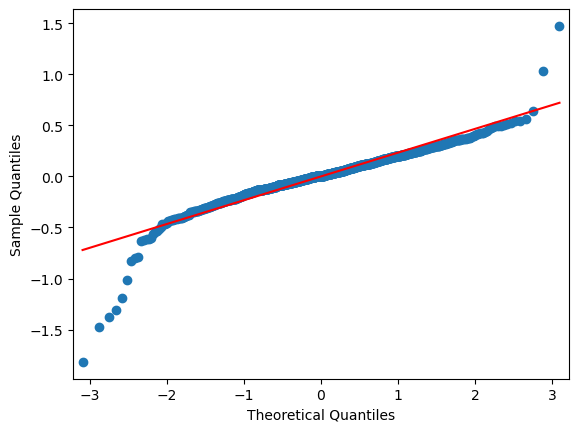

In [1051]:
# QQ-plot- model 1 with Box-Cox transformation
sm.qqplot(model_1.resid,line='s')
plt.show()

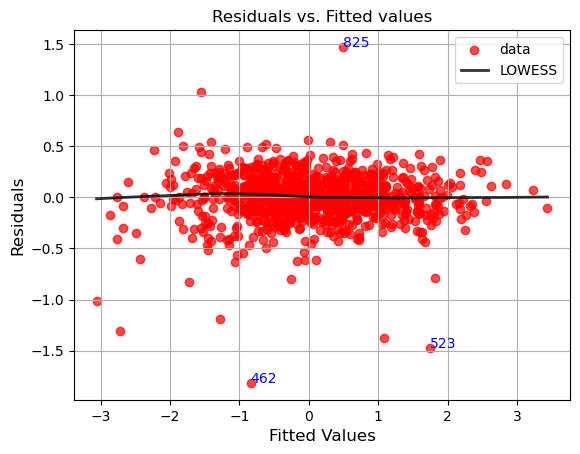

In [1052]:
# Scatter plot of residuals vs. fitted values- model 1 with Box-Cox transformation
residuals_fittedvalues_plot(model_1)

In [1053]:
# trainv.loc[[462,632,523], :]

In [1054]:
# Check Cook's ditance- model 1 with Box-Cox transformation
# influencer_detector(model_1)

In [1055]:
# X_trainv.loc[[ 22,   65,   83,   91,  761,  819,  897, 1059, 1118], :]

In [1056]:
# Note: Remove observations 
 # X_train.drop(index =[1322,816,970], inplace = True)
 # y_train.drop(index =[591,816,970], inplace = True)
# trans_y_train=PowerTransformer(method='box-cox').fit_transform(y_train.values.reshape(-1, 1))

In [1057]:
model_1 = sm.OLS(trans_y_trainv,X_trainv).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     69.07
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:33:25   Log-Likelihood:                 39.667
No. Observations:                1022   AIC:                             334.7
Df Residuals:                     815   BIC:                             1355.
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0321     14.767     -0.002      0.998     -29.018      28.954
LotFrontage               0.0002      0.000      0.660      0.509      -0.000       0.001
LotArea                4.766e-06   1.46e-06      3.261      0.001     1.9e-06    7.64e-06
OverallQual               0.1081      0.014      7.514      0.000       0.080       0.136
OverallCond               0.0892      0.012      7.447      0.000       0.066       0.113
YearBuilt                 0.0031      0.001      2.601      0.009       0.001       0.005
YearRemodAdd              0.0021      0.001      2.587      0.010       0.000       0.004
MasVnrArea             5.976e-05   7.83e-05      0.763      0.446   -9.39e-05       0.000
BsmtFinSF1                0.0001   3.65e-05      2.844      0.005    3.22e-05       0.000
BsmtFinSF2                0.0001   6.83e-05      1.772      0.077    -1.3e-05       0.000
BsmtUnfSF             -3.518e-05   3.26e-05     -1.080      0.281   -9.91e-05    2.88e-05
TotalBsmtSF               0.0002   4.75e-05      3.997      0.000    9.65e-05       0.000
1stFlrSF                  0.0001   8.58e-05      1.544      0.123   -3.59e-05       0.000
2ndFlrSF               9.517e-05   7.96e-05      1.196      0.232    -6.1e-05       0.000
LowQualFinSF              0.0001      0.000      0.534      0.593      -0.000       0.000
GrLivArea                 0.0003   8.11e-05      4.104      0.000       0.000       0.000
BsmtFullBath              0.0590      0.028      2.083      0.038       0.003       0.115
BsmtHalfBath             -0.0160      0.043     -0.367      0.713      -0.101       0.069
FullBath                  0.0364      0.031      1.173      0.241      -0.024       0.097
HalfBath                  0.0680      0.030      2.284      0.023       0.010       0.126
BedroomAbvGr              0.0146      0.019      0.758      0.449      -0.023       0.053
KitchenAbvGr             -0.0888      0.095     -0.936      0.350      -0.275       0.098
TotRmsAbvGrd              0.0336      0.013      2.550      0.011       0.008       0.059
Fireplaces                0.0359      0.032      1.128      0.260      -0.027       0.098
GarageYrBlt           -1.009e-05      0.001     -0.012      0.990      -0.002       0.002
GarageCars                0.0217      0.032      0.684      0.494      -0.041       0.084
GarageArea                0.0004      0.000      4.185      0.000       0.000       0.001
WoodDeckSF                0.0002   7.95e-05      2.815      0.005    6.78e-05       0.000
OpenPorchSF               0.0003      0.000      1.755      0.080   -3.28e-05       0.001
EnclosedPorch             0.0002      0.000      0.887      0.375      -0.000       0.000
3SsnPorch                 0.0004      0.000      1.387      0.166      -0.000       0.001
ScreenPorch            

In [1058]:
# Get the p-values from the model
pvalues=model_1.pvalues

# Define the significance level (alpha)
alpha=0.05

# Identify columns with p-value greater than alpha
non_significant_columns=pvalues[pvalues>alpha].index
print("Non-significant columns to drop:",non_significant_columns)
# Drop non-significant columns from the original X_trainv DataFrame
X_trainv_significant=X_trainv.drop(columns=non_significant_columns)

# Refit the model with the remaining significant columns
model_1_significant=sm.OLS(trans_y_trainv, X_trainv_significant).fit()

# Summary of the new model
print(model_1_significant.summary())
# Start with the original X_trainv
X_trainv_current=X_trainv.copy()

while True:
    model = sm.OLS(trans_y_trainv, X_trainv_current).fit()
    pvalues = model.pvalues

    # Check if all p-values are below the significance level
    if pvalues.max()>alpha:
        # Drop the column with the highest p-value
        non_significant_column = pvalues.idxmax()
        print(f"Dropping non-significant column: {non_significant_column} with p-value: {pvalues.max()}")
        X_trainv_current = X_trainv_current.drop(columns=[non_significant_column])
    else:
        break

Non-significant columns to drop: Index(['const', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=165)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              229.2
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                        0.00
Time:                        22:33:25   Log-Likelihood:                         -178.31
No. Observations:   

In [1059]:
 # X_train.drop(index=[1322,816,970],inplace = True)
y_trainv_current=y_trainv.drop(columns=[non_significant_column])
# X_trainv_current=X_trainv_current.drop(columns=[non_significant_column])

In [1060]:
y_trainv_current.shape

(1022,)

In [1061]:
X_trainv.shape

(1022, 212)

In [1062]:
X_trainv_current.shape

(1022, 60)

In [1063]:
X_trainv_current=sm.add_constant(X_trainv_current)

In [1064]:
trans_y_trainv_current=PowerTransformer(method='box-cox').fit_transform(y_trainv_current.values.reshape(-1, 1))

In [1065]:
#Linear regression - model 1 with Box-Cox transformation and significant columns (t_test)
model_final=sm.OLS(trans_y_trainv_current,X_trainv_current).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:33:31   Log-Likelihood:                -40.759
No. Observations:                1022   AIC:                             203.5
Df Residuals:                     961   BIC:                             504.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.48

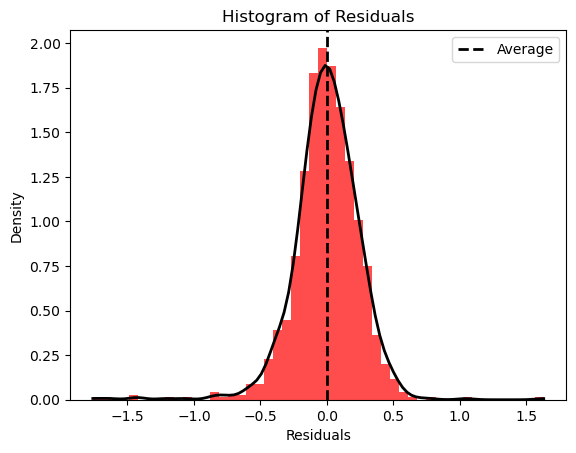

In [1066]:
# Histogram of residuals- mode_final
hist_residuals(model_final)

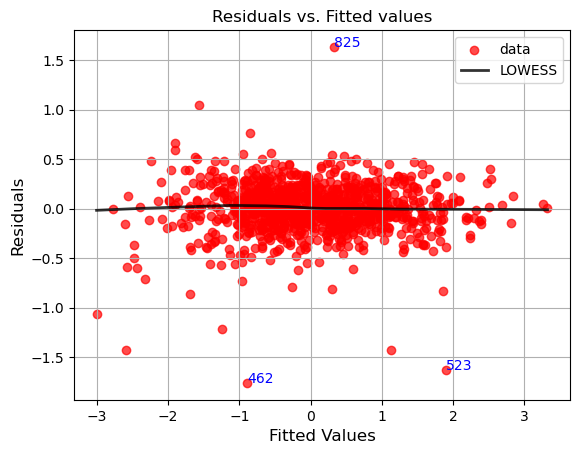

In [1067]:
#Scatter plot of residuals vs. fitted values- mode_final
residuals_fittedvalues_plot(model_final)

In [1068]:
# trainv.loc[[825,523,632], :]

In [1069]:
# #Check Cook's ditance- model_final
influencer_detector(model_final)

C:\Users\Taban\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


(array([114, 265, 416, 599, 829], dtype=int64),)

In [1070]:
# trainv.loc[[ 173, 185, 507, 995], :]

In [1071]:
# # Filter out variables with high VIF (>10)
# filtered = vif_df[vif_df['VIF'] > 10]
# # filtered_vif_df = vif_df[vif_df['VIF'] <= 10]
# print(filtered)
# # print(filtered_vif_df)

## Evaluation on the Validation Set (Classic Regression)

In [1072]:
testv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 605 to 622
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  438 non-null    int64 
 1   MSSubClass          438 non-null    object
 2   MSZoning            438 non-null    object
 3   LotFrontage         438 non-null    int64 
 4   LotArea             438 non-null    int64 
 5   Street              438 non-null    object
 6   Alley               438 non-null    object
 7   LotShape            438 non-null    object
 8   LandContour         438 non-null    object
 9   Utilities           438 non-null    object
 10  LotConfig           438 non-null    object
 11  LandSlope           438 non-null    object
 12  Neighborhood        438 non-null    object
 13  Condition1          438 non-null    object
 14  Condition2          438 non-null    object
 15  BldgType            438 non-null    object
 16  HouseStyle          438 non-

In [1073]:
 #Create dummy variables for categorical variables
dummy_vars_tev=pd.get_dummies(testv[['MSSubClass','MSZoning','Street','Alley','LandContour',
                                   'Utilities','LotConfig','Neighborhood','Condition1', 'Condition2',
                                   'BldgType','HouseStyle','RoofStyle','Heating','RoofMatl',
                                   'Exterior1st','Exterior2nd','MasVnrType','Foundation','CentralAir',
                                   'Electrical','GarageType','MiscFeature','SaleType','SaleCondition']])
                                   
# dummy_vars containing only 0 and 1                                 
dummy_vars_tev=dummy_vars_tev.astype(int)

# print(dummy_vars_tev.head(2))
dummy_vars_tev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 605 to 622
Columns: 158 entries, MSSubClass_120 to SaleCondition_Partial
dtypes: int32(158)
memory usage: 273.8 KB


In [1074]:
dummy_vars_trv.shape

(1022, 157)

In [1075]:
dummy_vars_tev.shape

(438, 158)

In [1076]:
# Define base level for each categorical variable Acco8rding to train data set
dummy_vars_tev.drop(columns=['MSSubClass_20','MSZoning_RL','Street_Pave','Alley_NA','LandContour_Lvl','Utilities_AllPub',
                           'LotConfig_Inside', 'Neighborhood_NAmes', 'Condition1_Norm','Condition2_Norm','BldgType_1Fam',
                           'HouseStyle_1Story','RoofStyle_Gable','RoofMatl_CompShg','Exterior1st_VinylSd','Exterior2nd_VinylSd',
                           'MasVnrType_none','Foundation_PConc','CentralAir_Y','Heating_GasA','Electrical_SBrkr',
                           'GarageType_Attchd','SaleType_WD','SaleCondition_Normal','MiscFeature_NA'], inplace = True)
dummy_vars_tev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 605 to 622
Columns: 133 entries, MSSubClass_120 to SaleCondition_Partial
dtypes: int32(133)
memory usage: 231.0 KB


In [1077]:
dummy_vars_tev=dummy_vars_tev.reindex(columns=dummy_vars_trv.columns,fill_value=0)

In [1078]:
print(dummy_vars_trv.shape)
print(trainv.shape)


print(dummy_vars_tev.shape)
print(testv.shape)
# print(testv.info)

(1022, 157)
(1022, 100)
(438, 157)
(438, 100)


In [1079]:
# Define feature matrix
# Train All columns except 'SalePrice'
X_X=testv.iloc[:,list(range(0,80))+list(range(81,100))]
# print(X_X.columns)
X_testv=pd.concat([X_X,dummy_vars_tev],axis = 1)
#add constant
# X_testv=sm.add_constant(X_testv) 
X_testv = sm.add_constant(X_testv,has_constant='add')
X_testv.shape
print(X_testv.columns)

Index(['const', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=257)


In [1080]:
# Remove coloumn'Id'
X_testv.drop(columns=['Id'],inplace=True)
X_testv.shape

(438, 256)

In [1081]:
X_testv=X_testv.drop(columns=X_testv.select_dtypes(include=['object']).columns)
# Check the data types of the cleaned DataFrame
print(X_testv.dtypes)
print(X_testv.shape)

const                    float64
LotFrontage                int64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_Abnorml      int32
SaleCondition_AdjLand      int32
SaleCondition_Alloca       int32
SaleCondition_Family       int32
SaleCondition_Partial      int32
Length: 212, dtype: object
(438, 212)


In [1082]:
# Convert float64 and int32 columns to int64
X_testv=X_testv.astype({col:'int64' for col in X_testv.select_dtypes(include=['float64','int32']).columns})

# Check the data types of the columns to verify the conversion
print(X_testv.dtypes)

const                    int64
LotFrontage              int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
                         ...  
SaleCondition_Abnorml    int64
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Partial    int64
Length: 212, dtype: object


In [1083]:
#Linear regression - model 1 with Box-Cox transformation and significant columns (t_test)
model_final=sm.OLS(trans_y_trainv_current,X_trainv_current).fit()
# print(model_final.summary())

In [1084]:
trans_y_trainv_current=PowerTransformer(method = 'box-cox').fit_transform(y_trainv_current.values.reshape(-1, 1))

In [1085]:
X_trainv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1017 to 815
Columns: 212 entries, const to SaleCondition_Partial
dtypes: int64(212)
memory usage: 1.7 MB


In [1086]:
X_testv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 605 to 622
Columns: 212 entries, const to SaleCondition_Partial
dtypes: int64(212)
memory usage: 728.9 KB


In [1087]:
trans_y_trainv_current.shape

(1022, 1)

In [1088]:
#Linear regression- model 1 with Box-Cox transformation and significant columns (t_test)
model_final=sm.OLS(trans_y_trainv_current,X_trainv_current).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:33:33   Log-Likelihood:                -40.759
No. Observations:                1022   AIC:                             203.5
Df Residuals:                     961   BIC:                             504.2
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.48

In [1089]:
X_trainv_current

const  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1017    1.0     5814            8            5       1984          1984   
405     1.0     9991            4            4       1976          1993   
6       1.0    10084            8            5       2004          2005   
388     1.0     9382            7            5       1999          2000   
501     1.0     9803            7            5       2005          2005   
...     ...      ...          ...          ...        ...           ...   
1228    1.0     8769            9            5       2008          2008   
1077    1.0    15870            5            5       1969          1969   
1318    1.0    14781            8            5       2001          2002   
723     1.0     8172            4            6       1954          1972   
815     1.0    12137            7            5       1998          1998   

      BsmtFinSF1  TotalBsmtSF  GrLivArea  BsmtFullBath  ...  \
1017        1036         1220       1360             1  ...   
405         1116         1281       1620             1  ...   
6           1369         1686       1694             1  ...   
388            0         1468       1479             0  ...   
501          400          866       1768             0  ...   
...          ...          ...        ...           ...  ...   
1228        1540         1702       1702             1  ...   
1077          75         1096       1096             1  ...   
1318           0         1753       1787             0  ...   
723            0          941       1470             0  ...   
815            0         1649       1661             0  ...   

      Exterior1st_HdBoard  Exterior2nd_BrkFace  Foundation_BrkTil  \
1017                    1                    0                  0   
405                     0                    0                  0   
6                       0                    0                  0   
388                     0                    0                  0   
501                     0                    0                  0   
...                   ...                  ...                ...   
1228                    0                    0                  0   
1077                    0                    0                  0   
1318                    0                    0                  0   
723                     0                    0                  0   
815                     0                    0                  0   

      Foundation_CBlock  Foundation_Slab  CentralAir_N  MiscFeature_TenC  \
1017                  1                0             0                 0   
405                   1                0             0                 0   
6                     0                0             0                 0   
388                   0                0             0                 0   
501                   0                0             0                 0   
...                 ...              ...           ...               ...   
1228                  0                0             0                 0   
1077                  1                0             0                 0   
1318                  0                0             0                 0   
723                   0                0             0                 0   
815                   0                0             0                 0   

      SaleType_ConLD  SaleCondition_Abnorml  SaleCondition_Partial  
1017               0                      1                      0  
405                0                      0                      0  
6                  0                      0                      0  
388                0                      0                      0  
501                0                      0                      0  
...              ...                    ...                    ...  
1228               0                      0                      1  
1077               0                      1           

In [1090]:
 X_testv.shape

(438, 212)

In [1091]:
# Ensure X_testv only contains the significant columns
X_testv_significant=X_testv[X_trainv_current.columns]

# Predict using the final model
testv_pred=model_final.predict(X_testv_significant)

# Output the predictions
print(testv_pred)

605     0.369858
642     1.810056
993     0.159041
736    -1.895730
1239    0.768088
          ...   
805     0.427172
112     1.882165
348     0.193731
205    -0.000803
622    -0.586256
Length: 438, dtype: float64


In [1092]:
# X_testv_significant

In [1093]:
# X_testv_current=X_testv.drop(columns=[non_significant_column])

In [1094]:
# X_testv_current.info()

In [1095]:
# Predict using the final model
testv_pred=model_final.predict(X_testv_significant)

# Output the predictions
print(testv_pred)

605     0.369858
642     1.810056
993     0.159041
736    -1.895730
1239    0.768088
          ...   
805     0.427172
112     1.882165
348     0.193731
205    -0.000803
622    -0.586256
Length: 438, dtype: float64


In [1096]:
# Inverse transformation of predicted values (Linear Model)
testv['pred_lm']=pd.Series(boxcox.inverse_transform(testv_pred.values.reshape(-1, 1)).reshape(-1), 
                         index = testv_pred.index)
testv['pred_lm']

605     192167.948934
642     358727.495110
993     176337.599023
736      81070.141268
1239    226860.671459
            ...      
805     196755.954753
112     370798.570874
348     178834.246434
205     165349.142918
622     131410.946240
Name: pred_lm, Length: 438, dtype: float64

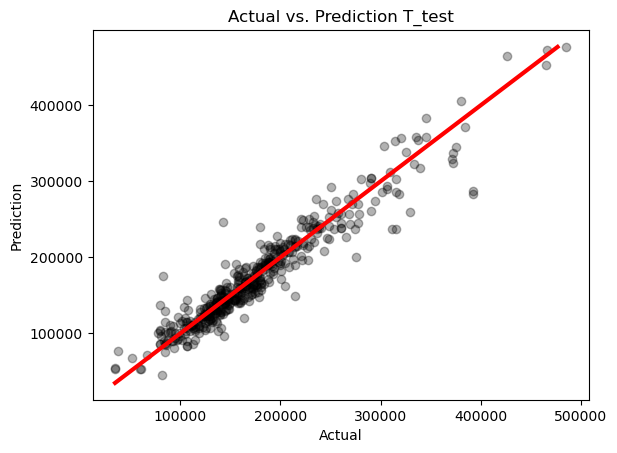

In [1097]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y = testv['pred_lm'], 
            c='black',alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction T_test')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),testv['pred_lm'].max(),100)
plt.plot(xp,xp,c ='red',linewidth = 3)
plt.show()

In [1098]:
from scipy.stats import iqr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Absolute error
abs_err_lm=abs(testv['SalePrice']-testv['pred_lm'])

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae=mean_absolute_error(testv['SalePrice'],testv['pred_lm'])
mse=mean_squared_error(testv['SalePrice'],testv['pred_lm'])
rmse=np.sqrt(mse)

# Display the models comparison DataFrame
models_comp=pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_lm.mean(),
                            'MSE' :                   mse,
                            'RMSE' :                  rmse,
                            'Median of AbsErrors' : abs_err_lm.median(),
                            'SD of AbsErrors' :     abs_err_lm.std(),
                            'IQR of AbsErrors':     iqr(abs_err_lm),
                            'Min of AbsErrors':     abs_err_lm.min(),
                            'Max of AbsErrors':     abs_err_lm.max()}, 
                           index = ['LM_t-Test'])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test            14263.503558  4.293243e+08  20720.142797   

           Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test         10553.322434     15046.383761      13948.086048   

           Min of AbsErrors  Max of AbsErrors  
LM_t-Test          1.348099     109868.587072

## Forward Selection

In [1099]:
# Define function to fit linear regression
def fit_lm(feature_set,y,X):
    reg_model=sm.OLS(y, X[['const']+list(feature_set)]).fit()
    return{'model':reg_model, 
            'r2':reg_model.rsquared,
            'adj_r2':reg_model.rsquared_adj,
            'aic':reg_model.aic,
            'bic':reg_model.bic}

In [1100]:
# Define function to do forward selection
def fwd_selection(features, y, X):
    res = []
    # Pull out features still needed to process
    remaining_features = [ _ for _  in X.iloc[:, 1:].columns if _ not in features]
          
    # Fit linear model and save the results
    for f in remaining_features:
        res.append(fit_lm(features+[f], y, X))
   
    models=pd.DataFrame(res)
    
    # Choose the model with the highest R squared
    best_model=models.iloc[models['r2'].argmax()] 
    
    # Return the best model
    return best_model

In [1101]:
X_trainv.shape

(1022, 212)

In [1102]:
len(trans_y_trainv)

1022

In [1103]:
#Forward selection implementation
import time #to measure the processing time
fwd_models=pd.DataFrame(columns=['model','r2','adj_r2','aic','bic'])
start_time=time.time()
features=[]
for i in range(1,len(X_trainv.iloc[:, 1:].columns)+1):
    fwd_models.loc[i]=fwd_selection(features,trans_y_trainv,X_trainv)
    features=fwd_models.loc[i,'model'].model.exog_names[1:]
end_time=time.time()
print('The Processing time is: ',end_time-start_time,'seconds')

The Processing time is:  315.2712743282318 seconds


### Evaluation on the Validation Set (Forward selection)

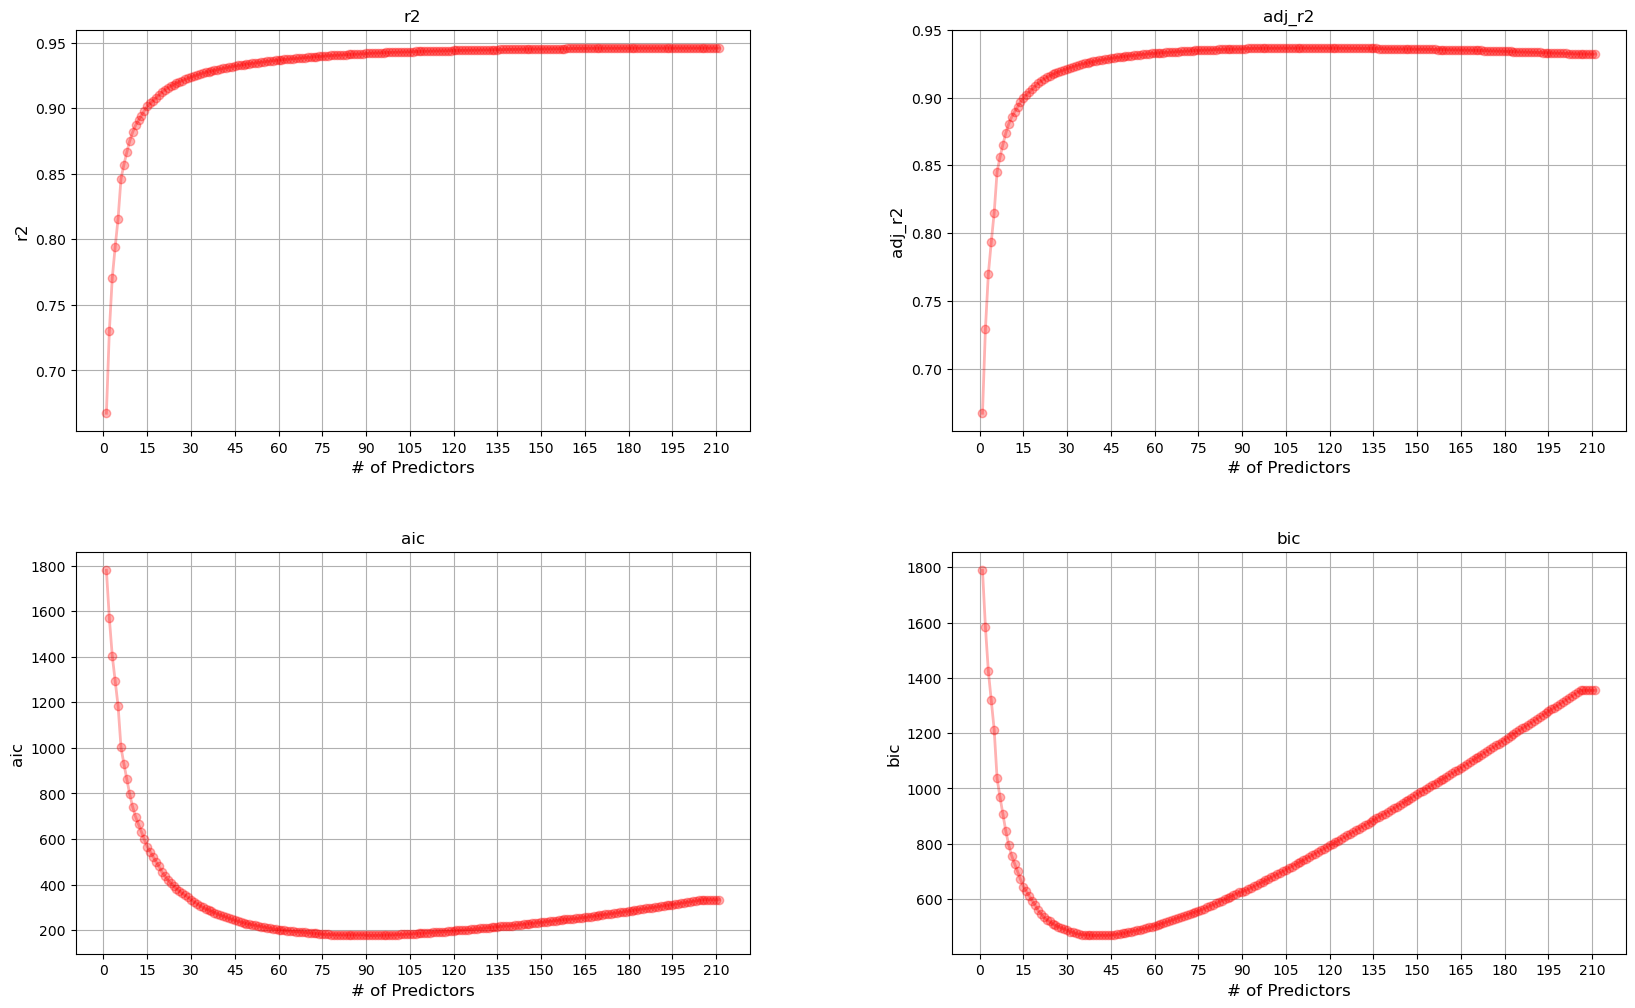

In [1104]:
#Models evaluation
plt.figure(figsize = (20,12))
plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.plot(fwd_models.iloc[:, i],'r-o',alpha=0.3,linewidth=2,)
    plt.title(fwd_models.columns[i])
    plt.xlabel('# of Predictors',fontsize=12)
    plt.xticks(range(0,214,15))
    plt.ylabel(fwd_models.columns[i],fontsize=12)
    plt.grid(True)
# Show the plot
plt.show()

In [1105]:
#Liner model with 105 Variables (based on r2 and observing other 3 plots )
fwd_models.loc[105,'model'].params

const                  -14.873968
OverallQual              0.119426
GrLivArea                0.000454
YearBuilt                0.003595
OverallCond              0.085502
                          ...    
Neighborhood_OldTown    -0.062657
Neighborhood_Timber      0.062409
SaleCondition_Alloca    -0.116266
Neighborhood_SawyerW     0.049366
Exterior2nd_AsbShng     -0.079085
Length: 106, dtype: float64

In [1106]:
#Selected features 
fwd_models.loc[105,'model'].model.exog_names

['const',
 'OverallQual',
 'GrLivArea',
 'YearBuilt',
 'OverallCond',
 'RoofMatl_ClyTile',
 'TotalBsmtSF',
 'Fireplaces',
 'GarageArea',
 'Condition2_PosN',
 'BsmtUnfSF',
 'MSSubClass_160',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'YearRemodAdd',
 'cnvrt_Functional',
 'Neighborhood_Crawfor',
 'Exterior1st_BrkComm',
 'Neighborhood_ClearCr',
 'MSSubClass_30',
 'cnvrt_HeatingQC',
 'KitchenAbvGr',
 'SaleCondition_Partial',
 'Neighborhood_MeadowV',
 'ScreenPorch',
 'WoodDeckSF',
 'Exterior1st_BrkFace',
 'SaleType_ConLD',
 'Condition1_Artery',
 'CentralAir_N',
 'Neighborhood_NridgHt',
 'cnvrt_BsmtExposure',
 'MSZoning_FV',
 'Neighborhood_StoneBr',
 'LotArea',
 'SaleCondition_Abnorml',
 'Street_Grvl',
 'Exterior2nd_BrkFace',
 'Heating_Wall',
 'cnvrt_BsmtQual',
 'BsmtFullBath',
 'Foundation_Stone',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Condition1_RRAe',
 'Exterior1st_MetalSd',
 'cnvrt_KitchenQual',
 'Condition1_Feedr',
 'Alley_Grvl',
 'MiscFeature_TenC',
 'TotRmsAbvGrd',
 'Neighborhood_Veenker

In [1107]:
#Predict on test- model 2
pred_fwd=fwd_models.loc[105, 'model'].predict(X_testv[fwd_models.loc[105,'model'].model.exog_names])
pred_fwd=pd.Series(boxcox.inverse_transform(pred_fwd.values.reshape(-1, 1)).reshape(-1),index=testv.index)
# pred_fwd

In [1108]:
len(pred_fwd)

438

In [1109]:
len(testv['SalePrice'])

438

In [1110]:
#Absolute error
abs_err_fwd=abs(testv['SalePrice']-pred_fwd)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_fwd =mean_absolute_error(testv['SalePrice'], pred_fwd)
mse_fwd=mean_squared_error(testv['SalePrice'], pred_fwd)
rmse_fwd=np.sqrt(mse_fwd)

#Absolute error mean, median, sd, IQR, max, min
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_fwd.mean(),
                            'MSE' :                   mse_fwd,
                            'RMSE' :                 rmse_fwd,
                            'Median of AbsErrors' : abs_err_fwd.median(),
                            'SD of AbsErrors' :     abs_err_fwd.std(),
                            'IQR of AbsErrors':     iqr(abs_err_fwd),
                            'Min of AbsErrors':     abs_err_fwd.min(),
                            'Max of AbsErrors':     abs_err_fwd.max()}, 
                            index = ['LM_FWD'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test            14263.503558  4.293243e+08  20720.142797   
LM_FWD               14448.051321  4.367638e+08  20898.894986   

           Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test         10553.322434     15046.383761      13948.086048   
LM_FWD            10006.922094     15117.519774      15270.043120   

           Min of AbsErrors  Max of AbsErrors  
LM_t-Test          1.348099     109868.587072  
LM_FWD            11.994278     106794.012006

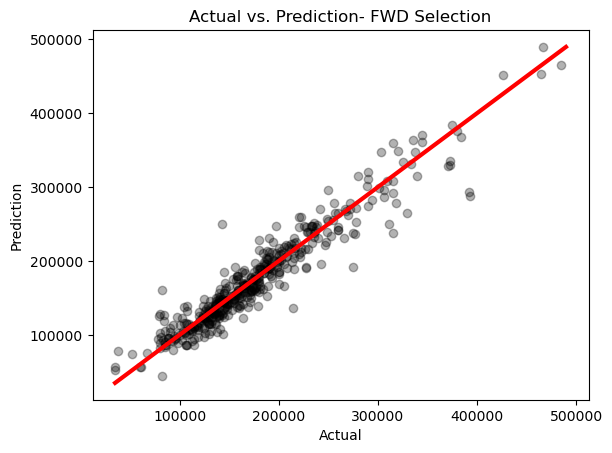

In [1111]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y = pred_fwd, 
            c='black',alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- FWD Selection')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_fwd.max(),100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

## Backward Elimination

In [1112]:
import itertools

#Define function to do backward elimination
def bwd_elimination(features,y,X):
    res = []
    
    #Fit linear model and save the results
    for f in itertools.combinations(features,len(features)-1):
        res.append(fit_lm(f,y,X))
    
    models=pd.DataFrame(res)
    
    #Choose the model with the highest R squared
    best_model=models.iloc[models['r2'].argmax()] 
          
    #Return the best model
    return best_model

In [1113]:
X_trainv.shape

(1022, 212)

In [1114]:
#Backward elimination implementation
bwd_models=pd.DataFrame(columns=['model','r2','adj_r2','aic','bic'])
start_time=time.time()
features=X_trainv.columns
while(len(features)>1):  
    bwd_models.loc[len(features)-1]=bwd_elimination(features,trans_y_trainv,X_trainv)
    features=bwd_models.loc[len(features)-1]['model'].model.exog_names[1:]
end_time=time.time()
print('The Processing time is: ',end_time-start_time,'seconds')

The Processing time is:  661.1729784011841 seconds


In [1115]:
bwd_models

model        r2    adj_r2  \
211  <statsmodels.regression.linear_model.Regressio...  0.945823   0.93213   
210  <statsmodels.regression.linear_model.Regressio...  0.945823   0.93213   
209  <statsmodels.regression.linear_model.Regressio...  0.945823   0.93213   
208  <statsmodels.regression.linear_model.Regressio...  0.945823   0.93213   
207  <statsmodels.regression.linear_model.Regressio...  0.945823   0.93213   
..                                                 ...       ...       ...   
5    <statsmodels.regression.linear_model.Regressio...  0.809312  0.808373   
4    <statsmodels.regression.linear_model.Regressio...  0.780783   0.77992   
3    <statsmodels.regression.linear_model.Regressio...  0.747674   0.74693   
2    <statsmodels.regression.linear_model.Regressio...    0.7174  0.716845   
1    <statsmodels.regression.linear_model.Regressio...  0.667358  0.667032   

             aic          bic  
211   334.665265  1355.075237  
210   334.665265  1355.075237  
209   334.665265  1355.075237  
208   334.665265  1355.075237  
207   334.665265  1355.075237  
..           ...          ...  
5     1218.73921  1248.316311  
4    1359.229428  1383.877012  
3    1500.983547  1520.701615  
2    1614.786256  1629.574806  
1    1779.407768  1789.266801  

[211 rows x 5 columns]

## Evaluation on the Validation Set (Backward Elimination)

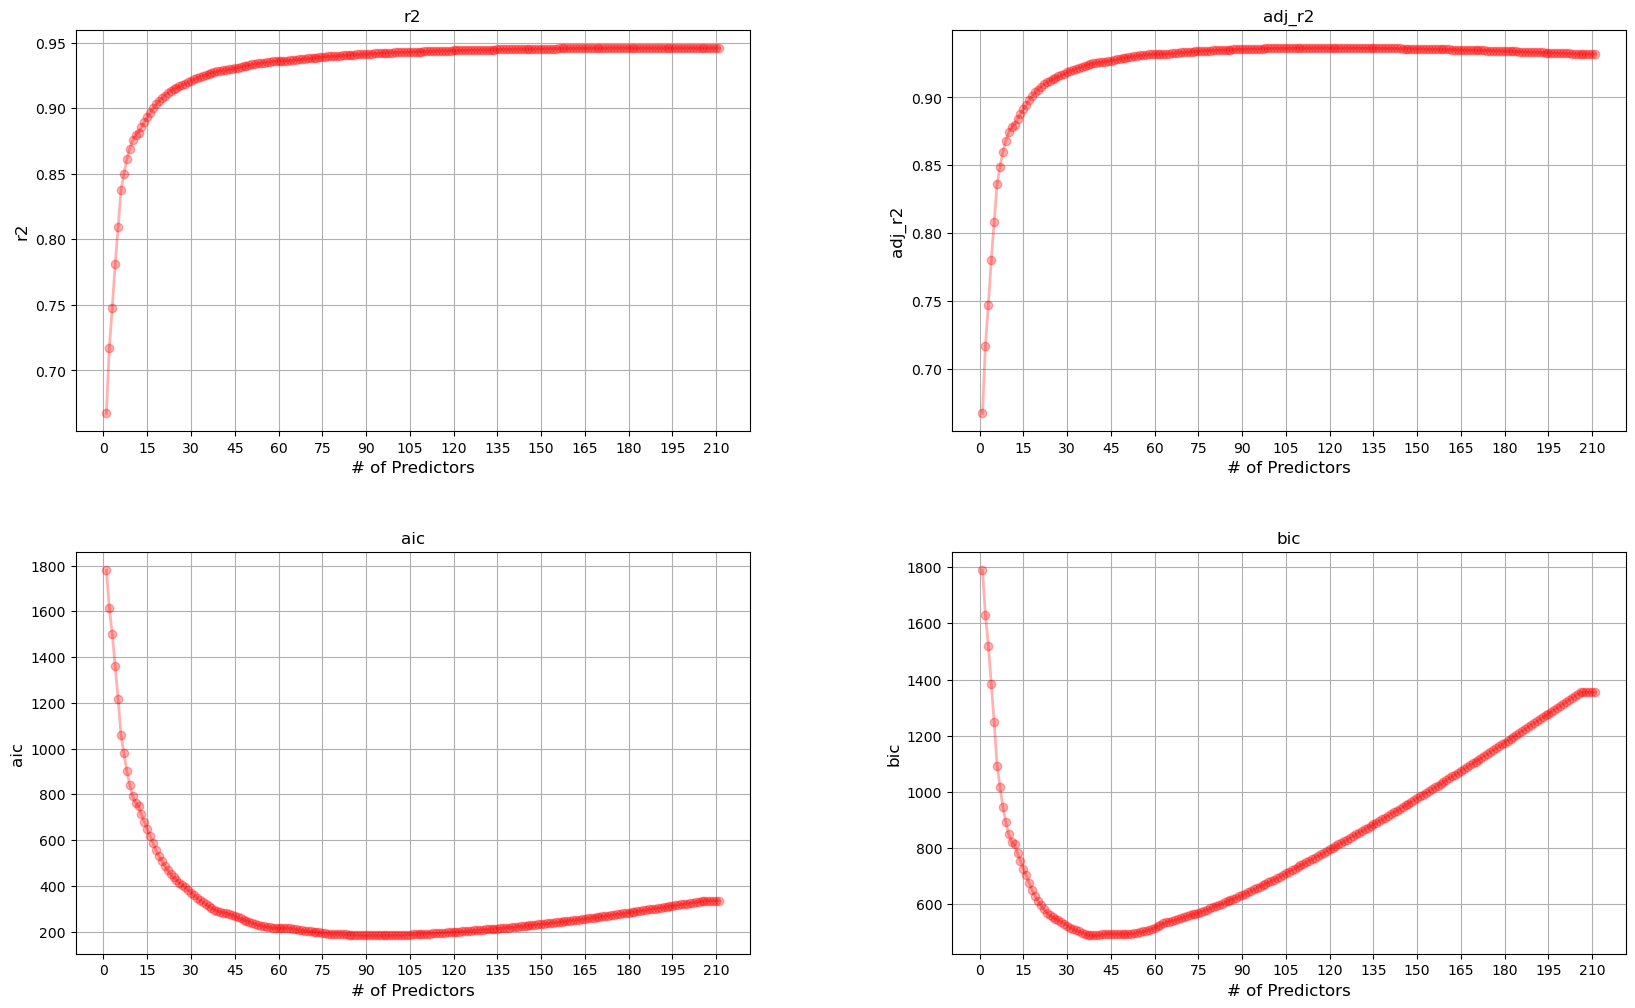

In [1116]:
#Models evaluation
plt.figure(figsize = (20,12))
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.plot(bwd_models.iloc[:, i], 'r-o', alpha = 0.3, linewidth=2)
    plt.title(bwd_models.columns[i])
    plt.xlabel('# of Predictors', fontsize=12)
    plt.xticks(range(0, 214,15))
    plt.ylabel(bwd_models.columns[i],fontsize=12)
    plt.grid(True)
# Show the plot
plt.show()

In [1117]:
#Liner model with 120 Variables (based on r2)
bwd_models.loc[120,'model'].params

const                   -13.818466
LotArea                   0.000005
OverallQual               0.117600
OverallCond               0.087608
YearBuilt                 0.002715
                           ...    
SaleType_ConLI           -0.239721
SaleCondition_Abnorml    -0.071215
SaleCondition_Alloca     -0.147320
SaleCondition_Family     -0.130016
SaleCondition_Partial     0.096610
Length: 121, dtype: float64

In [1118]:
#Selected features 
bwd_models.loc[120,'model'].model.exog_names

['const',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 '3SsnPorch',
 'ScreenPorch',
 'cnvrt_ExterCond',
 'cnvrt_BsmtCond',
 'cnvrt_BsmtExposure',
 'cnvrt_BsmtFinType1',
 'cnvrt_BsmtFinType2',
 'cnvrt_HeatingQC',
 'cnvrt_KitchenQual',
 'cnvrt_Functional',
 'cnvrt_FireplaceQu',
 'cnvrt_GarageFinish',
 'cnvrt_GarageQual',
 'cnvrt_PavedDrive',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'Street_Grvl',
 'Alley_Grvl',
 'LandContour_Bnk',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighbor

In [1119]:
#Predict on test- model 3
pred_bwd=bwd_models.loc[120,'model'].predict(X_testv[bwd_models.loc[120,'model'].model.exog_names])
pred_bwd=pd.Series(boxcox.inverse_transform(pred_bwd.values.reshape(-1, 1)).reshape(-1), index = testv.index)
pred_bwd

605     195541.170154
642     380334.058708
993     173118.382864
736      73048.926007
1239    227191.471159
            ...      
805     194737.694005
112     364740.035920
348     181826.401494
205     180350.407169
622     127688.549965
Length: 438, dtype: float64

In [1120]:
#Absolute error
abs_err_bwd=abs(testv['SalePrice']-pred_bwd)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_bwd=mean_absolute_error(testv['SalePrice'],pred_bwd)
mse_bwd=mean_squared_error(testv['SalePrice'],pred_bwd)
rmse_bwd=np.sqrt(mse_bwd)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_bwd.mean(),
                            'MSE' :                   mse_bwd,
                            'RMSE' :                 rmse_bwd,
                            'Median of AbsErrors' : abs_err_bwd.median(),
                            'SD of AbsErrors' :     abs_err_bwd.std(),
                            'IQR of AbsErrors':     iqr(abs_err_bwd),
                            'Min of AbsErrors':     abs_err_bwd.min(),
                            'Max of AbsErrors':     abs_err_bwd.max()}, 
                            index = ['LM_BWD'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test            14263.503558  4.293243e+08  20720.142797   
LM_FWD               14448.051321  4.367638e+08  20898.894986   
LM_BWD               14537.233266  4.324169e+08  20794.637168   

           Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test         10553.322434     15046.383761      13948.086048   
LM_FWD            10006.922094     15117.519774      15270.043120   
LM_BWD            10646.353527     14885.956503      15473.349154   

           Min of AbsErrors  Max of AbsErrors  
LM_t-Test          1.348099     109868.587072  
LM_FWD            11.994278     106794.012006  
LM_BWD             0.764331     102916.641263

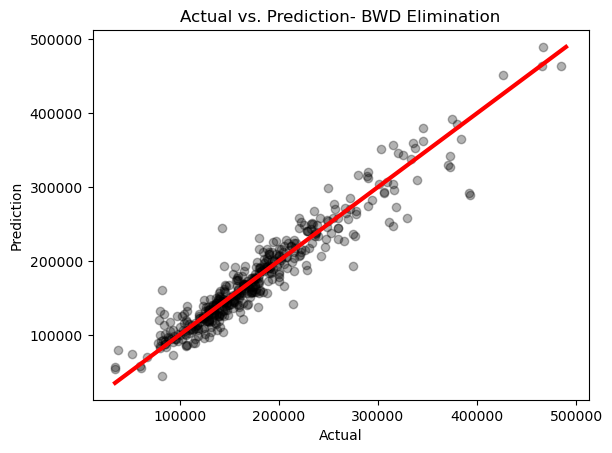

In [1121]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_bwd, 
            c='black', alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- BWD Elimination')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_bwd.max(), 100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

## Ridge Regression

In [1122]:
#Scale data before implementing Ridge regression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trainv_scaled=scaler.fit_transform(X_trainv)
X_trainv_scaled

array([[ 0.        , -1.63557295, -0.4985911 , ..., -0.08882312,
        -0.10430876, -0.29142013],
       [ 0.        , -1.63557295, -0.06602189, ..., -0.08882312,
        -0.10430876, -0.29142013],
       [ 0.        ,  0.48852977, -0.05639083, ..., -0.08882312,
        -0.10430876, -0.29142013],
       ...,
       [ 0.        , -1.63557295,  0.43002946, ..., -0.08882312,
        -0.10430876, -0.29142013],
       [ 0.        ,  0.06370923, -0.25439713, ..., -0.08882312,
        -0.10430876, -0.29142013],
       [ 0.        , -0.27614721,  0.1562174 , ..., -0.08882312,
        -0.10430876, -0.29142013]])

In [1123]:
#Implement Ridge regression - model 4
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.1) #lambda = 0.1 (regularization hyperparameter)
model_4=ridge_reg.fit(X_trainv_scaled,trans_y_trainv)

In [1124]:
model_4.coef_

array([[ 0.00000000e+00,  7.32238570e-03,  4.59805904e-02,
         1.51595078e-01,  1.00970791e-01,  9.41006219e-02,
         4.20683852e-02,  1.12900642e-02,  6.30239583e-02,
         2.49101488e-02, -2.82690322e-03,  7.27390975e-02,
         8.85069892e-02,  8.13985249e-02,  9.61708399e-03,
         1.31344081e-01,  3.01160408e-02, -3.73133192e-03,
         2.01734765e-02,  3.39859921e-02,  1.19729844e-02,
        -1.95249330e-02,  5.54813564e-02,  2.31497156e-02,
        -8.18392510e-03,  1.63402633e-02,  9.84372658e-02,
         2.88520567e-02,  1.88935673e-02,  9.54237203e-03,
         1.28618861e-02,  4.87257798e-02,  1.37644102e-02,
        -1.84125411e-02,  3.06519774e-03, -9.25902930e-03,
        -2.00906090e-03, -4.43173961e-04, -3.96198519e-03,
        -1.49985845e-02,  1.02980334e-02,  1.69025248e-02,
         3.51347110e-02,  2.69615589e-02, -2.16826042e-02,
         4.08420378e-02,  3.17978503e-02,  4.65217495e-02,
         3.60381170e-02,  1.55645586e-02,  5.58563620e-0

In [1125]:
# Grid
lambda_grid=10**np.linspace(3,-3,100)
lambda_grid

array([1.00000000e+03, 8.69749003e+02, 7.56463328e+02, 6.57933225e+02,
       5.72236766e+02, 4.97702356e+02, 4.32876128e+02, 3.76493581e+02,
       3.27454916e+02, 2.84803587e+02, 2.47707636e+02, 2.15443469e+02,
       1.87381742e+02, 1.62975083e+02, 1.41747416e+02, 1.23284674e+02,
       1.07226722e+02, 9.32603347e+01, 8.11130831e+01, 7.05480231e+01,
       6.13590727e+01, 5.33669923e+01, 4.64158883e+01, 4.03701726e+01,
       3.51119173e+01, 3.05385551e+01, 2.65608778e+01, 2.31012970e+01,
       2.00923300e+01, 1.74752840e+01, 1.51991108e+01, 1.32194115e+01,
       1.14975700e+01, 1.00000000e+01, 8.69749003e+00, 7.56463328e+00,
       6.57933225e+00, 5.72236766e+00, 4.97702356e+00, 4.32876128e+00,
       3.76493581e+00, 3.27454916e+00, 2.84803587e+00, 2.47707636e+00,
       2.15443469e+00, 1.87381742e+00, 1.62975083e+00, 1.41747416e+00,
       1.23284674e+00, 1.07226722e+00, 9.32603347e-01, 8.11130831e-01,
       7.05480231e-01, 6.13590727e-01, 5.33669923e-01, 4.64158883e-01,
      

In [1126]:
# K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors=np.zeros(shape=len(lambda_grid)) #to save cv results

for i in range(len(lambda_grid)):
    ridge_reg = Ridge(alpha = lambda_grid[i])
    scores=cross_val_score(estimator = ridge_reg, 
                             X=X_trainv_scaled, 
                             y=trans_y_trainv,
                             scoring='neg_root_mean_squared_error',
                             cv=5, n_jobs = -1)
    cv_errors[i]=scores.mean() 


cv_errors

array([-0.3667995 , -0.36287383, -0.35966796, -0.3571202 , -0.35517322,
       -0.35377342, -0.35287034, -0.35241614, -0.3523652 , -0.35267382,
       -0.35330005, -0.35420366, -0.35534616, -0.35669098, -0.35820364,
       -0.35985193, -0.36160613, -0.36343917, -0.36532667, -0.367247  ,
       -0.36918116, -0.37111269, -0.37302745, -0.37491341, -0.37676038,
       -0.37855986, -0.38030476, -0.38198928, -0.38360879, -0.38515968,
       -0.38663934, -0.38804604, -0.38937888, -0.39063774, -0.39182318,
       -0.39293635, -0.39397895, -0.39495312, -0.39586141, -0.39670669,
       -0.39749214, -0.39822121, -0.39889761, -0.39952528, -0.4001084 ,
       -0.40065137, -0.4011588 , -0.40163547, -0.40208633, -0.40251647,
       -0.40293103, -0.40333519, -0.40373406, -0.40413264, -0.40453561,
       -0.4049473 , -0.40537147, -0.40581116, -0.40626855, -0.40674481,
       -0.40724001, -0.40775305, -0.4082817 , -0.4088227 , -0.40937189,
       -0.40992448, -0.4104753 , -0.41101907, -0.41155066, -0.41

In [1127]:
# Best lambda
best_lamda=lambda_grid[np.argmax(cv_errors)]
best_lamda

327.45491628777285

In [1128]:
# Best model coefs:
ridge_reg=Ridge(alpha = best_lamda)
model_4=ridge_reg.fit(X_trainv_scaled, trans_y_trainv)
model_4.coef_

array([[ 0.        ,  0.00174329,  0.02568706,  0.10723167,  0.06223939,
         0.03592919,  0.0495579 ,  0.02023223,  0.038852  ,  0.01175145,
         0.00484678,  0.04993221,  0.06833731,  0.03998357,  0.00954872,
         0.0831437 ,  0.03061545, -0.00345734,  0.04561003,  0.03384147,
         0.0229963 , -0.0132366 ,  0.06133767,  0.03756153, -0.00105271,
         0.04989307,  0.05565956,  0.02588079,  0.01931915,  0.00189787,
         0.01014623,  0.035487  , -0.01376503,  0.00094134,  0.00343951,
        -0.00562802, -0.01015032, -0.00245177,  0.03103153, -0.00080777,
         0.04147529,  0.01530245,  0.03642117,  0.03926574, -0.00493459,
         0.03775288,  0.04794026,  0.0346697 ,  0.04527004,  0.02233548,
         0.01348109,  0.00288914,  0.01827462,  0.01904978, -0.0042031 ,
        -0.01298441, -0.02357889, -0.01107988, -0.00149405, -0.05121887,
         0.00751329, -0.01358006,  0.0079985 ,  0.00330132,  0.01579974,
         0.00288616, -0.00126987, -0.00154423, -0.0

## Evaluation on the Validation Set (Ridge Regression)

In [1129]:
# Predict on test- model 4
# Sacle test data set
X_testv_scaled=scaler.transform(X_testv)
pred_ridge=model_4.predict(X_testv_scaled)
pred_ridge=pd.Series(boxcox.inverse_transform(pred_ridge).reshape(-1),index = testv.index)
pred_ridge

605     190934.096532
642     323658.838084
993     174622.099050
736      83348.271981
1239    232559.760090
            ...      
805     200111.622486
112     359067.620016
348     179258.119853
205     166495.189843
622     127874.772532
Length: 438, dtype: float64

In [1130]:
# Absolute error
abs_err_ridge=abs(testv['SalePrice']-pred_ridge)


# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_ridge =mean_absolute_error(testv['SalePrice'], pred_ridge)
mse_ridge=mean_squared_error(testv['SalePrice'], pred_ridge)
rmse_ridge=np.sqrt(mse_bwd)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_ridge.mean(),
                            'MSE' :                   mse_ridge,
                            'RMSE' :                   rmse_ridge,
                            'Median of AbsErrors' :   abs_err_ridge.median(),
                            'SD of AbsErrors' :       abs_err_ridge.std(),
                            'IQR of AbsErrors':       iqr(abs_err_ridge),
                            'Min of AbsErrors':       abs_err_ridge.min(),
                            'Max of AbsErrors':       abs_err_ridge.max()}, 
                            index = ['LM_Ridge'])])
models_comp


Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test            14263.503558  4.293243e+08  20720.142797   
LM_FWD               14448.051321  4.367638e+08  20898.894986   
LM_BWD               14537.233266  4.324169e+08  20794.637168   
LM_Ridge             14919.438525  4.566752e+08  20794.637168   

           Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test         10553.322434     15046.383761      13948.086048   
LM_FWD            10006.922094     15117.519774      15270.043120   
LM_BWD            10646.353527     14885.956503      15473.349154   
LM_Ridge          10644.006449     15317.349954      13898.224409   

           Min of AbsErrors  Max of AbsErrors  
LM_t-Test          1.348099     109868.587072  
LM_FWD            11.994278     106794.012006  
LM_BWD             0.764331     102916.641263  
LM_Ridge           5.232922     123049.521981

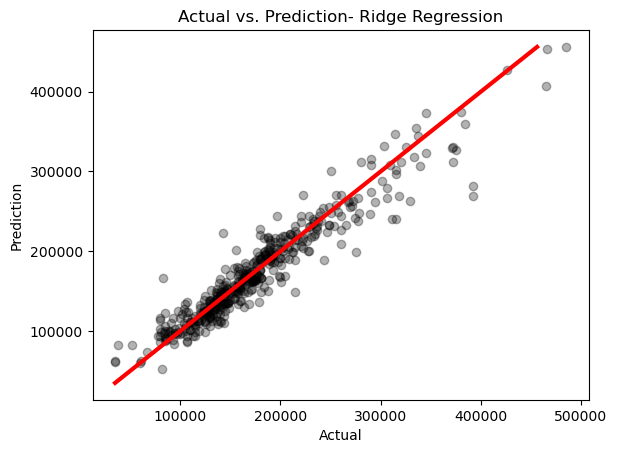

In [1131]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_ridge, 
            c='black',alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- Ridge Regression')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_ridge.max(),100)
plt.plot(xp,xp,c='red', linewidth=3)
plt.show()

## LASSO Regression

In [1132]:
#Implement LASSO regression- model 5
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha = 0.1) #lambda = 0.1 (regularization hyperparameter)
model_5=lasso_reg.fit(X_trainv_scaled, trans_y_trainv)

In [1133]:
model_5.coef_

array([ 0.        ,  0.        ,  0.        ,  0.30574096,  0.        ,
        0.01799305,  0.05325   ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.02711858,  0.02397547,  0.        , -0.        ,
        0.21689996,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01545009,  0.        ,
        0.09687159,  0.01267609,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.03956782,  0.        ,  0.00184169,  0.04400497,  0.        ,
        0.00092407,  0.06388295,  0.        ,  0.04340723,  0.03603645,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.00744165,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.  

In [1134]:
# K-fold cross validation to choose the best model
cv_errors=np.zeros(shape=len(lambda_grid)) #to save cv results

for i in range(len(lambda_grid)):
    lasso_reg=Lasso(alpha = lambda_grid[i])
    scores= cross_val_score(estimator=lasso_reg, 
                             X=X_trainv_scaled, 
                             y=trans_y_trainv,
                             scoring='neg_root_mean_squared_error',
                             cv=5, n_jobs = -1)
    cv_errors[i]=scores.mean() 
 
cv_errors

array([-0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99894425, -0.99894425, -0.99894425, -0.99894425,
       -0.99894425, -0.99126611, -0.91090268, -0.84186938, -0.78567644,
       -0.73453045, -0.68587402, -0.64329573, -0.60702493, -0.5761372 ,
       -0.54977637, -0.5271712 , -0.50634694, -0.48687507, -0.46964743,
       -0.45458504, -0.44151655, -0.4306598 , -0.42150252, -0.41

In [1135]:
# Best lambda
best_lamda=lambda_grid[np.argmax(cv_errors)]
best_lamda

0.008111308307896872

In [1136]:
# Best model coefs:
lasso_reg=Lasso(alpha=best_lamda)
model_5=lasso_reg.fit(X_trainv_scaled,trans_y_trainv)
model_5.coef_

array([ 0.00000000e+00,  0.00000000e+00,  3.03229169e-02,  1.94443380e-01,
        8.11902056e-02,  6.86637144e-02,  5.28651507e-02,  1.26388962e-03,
        5.33789655e-02,  0.00000000e+00, -0.00000000e+00,  8.76771877e-02,
        6.37366791e-03,  0.00000000e+00,  0.00000000e+00,  2.65591604e-01,
        2.45746518e-02, -0.00000000e+00,  1.36528489e-02,  1.65796591e-02,
        0.00000000e+00, -1.98845212e-02,  3.71679339e-02,  2.63136661e-02,
        0.00000000e+00,  1.89673360e-02,  8.92502037e-02,  2.22810882e-02,
        1.16168627e-02, -0.00000000e+00,  1.89800710e-04,  3.26953053e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.18829845e-03, -0.00000000e+00,  1.04171260e-02, -0.00000000e+00,
        3.21210328e-02,  2.12839413e-03,  3.26214281e-02,  2.75428489e-02,
        0.00000000e+00,  3.79510472e-02,  3.54352260e-02,  4.48557798e-02,
        3.67247656e-02,  1.22319325e-02,  0.00000000e+00,  0.00000000e+00,
        9.36171749e-03, -

## Evaluation on the Validation Set (LASSO Regression)

In [1137]:
#Predict on test- model 5
pred_lasso=model_5.predict(X_testv_scaled)
pred_lasso=pd.Series(boxcox.inverse_transform(pred_lasso.reshape(-1, 1)).reshape(-1),index = testv.index)
pred_lasso

605     198809.663802
642     368352.393210
993     172618.090088
736      81324.737208
1239    226543.458543
            ...      
805     198783.264307
112     361457.161753
348     179354.999264
205     167631.168521
622     130472.221470
Length: 438, dtype: float64

In [1138]:
#Absolute error
abs_err_lasso=abs(testv['SalePrice']-pred_lasso)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_lasso=mean_absolute_error(testv['SalePrice'],pred_lasso)
mse_lasso=mean_squared_error(testv['SalePrice'],pred_lasso)
rmse_lasso=np.sqrt(mse_lasso)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_lasso.mean(),
                            'MSE' :                   mse_lasso,
                            'RMSE' :                   rmse_lasso,
                            'Median of AbsErrors' :   abs_err_lasso.median(),
                            'SD of AbsErrors' :       abs_err_lasso.std(),
                            'IQR of AbsErrors':       iqr(abs_err_lasso),
                            'Min of AbsErrors':       abs_err_lasso.min(),
                            'Max of AbsErrors':       abs_err_lasso.max()}, 
                            index = ['LM_LASSO'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test            14263.503558  4.293243e+08  20720.142797   
LM_FWD               14448.051321  4.367638e+08  20898.894986   
LM_BWD               14537.233266  4.324169e+08  20794.637168   
LM_Ridge             14919.438525  4.566752e+08  20794.637168   
LM_LASSO             13721.483435  4.111831e+08  20277.650641   

           Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test         10553.322434     15046.383761      13948.086048   
LM_FWD            10006.922094     15117.519774      15270.043120   
LM_BWD            10646.353527     14885.956503      15473.349154   
LM_Ridge          10644.006449     15317.349954      13898.224409   
LM_LASSO          10065.606325     14947.042706      14111.478993   

           Min of AbsErrors  Max of AbsErrors  
LM_t-Test          1.348099     109868.587072  
LM_FWD            11.994278     106794.012006  
LM_BWD             0.764331     102916.641263  
LM_Ridge           5.232922     123049.521981  
LM_LASSO           2.028977     123113.881632

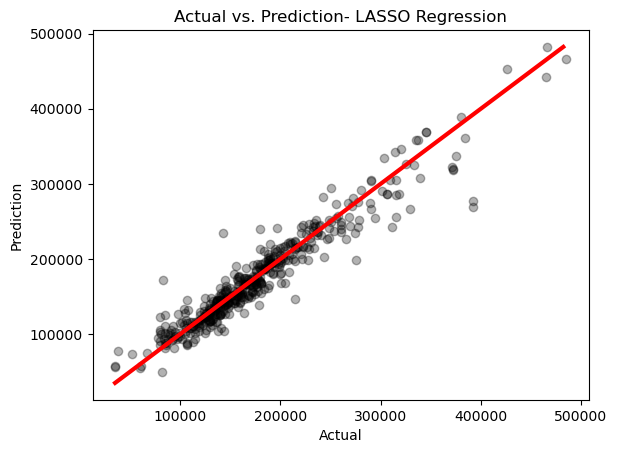

In [1139]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_lasso, 
            c='black', alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- LASSO Regression')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_lasso.max(),100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

# Decision Tree

In [1140]:
# Decision Tree- model 6
from sklearn.tree import DecisionTreeRegressor
#Post prunning approach
tree_reg=DecisionTreeRegressor(criterion='squared_error',
                                 max_depth=5, 
                                 min_samples_leaf=5, 
                                 ccp_alpha=0)
model_6=tree_reg.fit(X_trainv,trans_y_trainv)

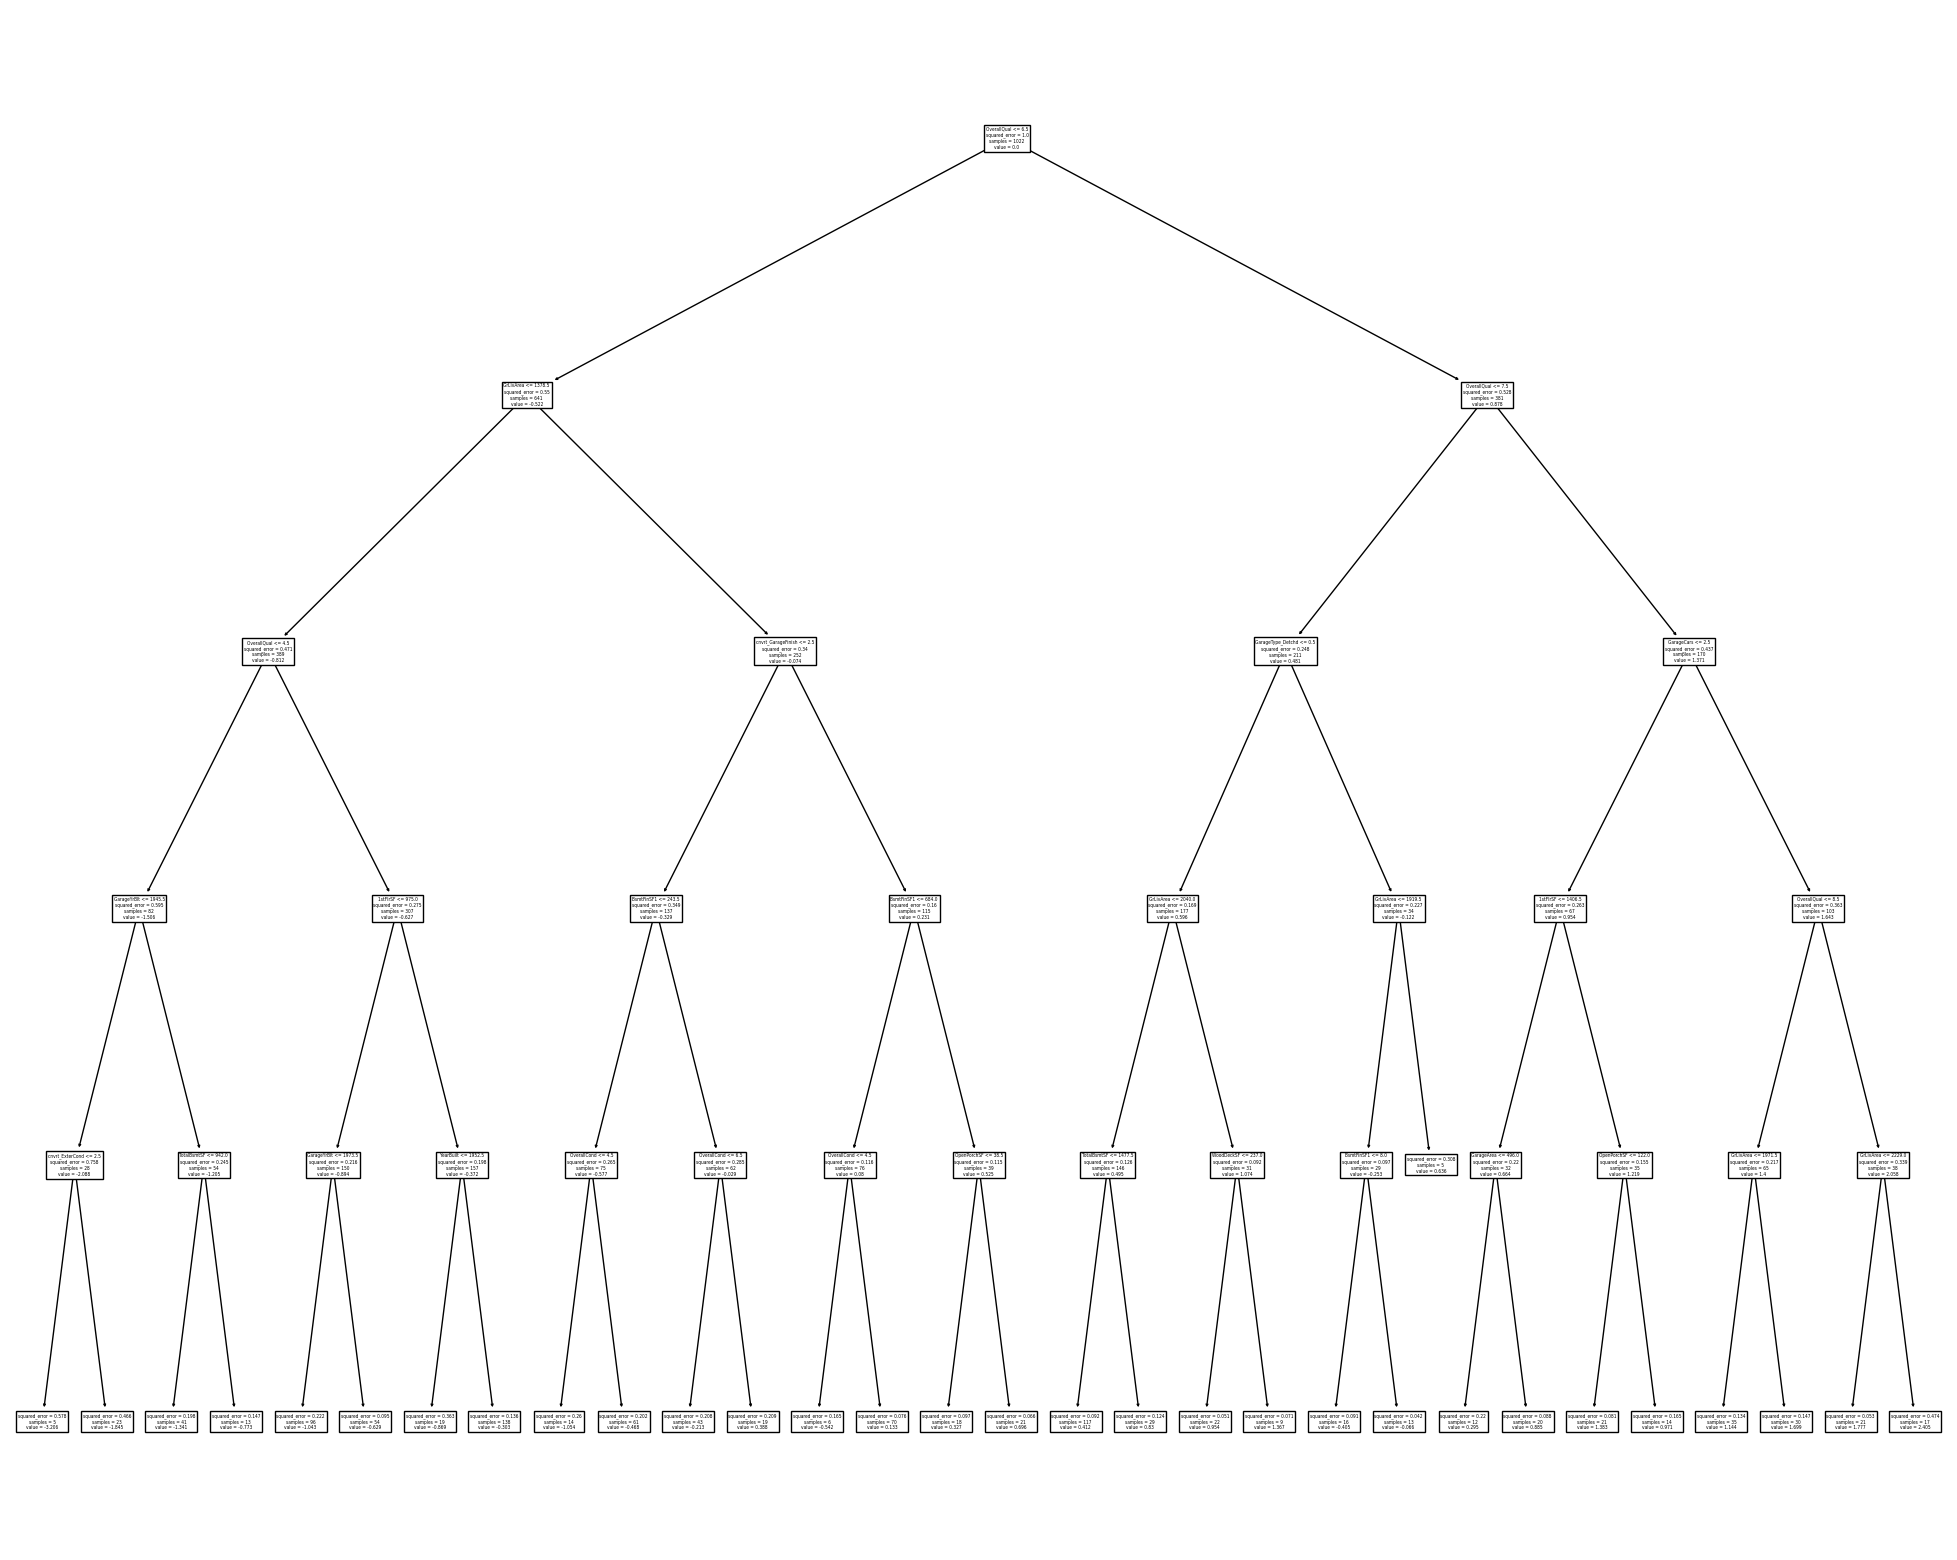

In [1141]:
# Plot the Tree
from sklearn.tree import plot_tree
 
# Convert the feature names from Index to list
feature_names_list=X_trainv.columns.tolist()

# Plot the Tree
plt.figure(figsize=(25,20))
plot_tree(model_6,feature_names=feature_names_list)
plt.show()

In [1142]:
# Post prunning
prunning_path=model_6.cost_complexity_pruning_path(X_trainv,trans_y_trainv)
prunning_path

{'ccp_alphas': array([0.        , 0.00080666, 0.00106658, 0.00129088, 0.00139674,
        0.00246204, 0.00256018, 0.00311564, 0.00329696, 0.00362981,
        0.00382836, 0.0039706 , 0.00464797, 0.00487952, 0.00500785,
        0.00503006, 0.00523436, 0.00581419, 0.00744315, 0.00839654,
        0.00999746, 0.01013965, 0.01407964, 0.01440621, 0.01886543,
        0.01917789, 0.02046571, 0.04894516, 0.07306761, 0.08167532,
        0.45820757]),
 'impurities': array([0.15709427, 0.15790093, 0.15896751, 0.16025839, 0.16165514,
        0.16411718, 0.16667736, 0.169793  , 0.17308996, 0.17671977,
        0.18054814, 0.18451874, 0.18916671, 0.19404623, 0.19905408,
        0.20408413, 0.20931849, 0.21513268, 0.22257582, 0.23097236,
        0.24096982, 0.25110946, 0.2651891 , 0.27959531, 0.29846074,
        0.31763863, 0.33810433, 0.38704949, 0.46011711, 0.54179243,
        1.        ])}

In [1143]:
# Grid
alpha_grid=prunning_path['ccp_alphas']
alpha_grid

array([0.        , 0.00080666, 0.00106658, 0.00129088, 0.00139674,
       0.00246204, 0.00256018, 0.00311564, 0.00329696, 0.00362981,
       0.00382836, 0.0039706 , 0.00464797, 0.00487952, 0.00500785,
       0.00503006, 0.00523436, 0.00581419, 0.00744315, 0.00839654,
       0.00999746, 0.01013965, 0.01407964, 0.01440621, 0.01886543,
       0.01917789, 0.02046571, 0.04894516, 0.07306761, 0.08167532,
       0.45820757])

In [1144]:
# K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors=np.zeros(shape =len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time=time.time()
for i in range(len(alpha_grid)):
    tree_reg=DecisionTreeRegressor(criterion='squared_error',
                                     max_depth=5, 
                                     min_samples_leaf=5, 
                                     ccp_alpha=alpha_grid[i])
    scores = cross_val_score(estimator=tree_reg, 
                             X=X_trainv, 
                             y=trans_y_trainv,
                             scoring='neg_root_mean_squared_error',
                             cv=10,n_jobs=-1)
    cv_errors[i]=scores.mean() 

end_time=time.time()
print('The Processing time is: ',end_time-start_time, 'seconds')
cv_errors

The Processing time is:  10.102499008178711 seconds


array([-0.52047494, -0.51929931, -0.5192994 , -0.51761649, -0.51810206,
       -0.51593884, -0.51605044, -0.5186106 , -0.52056274, -0.52096726,
       -0.52410198, -0.52569109, -0.53813497, -0.54044781, -0.54314933,
       -0.54368472, -0.54276806, -0.54206891, -0.54372802, -0.54999315,
       -0.55461642, -0.55461642, -0.57442141, -0.5761312 , -0.59682646,
       -0.59586132, -0.60174861, -0.65098791, -0.6867531 , -0.70940313,
       -0.90257066])

In [1145]:
# Best alpha
best_alpha=alpha_grid[np.argmax(cv_errors)]
best_alpha

0.0024620422784568117

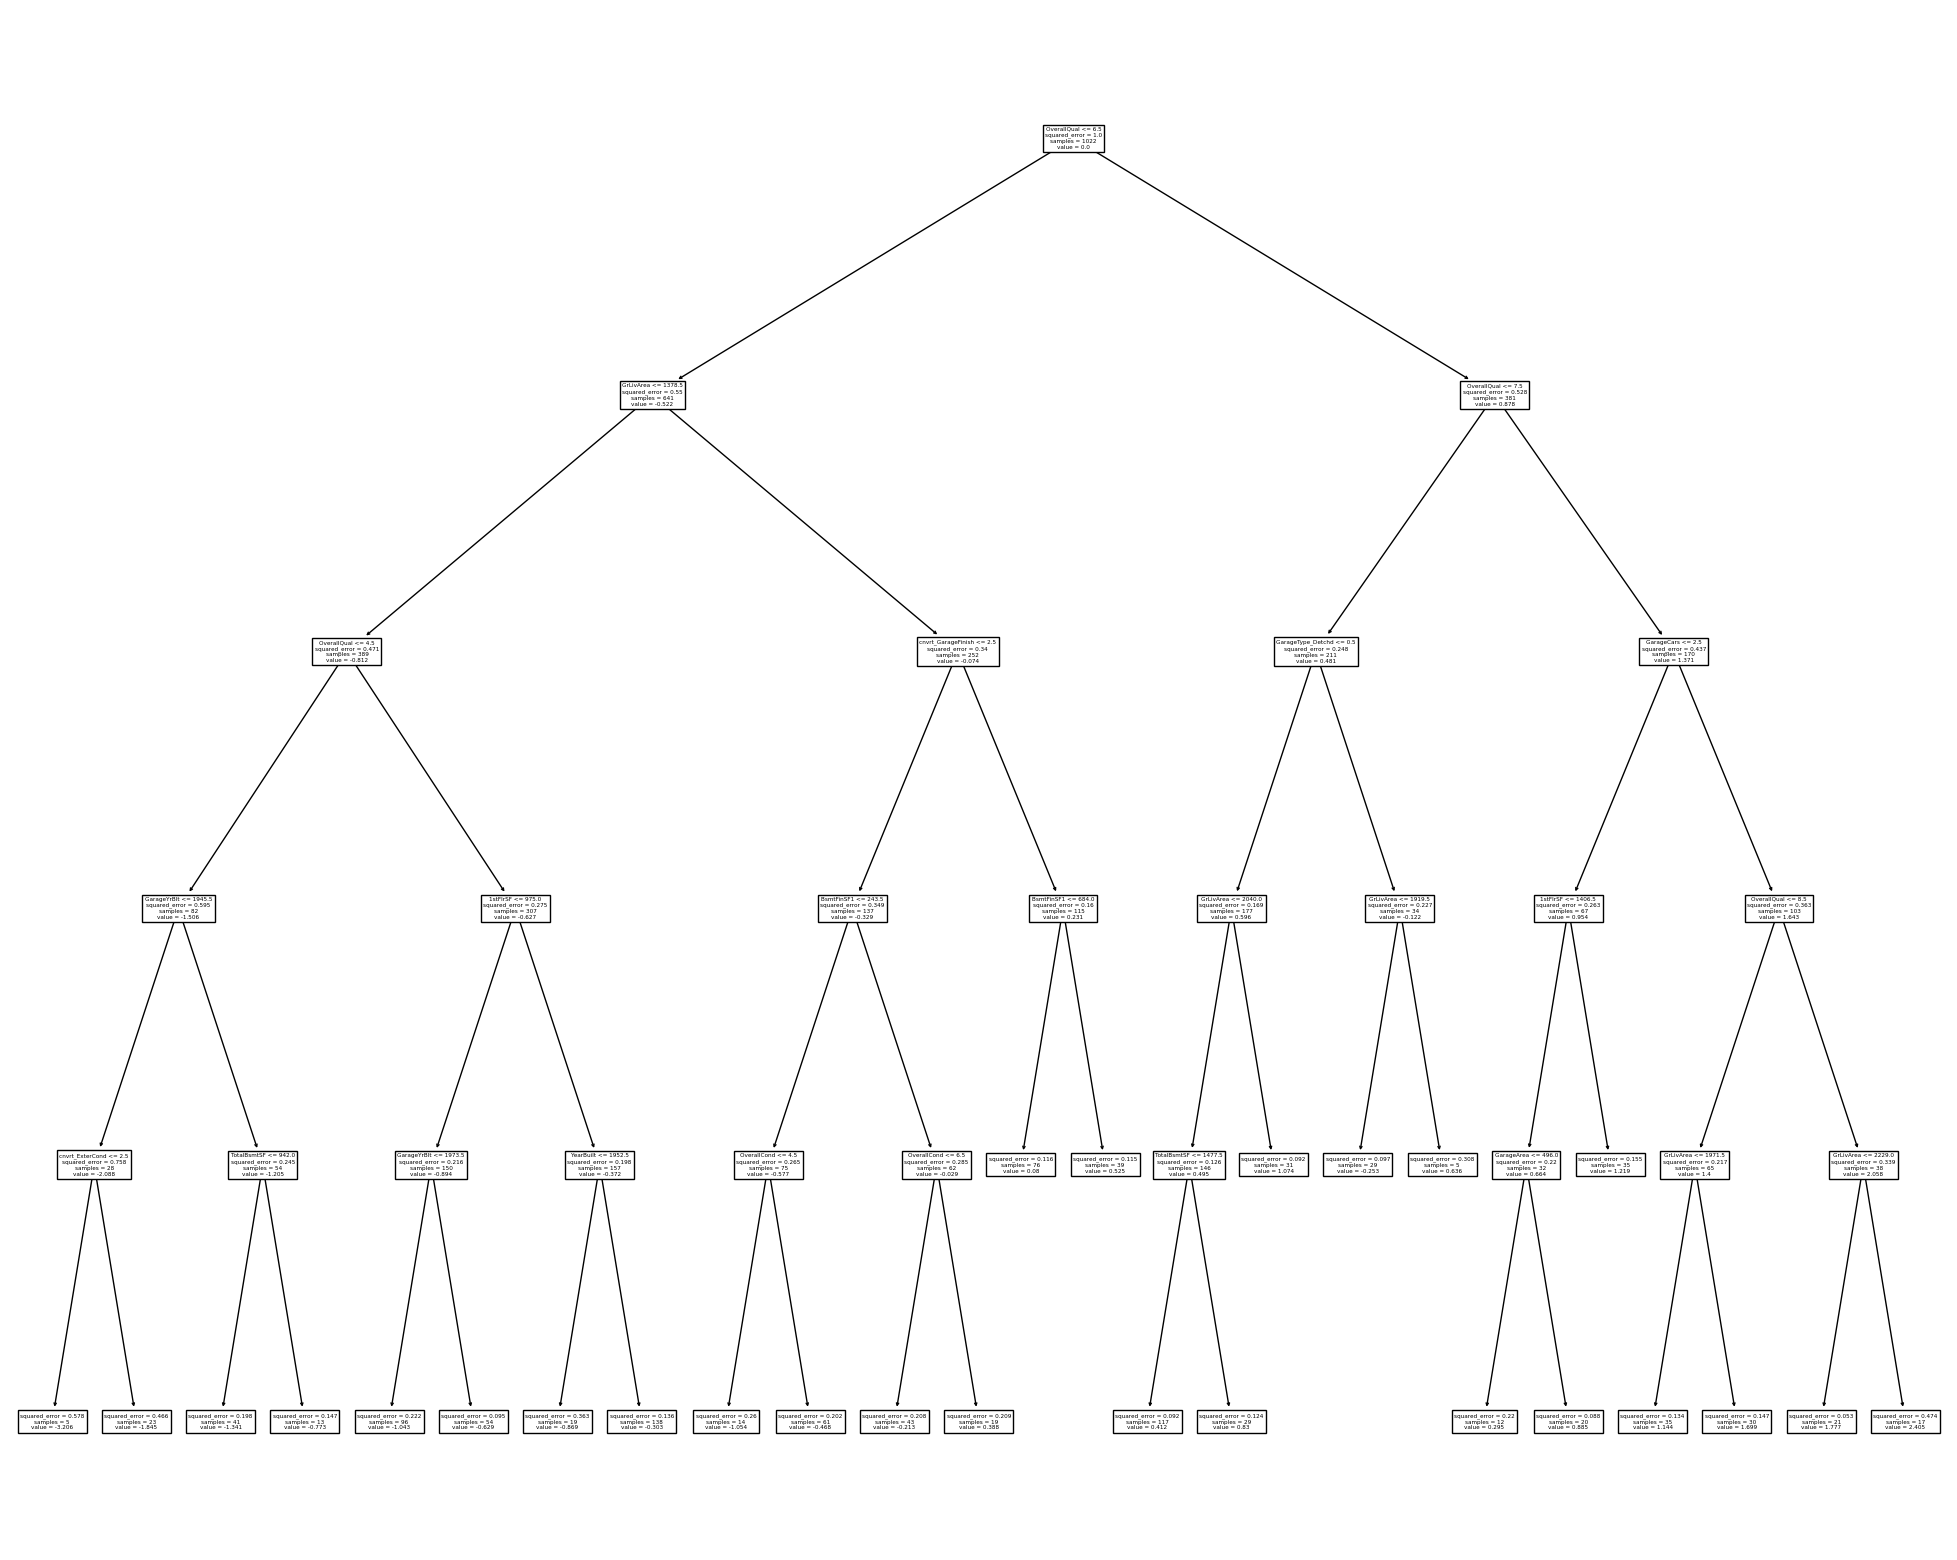

In [1146]:
#Best model
tree_reg=DecisionTreeRegressor(criterion='squared_error',
                                 max_depth=5, 
                                 min_samples_leaf=5, 
                                 ccp_alpha=best_alpha)


model_6=tree_reg.fit(X_trainv,trans_y_trainv)

# Convert the feature names from Index to list
feature_names_list=X_trainv.columns.tolist()


#Plot the Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 20))
plot_tree(model_6, feature_names=feature_names_list)
plt.show()


In [1147]:
X_testv.shape

(438, 212)

In [1148]:
print(dummy_vars_tev.shape)
print(testv.shape)

(438, 157)
(438, 101)


## Evaluation on the Validation Set (Decision Tree)

In [1149]:
 #Define feature matrix
# Train All columns except 'SalePrice'
X_X=testv.iloc[:,list(range(0,80))+list(range(81,100))]
# print(X_X.columns)
X_testv=pd.concat([X_X,dummy_vars_tev],axis = 1)
#add constant
# X_testv=sm.add_constant(X_testv) 
X_testv = sm.add_constant(X_testv,has_constant='add')
X_testv.shape
print(X_testv.columns)

Index(['const', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=257)


In [1150]:
# Remove coloumn'Id'
# X_testv.drop(columns=['Id'],inplace=True)
X_testv.shape

(438, 257)

In [1151]:
X_testv=X_testv.drop(columns=X_testv.select_dtypes(include=['object']).columns)
# Check the data types of the cleaned DataFrame
print(X_testv.dtypes)
print(X_testv.shape)

const                    float64
Id                         int64
LotFrontage                int64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_Abnorml      int32
SaleCondition_AdjLand      int32
SaleCondition_Alloca       int32
SaleCondition_Family       int32
SaleCondition_Partial      int32
Length: 213, dtype: object
(438, 213)


In [1152]:
# Convert float64 and int32 columns to int64
X_testv=X_testv.astype({col:'int64' for col in X_testv.select_dtypes(include=['float64','int32']).columns})

# Check the data types of the columns to verify the conversion
print(X_testv.dtypes)

const                    int64
Id                       int64
LotFrontage              int64
LotArea                  int64
OverallQual              int64
                         ...  
SaleCondition_Abnorml    int64
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Partial    int64
Length: 213, dtype: object


In [1153]:
trans_y_trainv=PowerTransformer(method = 'box-cox').fit_transform(y_trainv.values.reshape(-1, 1))

In [1154]:
X_trainv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1017 to 815
Columns: 212 entries, const to SaleCondition_Partial
dtypes: int64(212)
memory usage: 1.7 MB


In [1155]:
X_trainv

const  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1017      1            0     5814            8            5       1984   
405       1            0     9991            4            4       1976   
6         1           75    10084            8            5       2004   
388       1           93     9382            7            5       1999   
501       1           75     9803            7            5       2005   
...     ...          ...      ...          ...          ...        ...   
1228      1           65     8769            9            5       2008   
1077      1            0    15870            5            5       1969   
1318      1            0    14781            8            5       2001   
723       1           60     8172            4            6       1954   
815       1           48    12137            7            5       1998   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLD  \
1017          1984           0        1036           0  ...               0   
405           1993           0        1116           0  ...               0   
6             2005         186        1369           0  ...               0   
388           2000         125           0           0  ...               0   
501           2005           0         400           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1228          2008         766        1540           0  ...               0   
1077          1969           0          75         791  ...               0   
1318          2002         178           0           0  ...               0   
723           1972           0           0           0  ...               0   
815           1998         442           0           0  ...               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
1017               0               0             0             0   
405                0               0             0             0   
6                  0               0             0             0   
388                0               0             0             0   
501                0               0             0             0   
...              ...             ...           ...           ...   
1228               0               0             1             0   
1077               0               0             0             0   
1318               0               0             0             0   
723                0               0             0             0   
815                0               0             0             0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1017                      1                      0                     0   
405                       0                      0                     0   
6                         0                      0                     0   
388                       0                      0                     0   
501                       0                      0                     0   
...                     ...                    ...                   ...   
1228                      0                      0                     0   
1077                      1                      0                     0   
1318                      0                      0                     0   
723                       0                      0                     0   
815                       0                      0                     0   

      SaleCondition_Family  SaleCondition_Partial  
1017                     0                      0  
405                      0                      0  
6                        0                      0  
388                      0                      0  
501                      0                      0  
...                    ...                    ...  
1228                     0                      1  
1077                  

In [1156]:
X_testv

const    Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
605       1   606           85    13600            7            6       1965   
642       1   643           75    13860            8            7       1972   
993       1   994           68     8846            6            5       2005   
736       1   737           60     8544            3            4       1950   
1239      1  1240           64     9037            8            5       2006   
...     ...   ...          ...      ...          ...          ...        ...   
805       1   806           91    12274            7            5       2008   
112       1   113           77     9965            7            5       2007   
348       1   349           36     2448            7            5       2003   
205       1   206           99    11851            7            5       1990   
622       1   623           71     7064            5            6       1977   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLD  \
605           1990         176         454  ...               0   
642           1995           0        1410  ...               0   
993           2006           0           0  ...               0   
736           1950           0           0  ...               0   
1239          2006          32         428  ...               0   
...            ...         ...         ...  ...             ...   
805           2008         256           0  ...               0   
112           2007         220         984  ...               0   
348           2004         106         573  ...               0   
205           1990           0           0  ...               0   
622           1977         153         560  ...               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
605                0               0             0             0   
642                0               0             0             0   
993                0               0             1             0   
736                0               0             0             0   
1239               0               0             0             0   
...              ...             ...           ...           ...   
805                0               0             1             0   
112                0               0             1             0   
348                0               0             0             0   
205                0               0             0             0   
622                0               0             0             0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
605                       0                      0                     0   
642                       0                      0                     0   
993                       0                      0                     0   
736                       0                      0                     0   
1239                      0                      0                     0   
...                     ...                    ...                   ...   
805                       0                      0                     0   
112                       0                      0                     0   
348                       0                      0                     0   
205                       0                      0                     0   
622                       0                      0                     0   

      SaleCondition_Family  SaleCondition_Partial  
605                      0                      0  
642                      0                      0  
993                      0                      1  
736                      0                      0  
1239                     0                      0  
...                    ...                    ...  
805                      0                      1  
112                      0                      1  
348                      0                

In [1157]:
X_testv=X_testv.drop(columns=['Id'])

In [1158]:
X_testv

const  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
605       1           85    13600            7            6       1965   
642       1           75    13860            8            7       1972   
993       1           68     8846            6            5       2005   
736       1           60     8544            3            4       1950   
1239      1           64     9037            8            5       2006   
...     ...          ...      ...          ...          ...        ...   
805       1           91    12274            7            5       2008   
112       1           77     9965            7            5       2007   
348       1           36     2448            7            5       2003   
205       1           99    11851            7            5       1990   
622       1           71     7064            5            6       1977   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLD  \
605           1990         176         454           0  ...               0   
642           1995           0        1410           0  ...               0   
993           2006           0           0           0  ...               0   
736           1950           0           0           0  ...               0   
1239          2006          32         428           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
805           2008         256           0           0  ...               0   
112           2007         220         984           0  ...               0   
348           2004         106         573           0  ...               0   
205           1990           0           0           0  ...               0   
622           1977         153         560           0  ...               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
605                0               0             0             0   
642                0               0             0             0   
993                0               0             1             0   
736                0               0             0             0   
1239               0               0             0             0   
...              ...             ...           ...           ...   
805                0               0             1             0   
112                0               0             1             0   
348                0               0             0             0   
205                0               0             0             0   
622                0               0             0             0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
605                       0                      0                     0   
642                       0                      0                     0   
993                       0                      0                     0   
736                       0                      0                     0   
1239                      0                      0                     0   
...                     ...                    ...                   ...   
805                       0                      0                     0   
112                       0                      0                     0   
348                       0                      0                     0   
205                       0                      0                     0   
622                       0                      0                     0   

      SaleCondition_Family  SaleCondition_Partial  
605                      0                      0  
642                      0                      0  
993                      0                      1  
736                      0                      0  
1239                     0                      0  
...                    ...                    ...  
805                      0                      1  
112                   

In [1159]:
#Prediction using model 6
pred_tree = model_6.predict(X_testv)
pred_tree = pd.Series(boxcox.inverse_transform(pred_tree.reshape(-1, 1)).reshape(-1), 
                      index = testv.index)
pred_tree

605     195524.030116
642     275335.089086
993     170783.032869
736      98981.547558
1239    275335.089086
            ...      
805     195524.030116
112     258590.895989
348     195524.030116
205     195524.030116
622     146671.518695
Length: 438, dtype: float64

In [1160]:
#Absolute error
abs_err_tree=abs(testv['SalePrice']-pred_tree)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_tree=mean_absolute_error(testv['SalePrice'],pred_tree)
mse_tree=mean_squared_error(testv['SalePrice'],pred_tree)
rmse_tree=np.sqrt(mse_tree)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_tree.mean(),
                            'MSE' :                   mse_tree,
                            'RMSE' :                   rmse_tree,
                            'Median of AbsErrors' :   abs_err_tree.median(),
                            'SD of AbsErrors' :       abs_err_tree.std(),
                            'IQR of AbsErrors':       iqr(abs_err_tree),
                            'Min of AbsErrors':       abs_err_tree.min(),
                            'Max of AbsErrors':       abs_err_tree.max()}, 
                            index = ['Decision Tree'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test                14263.503558  4.293243e+08  20720.142797   
LM_FWD                   14448.051321  4.367638e+08  20898.894986   
LM_BWD                   14537.233266  4.324169e+08  20794.637168   
LM_Ridge                 14919.438525  4.566752e+08  20794.637168   
LM_LASSO                 13721.483435  4.111831e+08  20277.650641   
Decision Tree            24744.257204  1.222742e+09  34967.727634   

               Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test             10553.322434     15046.383761      13948.086048   
LM_FWD                10006.922094     15117.519774      15270.043120   
LM_BWD                10646.353527     14885.956503      15473.349154   
LM_Ridge              10644.006449     15317.349954      13898.224409   
LM_LASSO              10065.606325     14947.042706      14111.478993   
Decision Tree         17104.607132     24735.817219      24528.488084   

               Min of AbsErrors  Max of AbsErrors  
LM_t-Test              1.348099     109868.587072  
LM_FWD                11.994278     106794.012006  
LM_BWD                 0.764331     102916.641263  
LM_Ridge               5.232922     123049.521981  
LM_LASSO               2.028977     123113.881632  
Decision Tree        124.030116     149111.254232

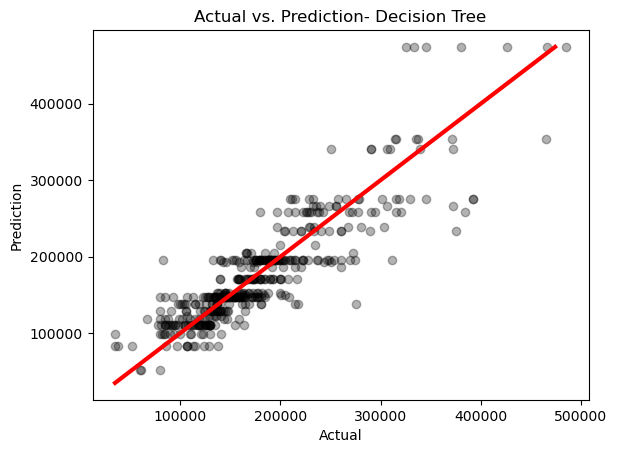

In [1161]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_tree,c='black',alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- Decision Tree')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_tree.max(),100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

# Random Forest

In [1162]:
#Sample Random Forest model (not tuned)
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=300,
                               max_features=15, 
                               criterion='squared_error',
                               max_depth=15, 
                               min_samples_leaf=5, 
                               ccp_alpha=0,
                               random_state =1234)
model_7=rf_reg.fit(X_trainv,trans_y_trainv.reshape(-1))

<Figure size 3000x2500 with 0 Axes>

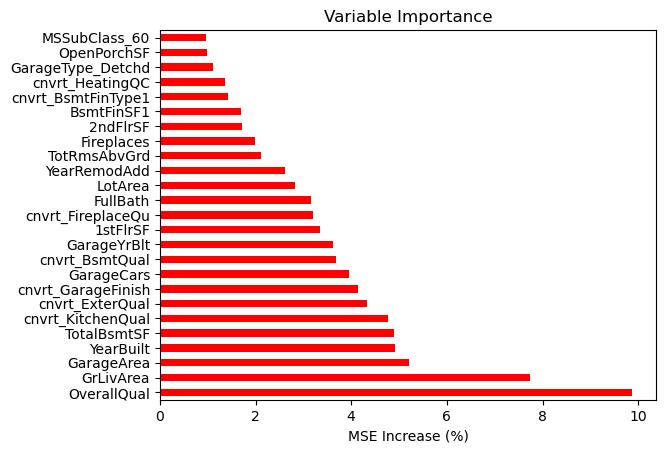

In [1163]:
#Calculate variable importance
importance=pd.DataFrame({'importance': model_7.feature_importances_ * 100}, 
                          index = X_trainv.columns)
 # importance.sort_values
importance_sorted = importance.sort_values(by='importance',ascending=False)
plt.figure(figsize=(30,25))                                                                           
importance_sorted[:25].plot(kind='barh',color='r',legend=False)                                                                        
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()

In [1164]:
#Create hyper-parameters grid
import itertools
n_estimators=[100,200,500,700]
max_features=['sqrt', 'log2'] 
max_depth=[2,5,10,20]
min_samples_leaf=[5,10,15]
params_grid=list(itertools.product(n_estimators,max_features,max_depth,min_samples_leaf))
params_grid=pd.DataFrame(data=params_grid,
                           index=range(1,97), 
                           columns=['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

n_estimators max_features  max_depth  min_samples_leaf
1            100         sqrt          2                 5
2            100         sqrt          2                10
3            100         sqrt          2                15
4            100         sqrt          5                 5
5            100         sqrt          5                10
..           ...          ...        ...               ...
92           700         log2         10                10
93           700         log2         10                15
94           700         log2         20                 5
95           700         log2         20                10
96           700         log2         20                15

[96 rows x 4 columns]

In [1165]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg=RandomForestRegressor(n_estimators=params_grid.iloc[i, 0],
                                   max_features=params_grid.iloc[i, 1], 
                                   criterion='squared_error',
                                   max_depth=params_grid.iloc[i, 2], 
                                   min_samples_leaf = params_grid.iloc[i, 3], 
                                   ccp_alpha=0)
    scores = cross_val_score(estimator=rf_reg, 
                             X=X_trainv, 
                             y=trans_y_trainv,
                             scoring='neg_root_mean_squared_error',
                             cv=10, n_jobs=-1)
    cv_errors[i]=scores.mean() 

end_time=time.time()
print('The Processing time is: ',end_time-start_time,'seconds')

cv_errors

The Processing time is:  249.83041548728943 seconds


array([-0.60381018, -0.60690393, -0.60527509, -0.44321644, -0.44930589,
       -0.46224956, -0.39462465, -0.42318739, -0.44478465, -0.39738872,
       -0.4230544 , -0.43830497, -0.67893773, -0.67577108, -0.68359319,
       -0.50176248, -0.51618475, -0.53435173, -0.44583828, -0.48365368,
       -0.51314453, -0.43841698, -0.48215898, -0.51010355, -0.6042227 ,
       -0.60538831, -0.60524574, -0.44377989, -0.45200596, -0.4628391 ,
       -0.39535818, -0.42256661, -0.44275874, -0.39343806, -0.42236925,
       -0.44306676, -0.67503845, -0.67637676, -0.67930367, -0.50012036,
       -0.51453952, -0.5330671 , -0.44257159, -0.48233494, -0.51067818,
       -0.44002402, -0.47804257, -0.51025026, -0.6055131 , -0.60340438,
       -0.60604228, -0.44173546, -0.45084015, -0.46001998, -0.39524779,
       -0.42221097, -0.44241641, -0.39224295, -0.42160915, -0.44193323,
       -0.67546337, -0.67787746, -0.67492205, -0.50133297, -0.51627132,
       -0.53312382, -0.44122402, -0.48197998, -0.5098095 , -0.43

In [1166]:
#Best model
params_grid.iloc[np.argmax(cv_errors),:]

n_estimators         500
max_features        sqrt
max_depth             20
min_samples_leaf       5
Name: 58, dtype: object

In [1167]:
#Train model 7
rf_reg=RandomForestRegressor(n_estimators=params_grid.iloc[np.argmax(cv_errors),0],
                               max_features=params_grid.iloc[np.argmax(cv_errors),1], 
                               criterion='squared_error',
                               max_depth=params_grid.iloc[np.argmax(cv_errors),2], 
                               min_samples_leaf=params_grid.iloc[np.argmax(cv_errors),3], 
                               ccp_alpha=0,
                               random_state=1234)
model_7=rf_reg.fit(X_trainv,trans_y_trainv.reshape(-1))


## Evaluation on the Validation Set (Random Forest)

In [1168]:
common_columns = X_trainv.columns.intersection(X_testv.columns)
X_trainv = X_trainv[common_columns]
X_testv = X_testv[common_columns]

In [1169]:
#Prediction using model 7
pred_rf=model_7.predict(X_testv)
pred_rf=pd.Series(boxcox.inverse_transform(pred_rf.reshape(-1, 1)).reshape(-1), 
                    index=testv.index)
pred_rf

605     184044.820799
642     267396.627674
993     180236.913848
736      95530.959008
1239    220568.923598
            ...      
805     212189.324233
112     298199.711119
348     184428.838293
205     178611.779143
622     135567.932106
Length: 438, dtype: float64

In [1170]:
#Absolute error
abs_err_rf=abs(testv['SalePrice']-pred_rf)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_rf=mean_absolute_error(testv['SalePrice'],pred_rf)
mse_rf=mean_squared_error(testv['SalePrice'],pred_rf)
rmse_rf=np.sqrt(mse_rf)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_rf.mean(),
                            'MSE' :                   mse_rf,
                            'RMSE' :                   rmse_rf,
                            'Median of AbsErrors' :   abs_err_rf.median(),
                            'SD of AbsErrors' :       abs_err_rf.std(),
                            'IQR of AbsErrors':       iqr(abs_err_rf),
                            'Min of AbsErrors':       abs_err_rf.min(),
                            'Max of AbsErrors':       abs_err_rf.max()}, 
                            index = ['Random Forest'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test                14263.503558  4.293243e+08  20720.142797   
LM_FWD                   14448.051321  4.367638e+08  20898.894986   
LM_BWD                   14537.233266  4.324169e+08  20794.637168   
LM_Ridge                 14919.438525  4.566752e+08  20794.637168   
LM_LASSO                 13721.483435  4.111831e+08  20277.650641   
Decision Tree            24744.257204  1.222742e+09  34967.727634   
Random Forest            16830.078058  7.699673e+08  27748.284511   

               Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test             10553.322434     15046.383761      13948.086048   
LM_FWD                10006.922094     15117.519774      15270.043120   
LM_BWD                10646.353527     14885.956503      15473.349154   
LM_Ridge              10644.006449     15317.349954      13898.224409   
LM_LASSO              10065.606325     14947.042706      14111.478993   
Decision Tree         17104.607132     24735.817219      24528.488084   
Random Forest         10214.919175     22086.863334      13755.283874   

               Min of AbsErrors  Max of AbsErrors  
LM_t-Test              1.348099     109868.587072  
LM_FWD                11.994278     106794.012006  
LM_BWD                 0.764331     102916.641263  
LM_Ridge               5.232922     123049.521981  
LM_LASSO               2.028977     123113.881632  
Decision Tree        124.030116     149111.254232  
Random Forest          6.727837     174927.812644

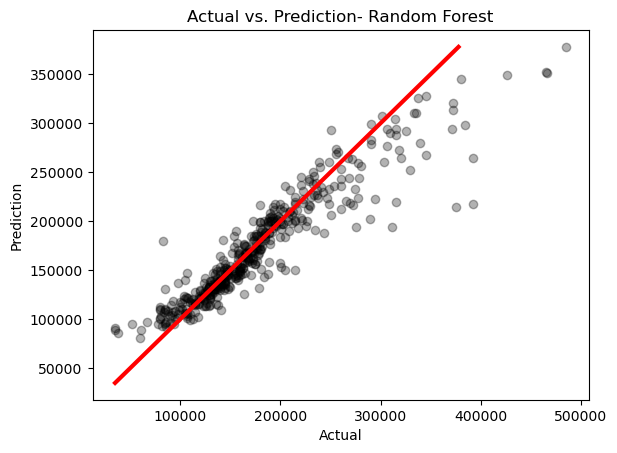

In [1171]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_rf, c='black', alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- Random Forest')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_rf.max(),100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

# Principal Component Regression (PCR)

In [1172]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trainv_scaled=scaler.fit_transform(X_trainv)

In [1173]:
#PCA
from sklearn.decomposition import PCA
pca=PCA()
pca_model=pca.fit(X_trainv_scaled)

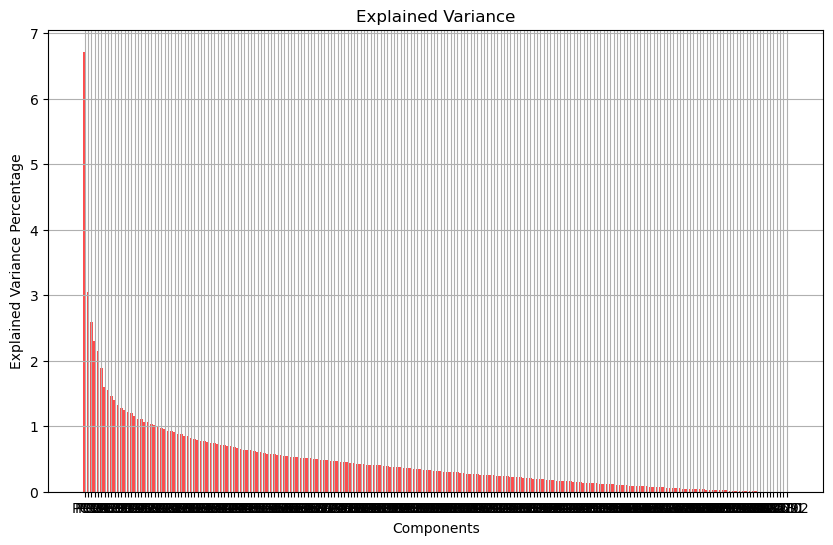

In [1174]:
#Explaind variance percentage
plt.figure(figsize = (10, 6))
plt.bar(x = range(1,213), 
        height=pca_model.explained_variance_ratio_ * 100,
        color='red', 
        alpha =0.7)
plt.title('Explained Variance')
plt.xlabel('Components')
plt.ylabel('Explained Variance Percentage')
plt.xticks(ticks=range(1,213), labels= ['PC' + str(_) for _ in range(1,213)])
plt.grid()
plt.show()

In [1175]:
#Cumulative explaind variance percentage
np.cumsum(np.round(pca_model.explained_variance_ratio_ * 100, 1))

array([ 6.7,  9.7, 12.3, 14.6, 16.7, 18.6, 20.2, 21.7, 23.2, 24.6, 25.9,
       27.2, 28.4, 29.6, 30.8, 32. , 33.1, 34.2, 35.3, 36.4, 37.4, 38.4,
       39.4, 40.4, 41.4, 42.3, 43.2, 44.1, 45. , 45.9, 46.8, 47.6, 48.4,
       49.2, 50. , 50.8, 51.6, 52.4, 53.1, 53.8, 54.5, 55.2, 55.9, 56.6,
       57.3, 58. , 58.7, 59.4, 60. , 60.6, 61.2, 61.8, 62.4, 63. , 63.6,
       64.2, 64.8, 65.4, 66. , 66.6, 67.1, 67.6, 68.1, 68.6, 69.1, 69.6,
       70.1, 70.6, 71.1, 71.6, 72.1, 72.6, 73.1, 73.6, 74.1, 74.6, 75.1,
       75.6, 76.1, 76.5, 76.9, 77.3, 77.7, 78.1, 78.5, 78.9, 79.3, 79.7,
       80.1, 80.5, 80.9, 81.3, 81.7, 82.1, 82.5, 82.9, 83.3, 83.7, 84.1,
       84.4, 84.7, 85. , 85.3, 85.6, 85.9, 86.2, 86.5, 86.8, 87.1, 87.4,
       87.7, 88. , 88.3, 88.6, 88.9, 89.2, 89.5, 89.8, 90.1, 90.4, 90.7,
       91. , 91.3, 91.5, 91.7, 91.9, 92.1, 92.3, 92.5, 92.7, 92.9, 93.1,
       93.3, 93.5, 93.7, 93.9, 94.1, 94.3, 94.5, 94.7, 94.9, 95.1, 95.3,
       95.5, 95.7, 95.9, 96.1, 96.3, 96.5, 96.6, 96

In [1176]:
#Principal axes in feature space
print(pca_model.components_.shape)
print(pca_model.components_)

(212, 212)
[[ 1.15443546e-18  4.94498386e-02  6.00846956e-02 ... -1.23535551e-02
   2.31786067e-03  1.06864584e-01]
 [-5.83004331e-18  9.29742532e-02  9.23438187e-03 ...  9.44896264e-03
  -9.09412816e-03  6.69392176e-02]
 [-9.31616269e-19  6.54782920e-02  2.25395323e-01 ...  5.19661933e-02
   2.43262721e-02 -9.31866450e-02]
 ...
 [ 0.00000000e+00 -2.98372438e-16 -2.58624840e-18 ...  1.90819582e-16
   6.93889390e-18 -3.01841885e-16]
 [ 9.99998974e-01  2.79909185e-18  7.71864276e-18 ... -8.17217388e-18
  -4.92973175e-18  7.20994445e-18]
 [ 0.00000000e+00  1.80411242e-16 -5.49559333e-17 ...  1.49186219e-16
  -6.93889390e-18 -8.67361738e-18]]


In [1177]:
#Transfrom data into new dimensions
X_trainv_pca=pca_model.transform(X_trainv_scaled)
X_trainv_pca.shape

(1022, 212)

In [1178]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv_errors=np.zeros(shape=X_trainv_pca.shape[1]) #to save cv results

import time #to measure the processing time
start_time=time.time()

for i in range(X_trainv_pca.shape[1]):
    linear_reg=LinearRegression()
    scores=cross_val_score(estimator=linear_reg, 
                             X=X_trainv_pca[:, : i + 1], 
                             y=trans_y_trainv,
                             scoring='neg_root_mean_squared_error',
                             cv=5,n_jobs = -1)
    cv_errors[i]=scores.mean() 

end_time=time.time()
print('The Processing time is: ',end_time-start_time,'seconds')
cv_errors

The Processing time is:  14.828158140182495 seconds


array([-4.75555436e-01, -4.50726241e-01, -4.28165597e-01, -4.29811237e-01,
       -4.28184645e-01, -4.21903209e-01, -4.23433943e-01, -4.24734629e-01,
       -4.32797381e-01, -4.33007730e-01, -4.34284426e-01, -4.26557383e-01,
       -4.28637149e-01, -4.29400507e-01, -4.24347868e-01, -4.02252046e-01,
       -4.01704625e-01, -4.03268480e-01, -4.01794301e-01, -4.01228889e-01,
       -4.01518653e-01, -4.01858684e-01, -4.01737750e-01, -4.02988213e-01,
       -4.08942361e-01, -4.17700301e-01, -4.18346508e-01, -4.01139262e-01,
       -4.10020213e-01, -4.19456680e-01, -4.17237964e-01, -4.11653602e-01,
       -4.05944287e-01, -4.04801934e-01, -4.05794866e-01, -4.07542987e-01,
       -4.06382189e-01, -4.08624008e-01, -4.09258233e-01, -3.98455185e-01,
       -3.98650234e-01, -4.01077027e-01, -4.03044911e-01, -4.09752947e-01,
       -4.11892524e-01, -4.06566454e-01, -4.10533476e-01, -4.13499834e-01,
       -4.24263217e-01, -4.50455572e-01, -4.56684245e-01, -4.58752311e-01,
       -4.56789004e-01, -

In [1179]:
#Best number of components
components_number=np.argmax(cv_errors)
components_number

39

In [1180]:
#Correlation btw components
np.round(pd.DataFrame(X_trainv_pca[:, : components_number]).corr(), 3)

0    1    2    3    4    5    6    7    8    9   ...   29   30   31   32  \
0   1.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  ...  0.0 -0.0  0.0  0.0   
1  -0.0  1.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  ... -0.0  0.0  0.0  0.0   
2  -0.0  0.0  1.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  ... -0.0 -0.0  0.0 -0.0   
3  -0.0 -0.0 -0.0  1.0  0.0 -0.0  0.0  0.0  0.0 -0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  1.0 -0.0 -0.0  0.0 -0.0  0.0  ... -0.0 -0.0 -0.0 -0.0   
5  -0.0 -0.0 -0.0 -0.0 -0.0  1.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0 -0.0 -0.0   
6  -0.0 -0.0  0.0  0.0 -0.0 -0.0  1.0 -0.0 -0.0  0.0  ...  0.0  0.0 -0.0 -0.0   
7  -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  1.0  0.0  0.0  ... -0.0  0.0  0.0 -0.0   
8  -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  1.0  0.0  ...  0.0 -0.0 -0.0 -0.0   
9   0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  1.0  ... -0.0  0.0 -0.0 -0.0   
10  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  ... -0.0  0.0  0.0 -0.0   
11 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  ...  0.0 -0.0 -0.0 -0.0   
12  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  ... -0.0  0.0  0.0  0.0   
13 -0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0 -0.0  0.0  0.0   
14  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0 -0.0  0.0  ...  0.0 -0.0 -0.0 -0.0   
15 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  ... -0.0 -0.0 -0.0 -0.0   
16  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  ...  0.0 -0.0 -0.0  0.0   
17  0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0 -0.0 -0.0   
18  0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  ... -0.0  0.0 -0.0  0.0   
19  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  ... -0.0 -0.0  0.0  0.0   
20  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  ...  0.0 -0.0 -0.0  0.0   
21 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0  ... -0.0  0.0  0.0  0.0   
22 -0.0 -0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  ...  0.0  0.0  0.0 -0.0   
23 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0  ...  0.0  0.0 -0.0  0.0   
24  0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  ... -0.0  0.0 -0.0 -0.0   
25  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  ... -0.0  0.0  0.0 -0.0   
26  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  ... -0.0 -0.0  0.0 -0.0   
27 -0.0  0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  ... -0.0  0.0  0.0 -0.0   
28 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  ...  0.0  0.0 -0.0  0.0   
29  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0 -0.0  ...  1.0 -0.0 -0.0  0.0   
30 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0  ... -0.0  1.0 -0.0 -0.0   
31  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0 -0.0  1.0  0.0   
32  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0 -0.0  0.0  1.0   
33  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  ...  0.0  0.0  0.0  0.0   
34 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  ... -0.0  0.0  0.0  0.0   
35 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  ...  0.0  0.0 -0.0 -0.0   
36 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0  0.0  0.0 -0.0   
37 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0  ... -0.0 -0.0 -0.0  0.0   
38  0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0 -0.0 -0.0   

     33   34   35   36   37   38  
0   0.0 -0.0 -0.0 -0.0 -0.0  0.0  
1  -0.0  0.0 -0.0  0.0  0.0  0.0  
2   0.0 -0.0  0.0  0.0 -0.0 -0.0  
3  -0.0  0.0 -0.0  0.0  0.0  0.0  
4  -0.0  0.0 -0.0  0.0  0.0  0.0  
5  -0.0 -0.0 -0.0 -0.0  0.0  0.0  
6   0.0  0.0  0.0 -0.0 -0.0  0.0  
7   0.0 -0.0  0.0 -0.0 -0.0  0.0  
8  -0.0 -0.0 -0.0 -0.0 -0.0  0.0  
9   0.0  0.0 -0.0 -0.0  0.0  0.0  
10 -0.0  0.0 -0.0  0.0  0.0  0.0  
11 -0.0 -0.0  0.0  0.0 -0.0 -0.0  
12 -0.0 -0.0 -0.0  0.0 -0.0  0.0  
13  0.0 -0.0 -0.0  0.0  0.0  0.0  
14 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  
15 -0.0  0.0  0.0  0.0  0.0  0.0  
16 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
17 -0.0  0.0 -0.0 -0.0  0.0 -0.0  
18  0.0 -0.0 -0.0 -0.0  0.0  0.0  
19 -0.0  0.0  0.0  0.0  0.0  0.0  
20  0.0 -0.0  0.0  0.0 -0.0 -

In [1181]:
#Best model
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
model_8=linear_reg.fit(X_trainv_pca[:, : components_number], 
                         trans_y_trainv)

In [1182]:
#Predict on test - model 8

#Scale data
X_testv_scaled=scaler.transform(X_testv)

#Transfrom data into new dimensions
X_testv_pca=pca_model.transform(X_testv_scaled)

#Prediction on test
pred_pcr=model_8.predict(X_testv_pca[:, : components_number])
pred_pcr=pd.Series(boxcox.inverse_transform(pred_pcr.reshape(-1, 1)).reshape(-1), 
                    index = testv.index)
pred_pcr

605     186033.737058
642     308743.224699
993     169282.106628
736      91164.500356
1239    242909.085184
            ...      
805     206845.634642
112     339181.386551
348     186033.660323
205     167994.133523
622     127149.357630
Length: 438, dtype: float64

In [1183]:
pred_pcr.shape


(438,)

## Evaluation on the Validation Set (PCR)

In [1184]:
#Absolute error
abs_err_pcr=abs(testv['SalePrice']-pred_pcr)

# Calculate MAE, MSE, RMSE and Absolute error median, sd, IQR, min, max
mae_pcr=mean_absolute_error(testv['SalePrice'],pred_pcr)
mse_pcr=mean_squared_error(testv['SalePrice'],pred_pcr)
rmse_pcr=np.sqrt(mse_pcr)

#Absolute error mean, median, sd, IQR, max, min
models_comp=pd.concat([models_comp,
                         pd.DataFrame({'Mean of AbsErrors(MAE)': abs_err_pcr.mean(),
                            'MSE' :                   mse_pcr,
                            'RMSE' :                   rmse_pcr,
                            'Median of AbsErrors' :   abs_err_pcr.median(),
                            'SD of AbsErrors' :       abs_err_pcr.std(),
                            'IQR of AbsErrors':       iqr(abs_err_pcr),
                            'Min of AbsErrors':       abs_err_pcr.min(),
                            'Max of AbsErrors':       abs_err_pcr.max()}, 
                            index = ['PCR'])])
models_comp

Mean of AbsErrors(MAE)           MSE          RMSE  \
LM_t-Test                14263.503558  4.293243e+08  20720.142797   
LM_FWD                   14448.051321  4.367638e+08  20898.894986   
LM_BWD                   14537.233266  4.324169e+08  20794.637168   
LM_Ridge                 14919.438525  4.566752e+08  20794.637168   
LM_LASSO                 13721.483435  4.111831e+08  20277.650641   
Decision Tree            24744.257204  1.222742e+09  34967.727634   
Random Forest            16830.078058  7.699673e+08  27748.284511   
PCR                      17693.876085  6.633898e+08  25756.354913   

               Median of AbsErrors  SD of AbsErrors  IQR of AbsErrors  \
LM_t-Test             10553.322434     15046.383761      13948.086048   
LM_FWD                10006.922094     15117.519774      15270.043120   
LM_BWD                10646.353527     14885.956503      15473.349154   
LM_Ridge              10644.006449     15317.349954      13898.224409   
LM_LASSO              10065.606325     14947.042706      14111.478993   
Decision Tree         17104.607132     24735.817219      24528.488084   
Random Forest         10214.919175     22086.863334      13755.283874   
PCR                   11838.665965     18738.148448      15608.834477   

               Min of AbsErrors  Max of AbsErrors  
LM_t-Test              1.348099     109868.587072  
LM_FWD                11.994278     106794.012006  
LM_BWD                 0.764331     102916.641263  
LM_Ridge               5.232922     123049.521981  
LM_LASSO               2.028977     123113.881632  
Decision Tree        124.030116     149111.254232  
Random Forest          6.727837     174927.812644  
PCR                   25.480253     165477.327507

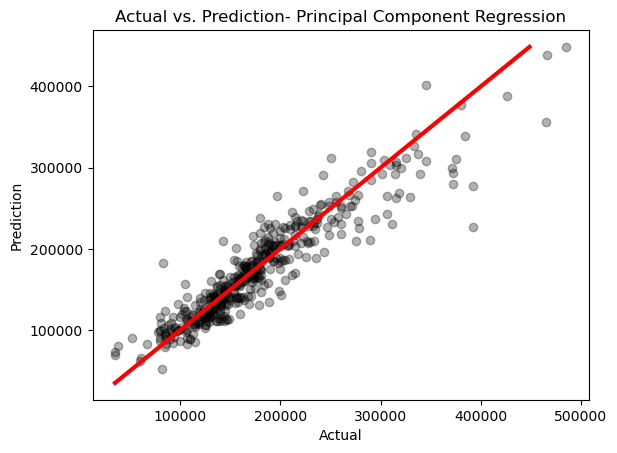

In [1185]:
# Actual vs. Prediction
plt.scatter(x=testv['SalePrice'],y=pred_pcr,c='black', alpha = 0.3)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction- Principal Component Regression')

#Add 45 degree line
xp = np.linspace(testv['SalePrice'].min(),pred_pcr.max(),100)
plt.plot(xp,xp,c='red',linewidth = 3)
plt.show()

# Model Evaluation

# Test data understanding- Phase1 
### 2: Test Data Set Description

In [1186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [1187]:
# Test data
#Read Test data from file
test=pd.read_csv('test.csv')
# test.info()
test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [1188]:
test['Id'].nunique()

1459

In [1189]:
np.sum(test.duplicated())

0

### 3: Check for Missing Values

In [1190]:
# Step 1:Determine the type of MVs
# Know the cause
np.sum(test.isnull())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [1191]:
# Step 2: Determine the extent of MVs
#S ummary of MVs in each column
mvs_summary = pd.DataFrame({'freq':np.sum(test.isnull())})
mvs_summary['pct'] = round(mvs_summary['freq']/test.shape[0]* 100, 1)
mvs_summary.sort_values(by ='pct', ascending = False)

freq   pct
PoolQC         1456  99.8
MiscFeature    1408  96.5
Alley          1352  92.7
Fence          1169  80.1
MasVnrType      894  61.3
...             ...   ...
Electrical        0   0.0
1stFlrSF          0   0.0
2ndFlrSF          0   0.0
LowQualFinSF      0   0.0
SaleCondition     0   0.0

[80 rows x 2 columns]

In [1192]:
#Summary of MVs for each case
test.loc[:,'mvs']=test.apply(lambda row: np.sum(row.isnull()), axis = 1)
test.sort_values(by ='mvs',ascending = False)
test.loc[:,'mvs_pct']=round(test.apply(lambda row: np.sum(row.isnull())/(test.shape[1]-3)*100,axis = 1),1)
#(data.shape[1]-3), 3 refers to 3 extra columns (id, mvs, mvs-pct)
test.sort_values(by='mvs',ascending = False)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
387   1848          20       RL          NaN     9000   Pave   NaN      Reg   
729   2190          90       RL         65.0     6012   Pave   NaN      Reg   
733   2194          50       RL         57.0     8050   Pave   NaN      Reg   
1431  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
660   2121          20       RM         99.0     5940   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
131   1592          30       RL         67.0     4853   Pave   NaN      Reg   
472   1933          60       RL         70.0    10457   Pave   NaN      IR1   
305   1766          20       RL         92.0    10573   Pave   NaN      IR1   
613   2074          20       RL         76.0    11355   Pave   NaN      IR1   
1250  2711          80       RL        100.0    14330   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
387          Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
729          Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
733          Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
1431         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
660          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      4   
...          ...       ...  ...    ...    ...         ...     ...    ...   
131          Bnk    AllPub  ...    NaN  MnPrv         NaN       0      5   
472          Lvl    AllPub  ...    NaN  MnPrv         NaN       0      4   
305          Lvl    AllPub  ...    NaN  GdPrv         NaN       0      4   
613          Lvl    AllPub  ...    NaN  MnPrv        Othr    6500      4   
1250         Low    AllPub  ...     Gd  GdPrv         NaN       0      1   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
387    2009       WD         Normal   17     21.8  
729    2008       WD        AdjLand   16     20.5  
733    2008       WD         Normal   16     20.5  
1431   2006       WD        Abnorml   16     20.5  
660    2008    ConLD        Abnorml   16     20.5  
...     ...      ...            ...  ...      ...  
131    2010       WD         Normal    3      3.8  
472    2009       WD         Normal    3      3.8  
305    2009       WD         Normal    3      3.8  
613    2008       WD         Normal    2      2.6  
1250   2006       WD         Normal    2      2.6  

[1459 rows x 82 columns]

#Decision: Modify elements that are known as null but still contain information (Descriptive Statistics)

In [1193]:
 # Modifying 'MasVnrType'
test.loc[test['MasVnrArea']==0].shape[0]

877

In [1194]:
test.loc[test['MasVnrArea'] == 0,'MasVnrType'] ='none'
np.sum(test['MasVnrType'].isnull())

18

In [1195]:
np.sum(test['MasVnrArea'].isnull())

15

In [1196]:
test.loc[test['MasVnrArea'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
231   1692          60       RL          NaN    12891   Pave   NaN      IR1   
246   1707          20       FV         90.0     7993   Pave   NaN      IR1   
422   1883          60       RL         70.0     8749   Pave   NaN      Reg   
532   1993          60       RL          NaN     7750   Pave   NaN      Reg   
544   2005          20       RL         87.0    10037   Pave   NaN      Reg   
581   2042          60       FV          NaN     7500   Pave   NaN      Reg   
851   2312          60       RL         59.0    15810   Pave   NaN      IR1   
865   2326          80       RL          NaN    11950   Pave   NaN      IR1   
880   2341          20       RL         85.0     9965   Pave   NaN      Reg   
889   2350          60       FV        112.0    12217   Pave   NaN      IR1   
908   2369         120       FV         30.0     5330   Pave  Pave      IR2   
1132  2593          20       RL         68.0     8298   Pave   NaN      IR1   
1197  2658          60       RL        103.0    12867   Pave   NaN      IR1   
1226  2687          20       RL         49.0    15218   Pave   NaN      IR1   
1402  2863          20       RL         75.0     8050   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
231          Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
246          Lvl    AllPub  ...    NaN   NaN         NaN       0     10   
422          Lvl    AllPub  ...    NaN   NaN         NaN       0     11   
532          Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
544          Lvl    AllPub  ...    NaN   NaN         NaN       0      8   
581          Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
851          Lvl    AllPub  ...    NaN   NaN         NaN       0      5   
865          Lvl    AllPub  ...    NaN   NaN         NaN       0     10   
880          Lvl    AllPub  ...    NaN   NaN         NaN       0      9   
889          Lvl    AllPub  ...    NaN   NaN         NaN       0     12   
908          Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
1132         HLS    AllPub  ...    NaN   NaN         NaN       0      9   
1197         Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
1226         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   
1402         Lvl    AllPub  ...    NaN   NaN         NaN       0      4   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
231    2009       WD         Normal    7      9.0  
246    2009      New        Partial    7      9.0  
422    2009       WD         Normal    7      9.0  
532    2008       WD         Normal    7      9.0  
544    2008       WD         Normal    6      7.7  
581    2008       WD         Normal    7      9.0  
851    2007      New        Partial    7      9.0  
865    2007       WD         Normal    7      9.0  
880    2007      New        Partial    6      7.7  
889    2007      New        Partial    6      7.7  
908    2007      New        Partial    6      7.7  
1132   2007      New        Partial    6      7.7  
1197   2006      New        Partial    6      7.7  
1226   2006      New        Partial    6      7.7  
1402   2006       WD         Normal   12     15.4  

[15 rows x 82 columns]

In [1197]:
test.loc[test['MasVnrType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
209   1670          20       RL        102.0    13514   Pave   NaN      IR1   
231   1692          60       RL          NaN    12891   Pave   NaN      IR1   
246   1707          20       FV         90.0     7993   Pave   NaN      IR1   
422   1883          60       RL         70.0     8749   Pave   NaN      Reg   
532   1993          60       RL          NaN     7750   Pave   NaN      Reg   
544   2005          20       RL         87.0    10037   Pave   NaN      Reg   
581   2042          60       FV          NaN     7500   Pave   NaN      Reg   
851   2312          60       RL         59.0    15810   Pave   NaN      IR1   
865   2326          80       RL          NaN    11950   Pave   NaN      IR1   
880   2341          20       RL         85.0     9965   Pave   NaN      Reg   
889   2350          60       FV        112.0    12217   Pave   NaN      IR1   
908   2369         120       FV         30.0     5330   Pave  Pave      IR2   
992   2453          20       RM         52.0     8626   Pave   NaN      Reg   
1132  2593          20       RL         68.0     8298   Pave   NaN      IR1   
1150  2611          20       RL        124.0    27697   Pave   NaN      Reg   
1197  2658          60       RL        103.0    12867   Pave   NaN      IR1   
1226  2687          20       RL         49.0    15218   Pave   NaN      IR1   
1402  2863          20       RL         75.0     8050   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
209          Lvl    AllPub  ...    NaN   NaN         NaN       0      3   
231          Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
246          Lvl    AllPub  ...    NaN   NaN         NaN       0     10   
422          Lvl    AllPub  ...    NaN   NaN         NaN       0     11   
532          Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
544          Lvl    AllPub  ...    NaN   NaN         NaN       0      8   
581          Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
851          Lvl    AllPub  ...    NaN   NaN         NaN       0      5   
865          Lvl    AllPub  ...    NaN   NaN         NaN       0     10   
880          Lvl    AllPub  ...    NaN   NaN         NaN       0      9   
889          Lvl    AllPub  ...    NaN   NaN         NaN       0     12   
908          Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
992          Lvl    AllPub  ...    NaN   NaN         NaN       0      5   
1132         HLS    AllPub  ...    NaN   NaN         NaN       0      9   
1150         Lvl    AllPub  ...    NaN   NaN         NaN       0     11   
1197         Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
1226         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   
1402         Lvl    AllPub  ...    NaN   NaN         NaN       0      4   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
209    2009       WD         Normal    5      6.4  
231    2009       WD         Normal    7      9.0  
246    2009      New        Partial    7      9.0  
422    2009       WD         Normal    7      9.0  
532    2008       WD         Normal    7      9.0  
544    2008       WD         Normal    6      7.7  
581    2008       WD         Normal    7      9.0  
851    2007      New        Partial    7      9.0  
865    2007       WD         Normal    7      9.0  
880    2007      New        Partial    6      7.7  
889    2007      New        Partial    6      7.7  
908    2007      New        Partial    6      7.7  
992    2007       WD         Normal   11     14.1  
1132   2007      New        Partial    6      7.7  
1150   2007      COD        Abnorml    6      7.7  
1197   2006      New        Partial    6      7.7  
1226   2006      New        Partial    6      7.7  
1402   2006       WD         Normal   12     15.4  

[18 rows x 82 columns]

In [1198]:
# test[['MasVnrArea','MasVnrType']]

In [1199]:
# Modifying'FireplaceQu'
test.loc[test['Fireplaces']==0,'FireplaceQu']='NA'

In [1200]:
np.sum(test['Fireplaces']==0)

730

In [1201]:
np.sum(test['FireplaceQu']=='NA')

730

In [1202]:
np.sum(test['FireplaceQu'].isnull())

0

In [1203]:
# Modifying'PoolQC'
test.loc[test['PoolArea']==0,'PoolQC']='NA'

In [1204]:
np.sum(test['PoolArea']==0)

1453

In [1205]:
np.sum(test['PoolQC']=='NA')

1453

In [1206]:
np.sum(test['PoolQC'].isnull())

3

In [1207]:
# test[['PoolArea','PoolQC']]

In [1208]:
test.loc[(test['PoolArea'] != 0)&(test['PoolQC']=='NA'),'PoolQC']=np.nan

In [1209]:
test.loc[test['PoolArea']!= 0]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
514   1975          20       RL        106.0    12720   Pave   NaN      Reg   
960   2421          20       RL         75.0     9532   Pave   NaN      Reg   
1043  2504          50       RL        104.0    23920   Pave   NaN      Reg   
1113  2574          20       RL         70.0    18044   Pave   NaN      IR1   
1139  2600          20       RL        200.0    43500   Pave   NaN      Reg   
1250  2711          80       RL        100.0    14330   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
514          HLS    AllPub  ...     Ex    NaN         NaN       0      2   
960          Lvl    AllPub  ...    NaN  GdPrv         NaN       0      2   
1043         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
1113         HLS    AllPub  ...     Ex    NaN         NaN       0      8   
1139         Lvl    AllPub  ...    NaN  GdPrv         NaN       0      6   
1250         Low    AllPub  ...     Gd  GdPrv         NaN       0      1   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
514    2008       WD         Normal    3      3.8  
960    2007       WD         Normal    4      5.1  
1043   2007       WD         Normal    5      6.4  
1113   2007       WD         Normal    4      5.1  
1139   2007       WD         Normal   10     12.8  
1250   2006       WD         Normal    2      2.6  

[6 rows x 82 columns]

In [1210]:
# data.loc[1298, 'PoolQC']=np.nan

In [1211]:
np.sum(test['PoolQC'].isnull())

3

In [1212]:
test.loc[test['PoolQC'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
960   2421          20       RL         75.0     9532   Pave   NaN      Reg   
1043  2504          50       RL        104.0    23920   Pave   NaN      Reg   
1139  2600          20       RL        200.0    43500   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
960          Lvl    AllPub  ...    NaN  GdPrv         NaN       0      2   
1043         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
1139         Lvl    AllPub  ...    NaN  GdPrv         NaN       0      6   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
960    2007       WD         Normal    4      5.1  
1043   2007       WD         Normal    5      6.4  
1139   2007       WD         Normal   10     12.8  

[3 rows x 82 columns]

In [1213]:
# Modifying'Fence'
np.sum(test['Fence'].isnull())

1169

In [1214]:
test.loc[test['Fence'].isnull(),'Fence']='NA'

In [1215]:
np.sum(test['Fence'].isnull())

0

In [1216]:
# test['Fence']

In [1217]:
# Modifying'MiscFeature'
np.sum(test['MiscFeature'].isnull())

1408

In [1218]:
test.loc[test['MiscFeature'].isnull(),'MiscFeature']='NA'

In [1219]:
np.sum(test['MiscFeature'].isnull())

0

In [1220]:
# test['MiscFeature']

In [1221]:
# Modifying 'GarageType','GarageCars','GarageYrBlt','GarageFinish','GarageQual'and'GarageCond'
np.sum(test['GarageArea']==0)

76

In [1222]:
test.loc[test['GarageArea']==0,['GarageType','GarageFinish','GarageQual','GarageCond']]='NA'
test.loc[test['GarageArea']==0,['GarageYrBlt','GarageCars']]=0
# test[['GarageArea','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars']]

In [1223]:
np.sum(test['GarageType'].isnull())

0

In [1224]:
np.sum(test['GarageYrBlt'].isnull())

2

In [1225]:
test.loc[test['GarageYrBlt'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
666   2127          60       RM         57.0     8094   Pave  Grvl      Reg   
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
666          Lvl    AllPub  ...     NA  MnPrv        Shed    1000      9   
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
666    2008       WD         Normal    7      9.0  
1116   2007       WD         Alloca   11     14.1  

[2 rows x 82 columns]

In [1226]:
np.sum(test['GarageFinish'].isnull())

2

In [1227]:
test.loc[test['GarageFinish'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
666   2127          60       RM         57.0     8094   Pave  Grvl      Reg   
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
666          Lvl    AllPub  ...     NA  MnPrv        Shed    1000      9   
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
666    2008       WD         Normal    7      9.0  
1116   2007       WD         Alloca   11     14.1  

[2 rows x 82 columns]

In [1228]:
np.sum(test['GarageQual'].isnull())

2

In [1229]:
test.loc[test['GarageQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
666   2127          60       RM         57.0     8094   Pave  Grvl      Reg   
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
666          Lvl    AllPub  ...     NA  MnPrv        Shed    1000      9   
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
666    2008       WD         Normal    7      9.0  
1116   2007       WD         Alloca   11     14.1  

[2 rows x 82 columns]

In [1230]:
np.sum(test['GarageCond'].isnull())

2

In [1231]:
test.loc[test['GarageCond'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
666   2127          60       RM         57.0     8094   Pave  Grvl      Reg   
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
666          Lvl    AllPub  ...     NA  MnPrv        Shed    1000      9   
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
666    2008       WD         Normal    7      9.0  
1116   2007       WD         Alloca   11     14.1  

[2 rows x 82 columns]

In [1232]:
np.sum(test['GarageCars'].isnull())

1

In [1233]:
test.loc[test['GarageCars'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1116  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
1116   2007       WD         Alloca   11     14.1  

[1 rows x 82 columns]

In [1234]:
# Check Missing Value in 'SaleType'
np.sum(test['SaleType'].isnull())

1

In [1235]:
test.loc[test['SaleType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1029  2490          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1029         Lvl    AllPub  ...     NA    NA          NA       0     10   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
1029   2007      NaN         Normal    5      6.4  

[1 rows x 82 columns]

In [1236]:
# Modifying 'LotFrontage'
np.sum(test['LotFrontage'].isnull())

227

In [1237]:
test.loc[test['LotFrontage'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
40    1501         160       FV          NaN     2980   Pave   NaN      Reg   
41    1502         160       FV          NaN     2403   Pave   NaN      IR1   
45    1506          20       RL          NaN    10456   Pave   NaN      IR1   
47    1508          50       RL          NaN    18837   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1387  2848          20       RL          NaN    11088   Pave   NaN      Reg   
1390  2851          60       RL          NaN    21533   Pave   NaN      IR2   
1440  2901          20       RL          NaN    50102   Pave   NaN      IR1   
1441  2902          20       RL          NaN     8098   Pave   NaN      IR1   
1448  2909          90       RL          NaN    11836   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
6            Lvl    AllPub  ...     NA  GdPrv        Shed     500      3   
40           Lvl    AllPub  ...     NA     NA          NA       0      5   
41           Lvl    AllPub  ...     NA     NA          NA       0      6   
45           Lvl    AllPub  ...     NA     NA          NA       0      5   
47           Lvl    AllPub  ...     NA     NA          NA       0      4   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1387         Lvl    AllPub  ...     NA     NA          NA       0      6   
1390         Lvl    AllPub  ...     NA     NA          NA       0      8   
1440         Low    AllPub  ...     NA     NA          NA       0      3   
1441         Lvl    AllPub  ...     NA     NA          NA       0     10   
1448         Lvl    AllPub  ...     NA     NA          NA       0      3   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
6      2010       WD         Normal    5      6.4  
40     2010       WD         Normal    6      7.7  
41     2010       WD         Normal    7      9.0  
45     2010       WD         Normal    6      7.7  
47     2010       WD         Normal    6      7.7  
...     ...      ...            ...  ...      ...  
1387   2006       WD         Normal    6      7.7  
1390   2006       WD         Normal    6      7.7  
1440   2006       WD         Alloca    6      7.7  
1441   2006       WD         Normal    7      9.0  
1448   2006       WD         Normal    7      9.0  

[227 rows x 82 columns]

In [1238]:
test.loc[test['LotFrontage'].isnull(),'LotFrontage']=0
# test['LotFrontage']

In [1239]:
np.sum(test['LotFrontage'].isnull())

0

In [1240]:
np.sum(test['LotFrontage']==0)

227

In [1241]:
# Modifying 'Alley'
np.sum(test['Alley'].isnull())

1352

In [1242]:
test.loc[test['Alley'].isnull(),'Alley']='NA'
# test['Alley']

In [1243]:
np.sum(test['Alley'].isnull())

0

In [1244]:
np.sum(test['Alley']=='NA')

1352

In [1245]:
# Modifying'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'
np.sum(test['TotalBsmtSF']==0)

41

In [1246]:
test.loc[test['TotalBsmtSF']==0,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]='NA'
# test[['TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

In [1247]:
np.sum(test['BsmtCond'].isnull())

4

In [1248]:
np.sum(test['BsmtExposure'].isnull())

3

In [1249]:
test.loc[test['BsmtExposure'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
27   1488          20       RL         73.0     8987   Pave    NA      Reg   
660  2121          20       RM         99.0     5940   Pave    NA      IR1   
888  2349          60       FV         81.0    10411   Pave    NA      Reg   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
27          Lvl    AllPub  ...     NA     NA          NA       0      5   
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   
888         Lvl    AllPub  ...     NA     NA          NA       0      7   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
27    2010       WD         Normal    5      6.4  
660   2008    ConLD        Abnorml   16     20.5  
888   2007      New        Partial    7      9.0  

[3 rows x 82 columns]

In [1250]:
np.sum(test['BsmtQual'].isnull())

3

In [1251]:
np.sum(test['BsmtFinType1'].isnull())

1

In [1252]:
np.sum(test['BsmtFinType2'].isnull())

1

In [1253]:
test.loc[test['BsmtFinType2'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1254]:
np.sum(test['BsmtFinSF1'].isnull())

1

In [1255]:
test.loc[test['BsmtFinSF1'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1256]:
np.sum(test['BsmtFinSF2'].isnull())

1

In [1257]:
test.loc[test['BsmtFinSF2'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1258]:
np.sum(test['BsmtUnfSF'].isnull())

1

In [1259]:
test.loc[test['BsmtUnfSF'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1260]:
np.sum(test['TotalBsmtSF'].isnull())

1

In [1261]:
test.loc[test['TotalBsmtSF'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1262]:
np.sum(test['BsmtFullBath'].isnull())

1

In [1263]:
test.loc[test['BsmtHalfBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1264]:
np.sum(test['BsmtHalfBath'].isnull())

1

In [1265]:
test.loc[test['BsmtHalfBath'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660  2121          20       RM         99.0     5940   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660         Lvl    AllPub  ...     NA  MnPrv          NA       0      4   

    YrSold SaleType  SaleCondition  mvs  mvs_pct  
660   2008    ConLD        Abnorml   16     20.5  

[1 rows x 82 columns]

In [1266]:
# Check Missing Value in 'Utilities'
test.loc[test['Utilities'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455  1916          30      NaN        109.0    21780   Grvl    NA      Reg   
485  1946          20       RL          0.0    31220   Pave    NA      IR1   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
455         Lvl       NaN  ...     NA    NA          NA       0      3   2009   
485         Bnk       NaN  ...     NA    NA        Shed     750      5   2008   

    SaleType  SaleCondition  mvs  mvs_pct  
455    ConLD         Normal   13     16.7  
485       WD         Normal    6      7.7  

[2 rows x 82 columns]

In [1267]:
# Check Missing Value in 'MSZoning'
test.loc[test['MSZoning'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455   1916          30      NaN        109.0    21780   Grvl    NA      Reg   
756   2217          20      NaN         80.0    14584   Pave    NA      Reg   
790   2251          70      NaN          0.0    56600   Pave    NA      IR1   
1444  2905          20      NaN        125.0    31250   Pave    NA      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
455          Lvl       NaN  ...     NA    NA          NA       0      3   
756          Low    AllPub  ...     NA    NA          NA       0      2   
790          Low    AllPub  ...     NA    NA          NA       0      1   
1444         Lvl    AllPub  ...     NA    NA          NA       0      5   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
455    2009    ConLD         Normal   13     16.7  
756    2008       WD        Abnorml   13     16.7  
790    2008       WD         Normal    8     10.3  
1444   2006       WD         Normal   12     15.4  

[4 rows x 82 columns]

In [1268]:
# Check Missing Value in 'Exterior1st'
test.loc[test['Exterior1st'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave    NA      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
691         Lvl    AllPub  ...     NA    NA          NA       0      1   2008   

    SaleType  SaleCondition  mvs  mvs_pct  
691       WD         Normal   12     15.4  

[1 rows x 82 columns]

In [1269]:
# Check Missing Value in 'Exterior2nd'
test.loc[test['Exterior2nd'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave    NA      Reg   

    LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
691         Lvl    AllPub  ...     NA    NA          NA       0      1   2008   

    SaleType  SaleCondition  mvs  mvs_pct  
691       WD         Normal   12     15.4  

[1 rows x 82 columns]

In [1270]:
#Step 2: Determine the extent of MVs after Modifying
#Summary of MVs in each column after Modifying 
mvs_summary = pd.DataFrame({'freq' : np.sum(test.isnull())})
mvs_summary['pct'] = round(mvs_summary['freq'] / test.shape[0] * 100, 1)
mvs_summary.sort_values(by = 'pct', ascending = False)

freq  pct
MasVnrType      18  1.2
MasVnrArea      15  1.0
MSZoning         4  0.3
BsmtCond         4  0.3
PoolQC           3  0.2
...            ...  ...
Electrical       0  0.0
1stFlrSF         0  0.0
2ndFlrSF         0  0.0
LowQualFinSF     0  0.0
mvs_pct          0  0.0

[82 rows x 2 columns]

In [1271]:
#Summary of MVs for each case after Modifying 
test.loc[:, 'mvs']=test.apply(lambda row: np.sum(row.isnull()), axis = 1)
test.sort_values(by='mvs', ascending = False)
test.loc[:,'mvs_pct']=round( test.apply(lambda row: np.sum(row.isnull())/(test.shape[1]-3)*100, axis = 1),1)
#(data.shape[1]-3), 3 refers to 3 extra columns (id, mvs, mvs-pct)
test.sort_values(by='mvs', ascending = False)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
660   2121          20       RM         99.0     5940   Pave    NA      IR1   
1116  2577          70       RM         50.0     9060   Pave    NA      Reg   
666   2127          60       RM         57.0     8094   Pave  Grvl      Reg   
544   2005          20       RL         87.0    10037   Pave    NA      Reg   
532   1993          60       RL          0.0     7750   Pave    NA      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
487   1948          20       RL          0.0    47280   Pave    NA      IR1   
486   1947         120       RL         60.0     8118   Pave    NA      Reg   
484   1945          20       RL         53.0    15401   Pave    NA      IR1   
483   1944          60       RL        101.0    13543   Pave    NA      IR1   
1458  2919          60       RL         74.0     9627   Pave    NA      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
660          Lvl    AllPub  ...     NA  MnPrv          NA       0      4   
1116         Lvl    AllPub  ...     NA  MnPrv          NA       0      3   
666          Lvl    AllPub  ...     NA  MnPrv        Shed    1000      9   
544          Lvl    AllPub  ...     NA     NA          NA       0      8   
532          Lvl    AllPub  ...     NA     NA          NA       0      4   
...          ...       ...  ...    ...    ...         ...     ...    ...   
487          Lvl    AllPub  ...     NA     NA          NA       0      7   
486          HLS    AllPub  ...     NA     NA          NA       0      7   
484          HLS    AllPub  ...     NA     NA          NA       0      9   
483          HLS    AllPub  ...     NA     NA          NA       0      7   
1458         Lvl    AllPub  ...     NA     NA          NA       0     11   

     YrSold SaleType  SaleCondition  mvs  mvs_pct  
660    2008    ConLD        Abnorml   11     13.9  
1116   2007       WD         Alloca    6      7.6  
666    2008       WD         Normal    4      5.1  
544    2008       WD         Normal    2      2.5  
532    2008       WD         Normal    2      2.5  
...     ...      ...            ...  ...      ...  
487    2008       WD         Family    0      0.0  
486    2008       WD         Normal    0      0.0  
484    2008       WD         Normal    0      0.0  
483    2008       WD         Normal    0      0.0  
1458   2006       WD         Normal    0      0.0  

[1459 rows x 82 columns]

In [1272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [1273]:
test['mvs_pct'].max()

13.9

In [1274]:
#Step 3: Diagnose the randomness of the missing values processes
#Given the not too high percentage of missing values in columns and records (in a large dataset),
#it is acceptable to proceed with a simple imputation strategy without a detailed evaluation of whether the missing values are MAR. 
#This imputation will not significantly impact the overall results.

In [1275]:
# Step 4: Select the imputation method
np.sum(test.isnull())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         1
SaleCondition    0
mvs              0
mvs_pct          0
Length: 82, dtype: int64

In [1276]:
print(test[['LotFrontage','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'GarageCars', 'GarageArea']].dtypes)


LotFrontage     float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2       object
BsmtUnfSF        object
TotalBsmtSF      object
BsmtFullBath     object
BsmtHalfBath     object
Fireplaces        int64
GarageCars      float64
GarageArea      float64
dtype: object


In [1277]:
# Create a dataframe to save mean of numeric variables for different imputation methods.
# Method : mean substitution
# Substiude missing values in numeric columns with the mean of each column.
float_column=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     'BsmtFullBath', 'BsmtHalfBath','GarageCars', 'GarageArea','GarageYrBlt']

# Convert columns to numeric, forcing non-numeric values to NaN
for i in float_column:
    test[i]=pd.to_numeric(test[i], errors='coerce')

# Now, impute missing values with the mean of each column
for i in float_column:
    test[i]=test[i].fillna(test[i].mean())

np.sum(test.isnull())

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         1
SaleCondition    0
mvs              0
mvs_pct          0
Length: 82, dtype: int64

In [1278]:
# Convert the float columns to int
test['LotFrontage'] = test['LotFrontage'].astype('int64')
test['MasVnrArea'] = test['MasVnrArea'].astype('int64')
test['BsmtFinSF1'] = test['BsmtFinSF1'].astype('int64')
test['BsmtFinSF2'] = test['BsmtFinSF2'].astype('int64')
test['BsmtUnfSF'] = test['BsmtUnfSF'].astype('int64')
test[ 'TotalBsmtSF'] = test['TotalBsmtSF'].astype('int64')
test['BsmtFullBath'] = test['BsmtFullBath'].astype('int64')
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype('int64')
test['GarageCars'] = test['GarageCars'].astype('int64')
test['GarageArea'] = test['GarageArea'].astype('int64')
test['GarageYrBlt'] = test['GarageYrBlt'].astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   int64  
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [1279]:
# Method : mode substitution
# Substiude missing values in categorical columns with the mode of each column.
categorical_columns=['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','KitchenQual',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','GarageQual','PoolQC', 'SaleType', 'GarageCond','Functional','GarageFinish']

for i in categorical_columns:
    mode_value=test[i].mode()[0]
    test[i]=test[i].fillna(mode_value)

print(test.shape)
np.sum(test.isnull())

(1459, 82)


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
mvs              0
mvs_pct          0
Length: 82, dtype: int64

In [1280]:
# Remove added coloumns
test.drop(columns=['mvs', 'mvs_pct'], inplace=True)    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotFrontage    1459 non-null   int64 
 4   LotArea        1459 non-null   int64 
 5   Street         1459 non-null   object
 6   Alley          1459 non-null   object
 7   LotShape       1459 non-null   object
 8   LandContour    1459 non-null   object
 9   Utilities      1459 non-null   object
 10  LotConfig      1459 non-null   object
 11  LandSlope      1459 non-null   object
 12  Neighborhood   1459 non-null   object
 13  Condition1     1459 non-null   object
 14  Condition2     1459 non-null   object
 15  BldgType       1459 non-null   object
 16  HouseStyle     1459 non-null   object
 17  OverallQual    1459 non-null   int64 
 18  OverallCond    1459 non-null

### Convert ordinal variables in to numeric (Label Encoding)

In [1281]:
# Convert 'LotShape' into numeric variable
test['cnvrt_LotShape']=test['LotShape'].replace(['Reg','IR1','IR2','IR3'],
                                                 list(range(4, 0,-1)), inplace = False)
# Check the results
print(np.sum(test['cnvrt_LotShape'].isnull()))
test['cnvrt_LotShape'].describe()
# test['cnvrt_LotShape']

0


count    1459.000000
mean        3.607951
std         0.557864
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: cnvrt_LotShape, dtype: float64

In [1282]:
# Convert 'LandSlope' into numeric variable
test['cnvrt_LandSlope']=test['LandSlope'].replace(['Gtl','Mod','Sev'],
                                                 list(range(3, 0,-1)), inplace = False)
# Check the results
print(np.sum(test['cnvrt_LandSlope'].isnull()))
test['cnvrt_LandSlope'].describe()
# test['cnvrt_LandSlope']

0


count    1459.000000
mean        2.954764
std         0.217566
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: cnvrt_LandSlope, dtype: float64

In [1283]:
# Convert 'ExterQua' into numeric variable
test['cnvrt_ExterQual']=test['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5, 0,-1)), inplace = False)
# Check the results
print(np.sum(test['cnvrt_ExterQual'].isnull()))
test['cnvrt_ExterQual'].describe() 
# test['cnvrt_ExterQual']

0


count    1459.000000
mean        3.397533
std         0.586444
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: cnvrt_ExterQual, dtype: float64

In [1284]:
# Convert 'ExterCond' into numeric variable
test['cnvrt_ExterCond']=test['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5, 0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_ExterCond'].isnull()))
test['cnvrt_ExterCond'].describe() 
# test['cnvrt_ExterCond']

0


count    1459.000000
mean        3.087731
std         0.392637
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: cnvrt_ExterCond, dtype: float64

In [1285]:
# Convert 'BsmtQual' into numeric variable
test['cnvrt_BsmtQual']=test['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6, 0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_BsmtQual'].isnull()))
test['cnvrt_BsmtQual'].describe() 
# test['cnvrt_BsmtQual']

0


count    1459.000000
mean        4.472241
std         0.920587
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: cnvrt_BsmtQual, dtype: float64

In [1286]:
# Convert 'BsmtCond' into numeric variable
test['cnvrt_BsmtCond']=test['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_BsmtCond'].isnull()))
test['cnvrt_BsmtCond'].describe() 
# test['cnvrt_BsmtCond']

0


count    1459.000000
mean        3.910212
std         0.576897
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: cnvrt_BsmtCond, dtype: float64

In [1287]:
# Convert 'BsmtExposure' into numeric variable
test['cnvrt_BsmtExposure']=test['BsmtExposure'].replace(['Gd','Av','Mn','No','NA'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_BsmtExposure'].isnull()))
test['cnvrt_BsmtExposure'].describe() 
# test['cnvrt_BsmtExposure']

0


count    1459.000000
mean        2.619602
std         1.070838
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: cnvrt_BsmtExposure, dtype: float64

In [1288]:
# Convert 'BsmtFinType1' into numeric variable
test['cnvrt_BsmtFinType1']=test['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
                                                 list(range(7,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_BsmtFinType1'].isnull()))
test['cnvrt_BsmtFinType1'].describe() 
# test['cnvrt_BsmtFinType1']

0


count    1459.000000
mean        4.541467
std         2.119580
min         1.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         7.000000
Name: cnvrt_BsmtFinType1, dtype: float64

In [1289]:
# Convert 'BsmtFinType2' into numeric variable
test['cnvrt_BsmtFinType2']=test['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'],
                                                 list(range(7,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_BsmtFinType2'].isnull()))
test['cnvrt_BsmtFinType2'].describe() 
# test['cnvrt_BsmtFinType2']

0


count    1459.000000
mean        2.300891
std         1.013255
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: cnvrt_BsmtFinType2, dtype: float64

In [1290]:
# Convert 'HeatingQC' into numeric variable
test['cnvrt_HeatingQC']=test['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_HeatingQC'].isnull()))
test['cnvrt_HeatingQC'].describe() 
# test['cnvrt_HeatingQC']

0


count    1459.000000
mean        4.158328
std         0.956684
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: cnvrt_HeatingQC, dtype: float64

In [1291]:
# Convert 'KitchenQual' into numeric variable
test['cnvrt_KitchenQual']=test['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],
                                                 list(range(5,0,-1)), inplace = False)
#Check the results
print(np.sum(test['cnvrt_KitchenQual'].isnull()))
test['cnvrt_KitchenQual'].describe() 
# data['cnvrt_KitchenQual']

0


count    1459.000000
mean        3.509938
std         0.660780
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: cnvrt_KitchenQual, dtype: float64

In [1292]:
# Convert 'Functional' into numeric variable
test['cnvrt_Functional']=test['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
                                                 list(range(8,0,-1)), inplace = False)
                
#Check the results
print(np.sum(test['cnvrt_Functional'].isnull()))
test['cnvrt_Functional'].describe() 
# test['cnvrt_Functional']

0


count    1459.000000
mean        7.854695
std         0.610379
min         2.000000
25%         8.000000
50%         8.000000
75%         8.000000
max         8.000000
Name: cnvrt_Functional, dtype: float64

In [1293]:
# Convert 'FireplaceQu' into numeric variable
test['cnvrt_FireplaceQu']=test['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_FireplaceQu'].isnull()))
test['cnvrt_FireplaceQu'].describe() 
# test['cnvrt_FireplaceQu']

0


count    1459.000000
mean        2.710761
std         1.801147
min         1.000000
25%         1.000000
50%         1.000000
75%         5.000000
max         6.000000
Name: cnvrt_FireplaceQu, dtype: float64

In [1294]:
# Convert 'GarageFinish' into numeric variable
test['cnvrt_GarageFinish'] = test['GarageFinish'].replace(['Fin','RFn','Unf','NA'],
                                                 list(range(4,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_GarageFinish'].isnull()))
test['cnvrt_GarageFinish'].describe() 
# test['cnvrt_GarageFinish']

0


count    1459.000000
mean        2.717615
std         0.900258
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: cnvrt_GarageFinish, dtype: float64

In [1295]:
# Convert 'GararageQual' into numeric variable
test['cnvrt_GarageQual']=test['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_GarageQual'].isnull()))
test['cnvrt_GarageQual'].describe() 
# test['cnvrt_GarageQual']

0


count    1459.000000
mean        3.795751
std         0.701328
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: cnvrt_GarageQual, dtype: float64

In [1296]:
# Convert 'GararageCond' into numeric variable
test['cnvrt_GarageCond']=test['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','NA'],
                                                 list(range(6,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_GarageCond'].isnull()))
test['cnvrt_GarageCond'].describe() 
# test['cnvrt_GarageCond']

0


count    1459.000000
mean        3.812886
std         0.697791
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: cnvrt_GarageCond, dtype: float64

In [1297]:
# Convert 'PavedDrive' into numeric variable
test['cnvrt_PavedDrive']=test['PavedDrive'].replace(['Y','P','N'],
                                                 list(range(3,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_PavedDrive'].isnull()))
test['cnvrt_PavedDrive'].describe() 
# test['cnvrt_PavedDrive']

0


count    1459.000000
mean        2.805346
std         0.574204
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: cnvrt_PavedDrive, dtype: float64

In [1298]:
# Convert 'PoolQC' into numeric variable
test['cnvrt_PoolQC']=test['PoolQC'].replace(['Ex','Gd','TA','Fa','NA'],
                                                 list(range(5,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_PoolQC'].isnull()))
test['cnvrt_PoolQC'].describe() 
# test['cnvrt_PoolQC']

0


count    1459.000000
mean        1.007539
std         0.167523
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: cnvrt_PoolQC, dtype: float64

In [1299]:
# Convert 'Fence' into numeric variable
test['cnvrt_Fence']=test['Fence'].replace(['GdPrv','MnPrv','GdWo','MnWw','NA'],
                                                 list(range(5,0,-1)), inplace = False)

#Check the results
print(np.sum(test['cnvrt_Fence'].isnull()))
test['cnvrt_Fence'].describe() 
# test['cnvrt_Fence']

0


count    1459.000000
mean        1.595613
std         1.230447
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: cnvrt_Fence, dtype: float64

In [1300]:
np.sum(test.isnull())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                   ..
cnvrt_GarageQual    0
cnvrt_GarageCond    0
cnvrt_PavedDrive    0
cnvrt_PoolQC        0
cnvrt_Fence         0
Length: 99, dtype: int64

In [1301]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1459 non-null   int64 
 1   MSSubClass          1459 non-null   int64 
 2   MSZoning            1459 non-null   object
 3   LotFrontage         1459 non-null   int64 
 4   LotArea             1459 non-null   int64 
 5   Street              1459 non-null   object
 6   Alley               1459 non-null   object
 7   LotShape            1459 non-null   object
 8   LandContour         1459 non-null   object
 9   Utilities           1459 non-null   object
 10  LotConfig           1459 non-null   object
 11  LandSlope           1459 non-null   object
 12  Neighborhood        1459 non-null   object
 13  Condition1          1459 non-null   object
 14  Condition2          1459 non-null   object
 15  BldgType            1459 non-null   object
 16  HouseStyle          1459

In [1302]:
# Convert 'MSSubClass' to string type
test['MSSubClass']=test['MSSubClass'].astype(str)


#Create dummy variables for categorical variables
dummy_vars_te=pd.get_dummies(test[['MSSubClass','MSZoning','Street','Alley','LandContour',
                                   'Utilities','LotConfig','Neighborhood','Condition1', 'Condition2',
                                   'BldgType','HouseStyle','RoofStyle','Heating','RoofMatl',
                                   'Exterior1st','Exterior2nd','MasVnrType','Foundation','CentralAir',
                                   'Electrical','GarageType','MiscFeature','SaleType','SaleCondition']])
                                   
# dummy_vars containing only 0 and 1                                 
dummy_vars_te=dummy_vars_te.astype(int)

print(dummy_vars_te.head(2))
dummy_vars_te.info()

   MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0               0               0               0               0   
1               0               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              1              0              0              0   
1               0              1              0              0              0   

   MSSubClass_50  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0              0  ...               0             0             0   
1              0  ...               0             0             0   

   SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0            1                      0                      0   
1            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   
1    

In [1303]:
##Read data from file
# data=pd.read_csv('train.csv')
# data.head(5)

In [1304]:
## Train data
# train=data
# train.info()
# print(train.head(4))

In [1305]:
# ##Split Train data into test and train for validation (named trainv & testv)
# from sklearn.model_selection import train_test_split
# trainv, testv = train_test_split(data, test_size = 0.3, random_state = 1234)
print(trainv.shape)
# print(testv.shape)

(1022, 100)


In [1306]:
# #Create dummy variables for categorical variables
# dummy_vars_trv=pd.get_dummies(trainv[['MSSubClass','MSZoning','Street','Alley','LandContour',
#                                    'Utilities','LotConfig','Neighborhood','Condition1', 'Condition2',
#                                    'BldgType','HouseStyle','RoofStyle','Heating','RoofMatl',
#                                    'Exterior1st','Exterior2nd','MasVnrType','Foundation','CentralAir',
#                                    'Electrical','GarageType','MiscFeature','SaleType','SaleCondition']])
                                   
# # dummy_vars containing only 0 and 1                                 
# dummy_vars_trv=dummy_vars_trv.astype(int)

# print(dummy_vars_trv.head(2))
# dummy_vars_trv.info()

In [1307]:
dummy_vars_trv.shape

(1022, 157)

In [1308]:
dummy_vars_te.shape

(1459, 171)

In [1309]:
test.shape
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  1459 non-null   int64 
 1   MSSubClass          1459 non-null   object
 2   MSZoning            1459 non-null   object
 3   LotFrontage         1459 non-null   int64 
 4   LotArea             1459 non-null   int64 
 5   Street              1459 non-null   object
 6   Alley               1459 non-null   object
 7   LotShape            1459 non-null   object
 8   LandContour         1459 non-null   object
 9   Utilities           1459 non-null   object
 10  LotConfig           1459 non-null   object
 11  LandSlope           1459 non-null   object
 12  Neighborhood        1459 non-null   object
 13  Condition1          1459 non-null   object
 14  Condition2          1459 non-null   object
 15  BldgType            1459 non-null   object
 16  HouseStyle          1459

In [1310]:
missing_in_train=set(dummy_vars_te.columns)-set(dummy_vars_trv.columns) 
print(missing_in_train)


{'Utilities_AllPub', 'LotConfig_Inside', 'HouseStyle_1Story', 'RoofStyle_Gable', 'Alley_NA', 'Exterior1st_AsphShn', 'Foundation_PConc', 'Exterior2nd_VinylSd', 'Electrical_SBrkr', 'MSSubClass_150', 'Exterior1st_VinylSd', 'MSSubClass_20', 'MSZoning_RL', 'LandContour_Lvl', 'Neighborhood_NAmes', 'Street_Pave', 'Condition2_Norm', 'MasVnrType_none', 'SaleType_WD', 'MiscFeature_NA', 'BldgType_1Fam', 'GarageType_Attchd', 'Condition1_Norm', 'CentralAir_Y', 'Heating_GasA', 'RoofMatl_CompShg', 'SaleCondition_Normal'}


In [1311]:
dummy_vars_te=dummy_vars_te.reindex(columns=dummy_vars_trv.columns, fill_value=0)

In [1312]:
print(dummy_vars_trv.shape)
print(trainv.shape)


print(dummy_vars_te.shape)
print(test.shape)


(1022, 157)
(1022, 100)
(1459, 157)
(1459, 99)


In [1313]:
X_trainv.shape

(1022, 212)

In [1314]:
X_trainv

const  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1017      1            0     5814            8            5       1984   
405       1            0     9991            4            4       1976   
6         1           75    10084            8            5       2004   
388       1           93     9382            7            5       1999   
501       1           75     9803            7            5       2005   
...     ...          ...      ...          ...          ...        ...   
1228      1           65     8769            9            5       2008   
1077      1            0    15870            5            5       1969   
1318      1            0    14781            8            5       2001   
723       1           60     8172            4            6       1954   
815       1           48    12137            7            5       1998   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLD  \
1017          1984           0        1036           0  ...               0   
405           1993           0        1116           0  ...               0   
6             2005         186        1369           0  ...               0   
388           2000         125           0           0  ...               0   
501           2005           0         400           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1228          2008         766        1540           0  ...               0   
1077          1969           0          75         791  ...               0   
1318          2002         178           0           0  ...               0   
723           1972           0           0           0  ...               0   
815           1998         442           0           0  ...               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
1017               0               0             0             0   
405                0               0             0             0   
6                  0               0             0             0   
388                0               0             0             0   
501                0               0             0             0   
...              ...             ...           ...           ...   
1228               0               0             1             0   
1077               0               0             0             0   
1318               0               0             0             0   
723                0               0             0             0   
815                0               0             0             0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
1017                      1                      0                     0   
405                       0                      0                     0   
6                         0                      0                     0   
388                       0                      0                     0   
501                       0                      0                     0   
...                     ...                    ...                   ...   
1228                      0                      0                     0   
1077                      1                      0                     0   
1318                      0                      0                     0   
723                       0                      0                     0   
815                       0                      0                     0   

      SaleCondition_Family  SaleCondition_Partial  
1017                     0                      0  
405                      0                      0  
6                        0                      0  
388                      0                      0  
501                      0                      0  
...                    ...                    ...  
1228                     0                      1  
1077                  

In [1315]:
test.shape

(1459, 99)

In [1316]:
#Define feature matrix
# Train All columns except 'SalePrice'
X_X=test.iloc[:,list(range(0,99))]
print(X_X.columns)
X_test=pd.concat([X_X,dummy_vars_te], axis = 1)
# X_trainv.info()
# #add constant
X_test=sm.add_constant(X_test)
X_test.head(2)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

const    Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0    1.0  1461         20       RH           80    11622   Pave    NA   
1    1.0  1462         20       RL           81    14267   Pave    NA   

  LotShape LandContour  ... SaleType_ConLD SaleType_ConLI SaleType_ConLw  \
0      Reg         Lvl  ...              0              0              0   
1      IR1         Lvl  ...              0              0              0   

  SaleType_New SaleType_Oth SaleCondition_Abnorml SaleCondition_AdjLand  \
0            0            0                     0                     0   
1            0            0                     0                     0   

  SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Partial  
0                    0                     0                      0  
1                    0                     0                      0  

[2 rows x 257 columns]

In [1317]:
missing_in_train=set(dummy_vars_te.columns)-set(dummy_vars_trv.columns) 
print(missing_in_train)

set()


In [1318]:
dummy_vars_te=dummy_vars_te.reindex(columns=dummy_vars_trv.columns, fill_value=0)

In [1319]:
# Remove coloumn'Id'
X_test.drop(columns=['Id'],inplace= True)
X_test.head()

const MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1.0         20       RH           80    11622   Pave    NA      Reg   
1    1.0         20       RL           81    14267   Pave    NA      IR1   
2    1.0         60       RL           74    13830   Pave    NA      IR1   
3    1.0         60       RL           78     9978   Pave    NA      IR1   
4    1.0        120       RL           43     5005   Pave    NA      IR1   

  LandContour Utilities  ... SaleType_ConLD SaleType_ConLI SaleType_ConLw  \
0         Lvl    AllPub  ...              0              0              0   
1         Lvl    AllPub  ...              0              0              0   
2         Lvl    AllPub  ...              0              0              0   
3         Lvl    AllPub  ...              0              0              0   
4         HLS    AllPub  ...              0              0              0   

  SaleType_New SaleType_Oth SaleCondition_Abnorml SaleCondition_AdjLand  \
0            0            0                     0                     0   
1            0            0                     0                     0   
2            0            0                     0                     0   
3            0            0                     0                     0   
4            0            0                     0                     0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Partial  
0                     0                     0                      0  
1                     0                     0                      0  
2                     0                     0                      0  
3                     0                     0                      0  
4                     0                     0                      0  

[5 rows x 256 columns]

In [1320]:
X_test=X_test.drop(columns=X_test.select_dtypes(include=['object']).columns)
# Check the data types of the cleaned DataFrame
print(X_test.dtypes)

const                    float64
LotFrontage                int64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_Abnorml      int32
SaleCondition_AdjLand      int32
SaleCondition_Alloca       int32
SaleCondition_Family       int32
SaleCondition_Partial      int32
Length: 212, dtype: object


In [1321]:
X_trainv.shape

(1022, 212)

In [1322]:
X_test.shape

(1459, 212)

In [1323]:
# Convert float and int32 columns to int64
X_test=X_test.astype({col: 'int64' for col in X_test.select_dtypes(include=['float64', 'int32']).columns})

# Check the data types of the columns to verify the conversion
print(X_test.dtypes)

const                    int64
LotFrontage              int64
LotArea                  int64
OverallQual              int64
OverallCond              int64
                         ...  
SaleCondition_Abnorml    int64
SaleCondition_AdjLand    int64
SaleCondition_Alloca     int64
SaleCondition_Family     int64
SaleCondition_Partial    int64
Length: 212, dtype: object


 ### Prediction of Test data on model 1- Linear Regression with Box-Cox Transformation and t_test

In [1324]:
# Ensure X_test only contains the significant columns
X_test_significant = X_test.reindex(columns=X_trainv_current.columns, fill_value=0)
# Predict using the final model
test_pred=model_final.predict(X_test_significant)

#Inverse transformation of predicted values
test['pred_lm']=pd.Series(boxcox.inverse_transform(test_pred.values.reshape(-1, 1)).reshape(-1), 
                         index = test_pred.index)
test['pred_lm']

0       125907.002542
1       156994.092116
2       177170.343039
3       204098.780397
4       191286.525163
            ...      
1454     82455.780862
1455     85137.010710
1456    173237.675760
1457    122852.962219
1458    223150.583344
Name: pred_lm, Length: 1459, dtype: float64

### Prediction of Test data on Model 2- Forward Selection with Box-Cox Transformation

In [1325]:
#Predict on test- model 2
pred_fwd=fwd_models.loc[105, 'model'].predict(X_test[fwd_models.loc[105,'model'].model.exog_names])
test['pred_fwd']=pd.Series(boxcox.inverse_transform(pred_fwd.values.reshape(-1, 1)).reshape(-1),index=test.index)
test['pred_fwd']

0       128098.015053
1       159394.570197
2       176230.517246
3       199737.267378
4       193131.062723
            ...      
1454     85222.465036
1455     87928.559130
1456    164809.006336
1457    113780.846393
1458    211569.423539
Name: pred_fwd, Length: 1459, dtype: float64

### Prediction of Test data on Model 3- Backward Elimination with Box-Cox Transformation 

In [1326]:
#Predict on test- model 3
pred_bwd=bwd_models.loc[120,'model'].predict(X_test[bwd_models.loc[120,'model'].model.exog_names])
test['pred_bwd']=pd.Series(boxcox.inverse_transform(pred_bwd.values.reshape(-1, 1)).reshape(-1), index = test.index)
test['pred_bwd']

0       128126.933033
1       158761.514493
2       178896.964660
3       203938.303461
4       195473.080202
            ...      
1454     85664.611232
1455     87667.625749
1456    172751.968004
1457    117571.634622
1458    217195.653496
Name: pred_bwd, Length: 1459, dtype: float64

### Prediction of Test data on Model 4- Ridge Regression with Box-Cox Transformation 

In [1327]:
# Sacle test data set
X_test_scaled=scaler.transform(X_test)
pred_ridge=model_4.predict(X_test_scaled)
test['pred_ridge']=pd.Series(boxcox.inverse_transform(pred_ridge).reshape(-1),index = test.index)
test['pred_ridge']

0       125156.159690
1       157355.521049
2       177114.480000
3       198803.437005
4       188809.429645
            ...      
1454     87031.431834
1455     89466.758219
1456    164923.243579
1457    110478.969582
1458    211756.842354
Name: pred_ridge, Length: 1459, dtype: float64

### Prediction of Test data on Model 5- Lasso Regression with Box-Cox Transformation 

In [1328]:
#Predict on test- model 5
pred_lasso=model_5.predict(X_test_scaled)
test['pred_lasso']=pd.Series(boxcox.inverse_transform(pred_lasso.reshape(-1, 1)).reshape(-1),index = test.index)
test['pred_lasso']

0       126874.110951
1       153531.570360
2       175155.284747
3       196837.999800
4       192854.270200
            ...      
1454     85483.160537
1455     86548.135649
1456    165461.506352
1457    116090.022513
1458    220529.754715
Name: pred_lasso, Length: 1459, dtype: float64

### Prediction of Test data on Model 6- Decision Tree with Box-Cox Transformation 

In [1329]:
#Prediction using model 6
pred_tree = model_6.predict(X_test)
test['pred_tree'] = pd.Series(boxcox.inverse_transform(pred_tree.reshape(-1, 1)).reshape(-1), 
                      index = test.index)
test['pred_tree']

0       110511.666492
1       146671.518695
2       204918.670222
3       170783.032869
4       238455.141923
            ...      
1454     82544.031066
1455     98981.547558
1456    146671.518695
1457    110511.666492
1458    195524.030116
Name: pred_tree, Length: 1459, dtype: float64

### Prediction of Test data on Model 7- Random Forest with Box-Cox Transformation 

In [1330]:
# common_columns = X_train.columns.intersection(X_test.columns)
# X_train = X_train[common_columns]
# X_test= X_test[common_columns]

In [1331]:
#Prediction using model 7
pred_rf=model_7.predict(X_test)
test['pred_rf']=pd.Series(boxcox.inverse_transform(pred_rf.reshape(-1, 1)).reshape(-1), 
                    index=test.index)
test['pred_rf']

0       125366.919935
1       149510.071184
2       183874.125950
3       187568.644255
4       188000.772033
            ...      
1454     92018.382799
1455    100728.303890
1456    162411.293609
1457    121925.094123
1458    221216.178736
Name: pred_rf, Length: 1459, dtype: float64

### Prediction of Test data on Model 8- PCR with Box-Cox Transformation 

In [1332]:
#Predict on test - model 8
#Scale data
X_test_scaled=scaler.transform(X_test)

#Transfrom data into new dimensions
X_test_pca=pca_model.transform(X_test_scaled)

#Prediction on test
pred_pcr=model_8.predict(X_test_pca[:, : components_number])
test['pred_pcr']=pd.Series(boxcox.inverse_transform(pred_pcr.reshape(-1, 1)).reshape(-1), 
                    index = test.index)
test['pred_pcr']

0       116643.969056
1       145816.919659
2       183742.806387
3       207067.614224
4       181154.240425
            ...      
1454     84515.828518
1455     87631.157356
1456    166143.413497
1457    122765.099699
1458    224655.217156
Name: pred_pcr, Length: 1459, dtype: float64